In [1]:
import numpy as np
import pandas as pd
import random
from numpy.random import seed
seed(125)
from tensorflow import set_random_seed
set_random_seed(125)
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
# FASHION_MNIST class

class FASHION_MNIST():
  
    def __init__(self,
                 img_rows=28, 
                 img_cols=28,
                 num_classes=10,
                 l1_out=32,          # Number of convolution filters to use in first convolution
                 l2_out=64,          # Number of convolution filters to use in first convolution
                 l3_out=128,         # Number of convolution filters to use in first convolution
                 l4_out=128,         # Dimensionality of the output space for first dense layer
                 l1_drop=0.25, 
                 l2_drop=0.25,
                 l3_drop=0.4,
                 l4_drop=0.3,
                 batch_size=256,      # Number of samples per gradient update
                 patience=5,          # Stop training when loss stops improving after 10 epochs
                 epochs=50,           # An epoch is an iteration over the entire x and y data provided
                 validation_split=0.2):
      
        self.__img_rows = img_rows
        self.__img_cols = img_cols
        self.__num_classes = num_classes
        self.l1_out = l1_out
        self.l2_out = l2_out
        self.l3_out = l3_out
        self.l4_out = l4_out
        self.l1_drop = l1_drop
        self.l2_drop = l2_drop
        self.l3_drop = l3_drop
        self.l4_drop = l4_drop        
        self.batch_size = batch_size
        self.patience = patience
        self.epochs = epochs
        self.validation_split = validation_split
        self.__X_train, self.__X_test, self.__y_train, self.__y_test = self.load_process_data()
        self.__model = self.fashion_mnist_model()
        

    # load and process Fashion MNIST data (can load from Keras)  
    def load_process_data(self):
      
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

        # Preprocess input data for Keras

        # Each image is 28x28 pixels
        # Specify input shape sutable for Keras
        # to be used as input image dimensions
        input_shape = (self.__img_rows, self.__img_cols, 1)

        # When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. 
        # For example, a full-color image with all 3 RGB channels will have a depth of 3
        # As the fashion mnist images are in black and white, only have a depth of 1

        # Reshape input data
        # Want to transform the dataset from having shape (n, width, height) to (n, width, height, depth)
        X_train = X_train.reshape(X_train.shape[0], self.__img_rows, self.__img_rows, 1)
        X_test = X_test.reshape(X_test.shape[0], self.__img_rows, self.__img_cols, 1)

        # Convert input data to float32
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')

        # Normalize data values to the range [0,1]
        # note: Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black)
        X_train /= 255
        X_test /= 255

        # For the output, we change number to one-hot vector. 
        y_train = to_categorical(y_train, 10)
        y_test = to_categorical(y_test, 10)

        return X_train, X_test, y_train, y_test

      
    # specify Fashion MNIST model architecture
    def fashion_mnist_model(self):
      
        model = Sequential()        
        
        # First convolution layer
        model.add(Conv2D(filters=self.l1_out, 
                         kernel_size=(3, 3),
                         kernel_initializer='he_normal',
                         input_shape=(self.__img_rows, self.__img_cols, 1)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(self.l1_drop))

        # Second convolution layer
        model.add(Conv2D(filters=self.l2_out, 
                         kernel_size=(3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(self.l2_drop))
        
        # Third convolution layer
        model.add(Conv2D(filters=self.l3_out, 
                         kernel_size=(3, 3)))
        model.add(Activation('relu'))
        model.add(Dropout(self.l3_drop))

        # First dense layer
        model.add(Flatten())
        model.add(Dense(units=self.l4_out))
        model.add(Activation('relu'))
        model.add(Dropout(self.l4_drop))
        
        # Second dense layer
        model.add(Dense(self.__num_classes))
        model.add(Activation('softmax'))
        
        model.compile(loss='categorical_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])
        
        return model

    
    # fit mnist model
    def fit(self):
      
        """
        Returns:
        A History object. Its History.history attribute is a record of training loss values 
        and metrics values at successive epochs, as well as validation loss values 
        and validation metrics values (if applicable).
        """
      
        early_stopping = EarlyStopping(patience=self.patience, verbose=1)
        
        history = self.__model.fit(self.__X_train, self.__y_train,
                                     batch_size=self.batch_size,
                                     epochs=self.epochs,
                                     verbose=1,
                                     validation_split=self.validation_split,
                                     callbacks=[early_stopping])
        
        return history
    
    
    # evaluate mnist model
    def evaluate(self):
      
        history = self.fit()
        
        evaluation = self.__model.evaluate(self.__X_test,
                                           self.__y_test,
                                           batch_size=self.batch_size,
                                           verbose=0)
        
        return evaluation, history
      
      

### Run Basic model

In [0]:
# Function to run FASHION_MNIST class

def run_fashion_mnist(img_rows=28, 
                      img_cols=28,
                      num_classes=10,
                      l1_out=32,
                      l2_out=64,
                      l3_out=128,
                      l4_out=128,
                      l1_drop=0.25,
                      l2_drop=0.25,
                      l3_drop=0.4,
                      l4_drop=0.3,
                      batch_size=256,
                      patience=5,
                      epochs=50, 
                      validation_split=0.2):
    
    fashion_mnist = FASHION_MNIST(img_rows= img_rows,
                                  img_cols = img_cols,
                                  num_classes = num_classes,
                                  l1_out=l1_out,
                                  l2_out=l2_out,
                                  l3_out=l3_out,
                                  l4_out=l4_out,
                                  l1_drop=l1_drop,
                                  l2_drop=l2_drop,
                                  l3_drop=l3_drop,
                                  l4_drop=l4_drop,
                                  batch_size=batch_size,
                                  patience=patience,
                                  epochs=epochs,
                                  validation_split=validation_split)
    
    evaluation = fashion_mnist.evaluate()
    
    return evaluation, history

In [4]:
evaluation, history = run_fashion_mnist()

# Wall time: 2min 36s

4423680/4422102 [==============================] - 3s 1us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 134us/step - loss: 0.8277 - acc: 0.6906 - val_loss: 0.5099 - val_acc: 0.8170
Epoch 2/50
  256/48000 [..............................] - ETA: 4s - loss: 0.6602 - acc: 0.7500

48000/48000 [==============================] - 4s 85us/step - loss: 0.5068 - acc: 0.8112 - val_loss: 0.4103 - val_acc: 0.8489
Epoch 3/50
48000/48000 [==============================] - 4s 84us/step - loss: 0.4337 - acc: 0.8401 - val_loss: 0.3597 - val_acc: 0.8638
Epoch 4/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.3900 - acc: 0.8565 - val_loss: 0.3240 - val_acc: 0.8797
Epoch 5/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.3627 - acc: 0.8672 - val_loss: 0.3096 - val_acc: 0.8838
Epoch 6/50
30976/48000 [==================>...........] - ETA: 1s - loss: 0.3438 - acc: 0.8737

48000/48000 [==============================] - 4s 84us/step - loss: 0.3411 - acc: 0.8743 - val_loss: 0.2868 - val_acc: 0.8928
Epoch 7/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.3258 - acc: 0.8809 - val_loss: 0.2814 - val_acc: 0.8953
Epoch 8/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.3094 - acc: 0.8874 - val_loss: 0.2675 - val_acc: 0.9008
Epoch 9/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.3000 - acc: 0.8900 - val_loss: 0.2649 - val_acc: 0.9035
Epoch 10/50
34048/48000 [====================>.........] - ETA: 1s - loss: 0.2893 - acc: 0.8921

48000/48000 [==============================] - 4s 85us/step - loss: 0.2907 - acc: 0.8917 - val_loss: 0.2535 - val_acc: 0.9052
Epoch 11/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2826 - acc: 0.8969 - val_loss: 0.2498 - val_acc: 0.9083
Epoch 12/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2733 - acc: 0.8996 - val_loss: 0.2495 - val_acc: 0.9064
Epoch 13/50
48000/48000 [==============================] - 4s 84us/step - loss: 0.2711 - acc: 0.9008 - val_loss: 0.2438 - val_acc: 0.9118
Epoch 14/50
34816/48000 [====================>.........] - ETA: 1s - loss: 0.2601 - acc: 0.9049

48000/48000 [==============================] - 4s 84us/step - loss: 0.2630 - acc: 0.9028 - val_loss: 0.2352 - val_acc: 0.9116
Epoch 15/50
48000/48000 [==============================] - 4s 86us/step - loss: 0.2620 - acc: 0.9029 - val_loss: 0.2434 - val_acc: 0.9096
Epoch 16/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2523 - acc: 0.9063 - val_loss: 0.2365 - val_acc: 0.9126
Epoch 17/50
48000/48000 [==============================] - 4s 84us/step - loss: 0.2465 - acc: 0.9091 - val_loss: 0.2330 - val_acc: 0.9127
Epoch 18/50
34816/48000 [====================>.........] - ETA: 1s - loss: 0.2453 - acc: 0.9081

48000/48000 [==============================] - 4s 85us/step - loss: 0.2447 - acc: 0.9084 - val_loss: 0.2309 - val_acc: 0.9129
Epoch 19/50
48000/48000 [==============================] - 4s 86us/step - loss: 0.2425 - acc: 0.9087 - val_loss: 0.2270 - val_acc: 0.9142
Epoch 20/50
48000/48000 [==============================] - 4s 86us/step - loss: 0.2425 - acc: 0.9086 - val_loss: 0.2248 - val_acc: 0.9163
Epoch 21/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2315 - acc: 0.9126 - val_loss: 0.2275 - val_acc: 0.9141
Epoch 22/50
34816/48000 [====================>.........] - ETA: 1s - loss: 0.2260 - acc: 0.9161

48000/48000 [==============================] - 4s 86us/step - loss: 0.2296 - acc: 0.9144 - val_loss: 0.2224 - val_acc: 0.9175
Epoch 23/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2290 - acc: 0.9146 - val_loss: 0.2275 - val_acc: 0.9142
Epoch 24/50
48000/48000 [==============================] - 4s 84us/step - loss: 0.2275 - acc: 0.9136 - val_loss: 0.2194 - val_acc: 0.9193
Epoch 25/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2250 - acc: 0.9170 - val_loss: 0.2228 - val_acc: 0.9164
Epoch 26/50
34816/48000 [====================>.........] - ETA: 1s - loss: 0.2163 - acc: 0.9185

48000/48000 [==============================] - 4s 84us/step - loss: 0.2180 - acc: 0.9178 - val_loss: 0.2288 - val_acc: 0.9140
Epoch 27/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2181 - acc: 0.9185 - val_loss: 0.2200 - val_acc: 0.9211
Epoch 28/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2169 - acc: 0.9181 - val_loss: 0.2167 - val_acc: 0.9217
Epoch 29/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2148 - acc: 0.9198 - val_loss: 0.2178 - val_acc: 0.9208
Epoch 30/50
34048/48000 [====================>.........] - ETA: 1s - loss: 0.2113 - acc: 0.9215

48000/48000 [==============================] - 4s 85us/step - loss: 0.2117 - acc: 0.9206 - val_loss: 0.2176 - val_acc: 0.9205
Epoch 31/50
48000/48000 [==============================] - 4s 84us/step - loss: 0.2078 - acc: 0.9221 - val_loss: 0.2161 - val_acc: 0.9183
Epoch 32/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2077 - acc: 0.9219 - val_loss: 0.2172 - val_acc: 0.9204
Epoch 33/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2105 - acc: 0.9204 - val_loss: 0.2132 - val_acc: 0.9202
Epoch 34/50
34816/48000 [====================>.........] - ETA: 1s - loss: 0.2024 - acc: 0.9220

48000/48000 [==============================] - 4s 84us/step - loss: 0.2017 - acc: 0.9229 - val_loss: 0.2127 - val_acc: 0.9200
Epoch 35/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2015 - acc: 0.9229 - val_loss: 0.2157 - val_acc: 0.9196
Epoch 36/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.2006 - acc: 0.9231 - val_loss: 0.2132 - val_acc: 0.9215
Epoch 37/50
48000/48000 [==============================] - 4s 84us/step - loss: 0.2021 - acc: 0.9225 - val_loss: 0.2146 - val_acc: 0.9218
Epoch 38/50
34816/48000 [====================>.........] - ETA: 1s - loss: 0.1970 - acc: 0.9252

48000/48000 [==============================] - 4s 85us/step - loss: 0.1962 - acc: 0.9254 - val_loss: 0.2143 - val_acc: 0.9210
Epoch 39/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.1947 - acc: 0.9263 - val_loss: 0.2110 - val_acc: 0.9223
Epoch 40/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.1953 - acc: 0.9256 - val_loss: 0.2120 - val_acc: 0.9233
Epoch 41/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.1944 - acc: 0.9261 - val_loss: 0.2095 - val_acc: 0.9223
Epoch 42/50
33792/48000 [====================>.........] - ETA: 1s - loss: 0.1929 - acc: 0.9266

48000/48000 [==============================] - 4s 84us/step - loss: 0.1937 - acc: 0.9259 - val_loss: 0.2157 - val_acc: 0.9187
Epoch 43/50
48000/48000 [==============================] - 4s 86us/step - loss: 0.1902 - acc: 0.9272 - val_loss: 0.2183 - val_acc: 0.9204
Epoch 44/50
48000/48000 [==============================] - 4s 85us/step - loss: 0.1891 - acc: 0.9281 - val_loss: 0.2123 - val_acc: 0.9234
Epoch 45/50
48000/48000 [==============================] - 4s 86us/step - loss: 0.1873 - acc: 0.9275 - val_loss: 0.2111 - val_acc: 0.9240
Epoch 46/50
34816/48000 [====================>.........] - ETA: 1s - loss: 0.1869 - acc: 0.9293

48000/48000 [==============================] - 4s 86us/step - loss: 0.1888 - acc: 0.9283 - val_loss: 0.2110 - val_acc: 0.9235
Epoch 00046: early stopping


In [5]:
print('TEST LOSS:', evaluation[0])
print('TEST ACCURACY:', evaluation[1])

# TEST LOSS: 0.2265797318994999
# TEST ACCURACY: 0.9182

TEST LOSS: 0.2265797318994999
TEST ACCURACY: 0.9182


## Bayesian Optimization

Install and import GPyOpt

http://sheffieldml.github.io/GPyOpt/

In [6]:
! pip install GPy
! pip install gpyopt

    100% |████████████████████████████████| 860kB 4.7MB/s 
    100% |████████████████████████████████| 71kB 9.9MB/s 
  Running setup.py bdist_wheel for GPy ... - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/36/b9/13/498e283b6081c81aded82d1c174f8c251096027be686e79005
  Running setup.py bdist_wheel for paramz ... - \ done
  Stored in directory: /content/.cache/pip/wheels/17/72/fe/035ce71322865ed7de8a98cac33e65f464dcc2bcbcf93cf642
Successfully built GPy paramz
    100% |████████████████████████████████| 61kB 2.2MB/s 
  Running setup.py bdist_wheel for gpyopt ... - \ done
  Stored in directory: /content/.cache/pip/wheels/33/1d/87/dc02440831ba986b1547dd11a7dcd44e893b0527083066d869
Successfully built gpyopt


In [0]:
import GPy, GPyOpt

In [0]:
# Specify bounds for hyperparameters

# bounds dict should be in order of continuous type and then discrete type

bounds = [{'name': 'validation_split', 'type': 'continuous',  'domain': (0.0, 0.3)},
          {'name': 'l1_drop',          'type': 'continuous',  'domain': (0.0, 0.5)},
          {'name': 'l2_drop',          'type': 'continuous',  'domain': (0.0, 0.5)},
          {'name': 'l3_drop',          'type': 'continuous',  'domain': (0.0, 0.5)},
          {'name': 'l4_drop',          'type': 'continuous',  'domain': (0.0, 0.5)},
          {'name': 'l1_out',           'type': 'discrete',    'domain': (16, 32, 64, 128, 256, 512)},
          {'name': 'l2_out',           'type': 'discrete',    'domain': (32, 64, 128, 256, 512, 1024)},
          {'name': 'l3_out',           'type': 'discrete',    'domain': (32, 64, 128, 256, 512, 1024)},
          {'name': 'l4_out',           'type': 'discrete',    'domain': (32, 64, 128, 256, 512, 1024)},
          {'name': 'batch_size',       'type': 'discrete',    'domain': (64, 128, 256, 512)},
          {'name': 'patience',         'type': 'discrete',    'domain': (4, 5, 6, 7, 8)}]

In [0]:
# function to optimize fashion mnist model

def f(x):
  
    print(x)
    
    evaluation = run_fashion_mnist(
        img_rows=28, 
        img_cols=28,
        num_classes=10,
        l1_out = int(x[:,5]),
        l2_out = int(x[:,6]),
        l3_out = int(x[:,7]),
        l4_out = int(x[:,8]),
        l1_drop = float(x[:,1]),
        l2_drop = float(x[:,2]),
        l3_drop = float(x[:,3]),
        l4_drop = float(x[:,4]),
        batch_size = int(x[:,9]),
        patience = int(x[:,10]),
        epochs=50,
        validation_split = float(x[:,0]))
    
    print("TEST LOSS: {} \t TEST ACCURACY: {}".format(evaluation[0][0], evaluation[0][1]))
    print(evaluation[0], "\n")
        
    return evaluation[0][0]

### Optimizer instance

In [10]:
# optimizer


# Initialize the Bayesian Optimization method with 5 instances.

# f: function to optimize
### should take 2-dimensional numpy arrays as input and return 2-dimensional outputs 
# domain: 
### list of dictionaries containing the description of the inputs variables 

optimize_fashion_mnist = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, acquisition_type='EI', exact_feval = True) # Selects the Expected improvement

# Wall time: 1h 55min 34s

[[2.10663938e-01 4.14665791e-01 5.86583257e-02 1.97331970e-01
  3.91050020e-01 1.28000000e+02 6.40000000e+01 5.12000000e+02
  5.12000000e+02 6.40000000e+01 7.00000000e+00]]
Train on 47360 samples, validate on 12640 samples
Epoch 1/50
47360/47360 [==============================] - 18s 384us/step - loss: 0.5433 - acc: 0.7992 - val_loss: 0.3539 - val_acc: 0.8655
Epoch 2/50
 5760/47360 [==>...........................] - ETA: 14s - loss: 0.3790 - acc: 0.8632

47360/47360 [==============================] - 17s 368us/step - loss: 0.3601 - acc: 0.8674 - val_loss: 0.2985 - val_acc: 0.8888
Epoch 3/50
47360/47360 [==============================] - 17s 368us/step - loss: 0.3078 - acc: 0.8855 - val_loss: 0.3004 - val_acc: 0.8882
Epoch 4/50
10560/47360 [=====>........................] - ETA: 12s - loss: 0.2836 - acc: 0.8973

47360/47360 [==============================] - 17s 366us/step - loss: 0.2791 - acc: 0.8958 - val_loss: 0.2661 - val_acc: 0.9015
Epoch 5/50
47360/47360 [==============================] - 17s 368us/step - loss: 0.2575 - acc: 0.9041 - val_loss: 0.2533 - val_acc: 0.9078
Epoch 6/50
 9792/47360 [=====>........................] - ETA: 13s - loss: 0.2365 - acc: 0.9092

47360/47360 [==============================] - 17s 367us/step - loss: 0.2424 - acc: 0.9089 - val_loss: 0.2415 - val_acc: 0.9103
Epoch 7/50
47360/47360 [==============================] - 17s 368us/step - loss: 0.2297 - acc: 0.9139 - val_loss: 0.2478 - val_acc: 0.9095
Epoch 8/50
10688/47360 [=====>........................] - ETA: 12s - loss: 0.2024 - acc: 0.9249

47360/47360 [==============================] - 17s 369us/step - loss: 0.2154 - acc: 0.9189 - val_loss: 0.2522 - val_acc: 0.9102
Epoch 9/50
47360/47360 [==============================] - 17s 367us/step - loss: 0.2020 - acc: 0.9244 - val_loss: 0.2455 - val_acc: 0.9113
Epoch 10/50
11968/47360 [======>.......................] - ETA: 12s - loss: 0.1867 - acc: 0.9293

47360/47360 [==============================] - 17s 366us/step - loss: 0.1916 - acc: 0.9288 - val_loss: 0.2514 - val_acc: 0.9108
Epoch 11/50
47360/47360 [==============================] - 17s 364us/step - loss: 0.1815 - acc: 0.9311 - val_loss: 0.2602 - val_acc: 0.9136
Epoch 12/50
10624/47360 [=====>........................] - ETA: 12s - loss: 0.1650 - acc: 0.9355

47360/47360 [==============================] - 17s 367us/step - loss: 0.1710 - acc: 0.9351 - val_loss: 0.2653 - val_acc: 0.9116
Epoch 13/50
47360/47360 [==============================] - 17s 368us/step - loss: 0.1663 - acc: 0.9372 - val_loss: 0.2532 - val_acc: 0.9135
Epoch 00013: early stopping
TEST LOSS: 0.27916609650850294 	 TEST ACCURACY: 0.9132
[0.27916609650850294, 0.9132] 

[[2.95603934e-01 3.77795926e-02 3.43321066e-01 2.01064178e-01
  4.28820804e-01 2.56000000e+02 2.56000000e+02 3.20000000e+01
  3.20000000e+01 1.28000000e+02 5.00000000e+00]]
Train on 42263 samples, validate on 17737 samples
Epoch 1/50
 6784/42263 [===>..........................] - ETA: 16s - loss: 1.9227 - acc: 0.2885

42263/42263 [==============================] - 18s 421us/step - loss: 1.0945 - acc: 0.6054 - val_loss: 0.5364 - val_acc: 0.7999
Epoch 2/50
42263/42263 [==============================] - 17s 401us/step - loss: 0.6177 - acc: 0.7798 - val_loss: 0.4161 - val_acc: 0.8454
Epoch 3/50
32384/42263 [=====================>........] - ETA: 3s - loss: 0.5219 - acc: 0.8119

42263/42263 [==============================] - 17s 400us/step - loss: 0.5176 - acc: 0.8140 - val_loss: 0.3785 - val_acc: 0.8639
Epoch 4/50
42263/42263 [==============================] - 17s 398us/step - loss: 0.4697 - acc: 0.8339 - val_loss: 0.3380 - val_acc: 0.8734
Epoch 5/50
39040/42263 [==========================>...] - ETA: 1s - loss: 0.4300 - acc: 0.8484

42263/42263 [==============================] - 17s 400us/step - loss: 0.4292 - acc: 0.8492 - val_loss: 0.3230 - val_acc: 0.8743
Epoch 6/50
42263/42263 [==============================] - 17s 399us/step - loss: 0.4070 - acc: 0.8587 - val_loss: 0.3002 - val_acc: 0.8837
Epoch 7/50
39680/42263 [===========================>..] - ETA: 0s - loss: 0.3868 - acc: 0.8643

42263/42263 [==============================] - 17s 401us/step - loss: 0.3854 - acc: 0.8648 - val_loss: 0.2933 - val_acc: 0.8916
Epoch 8/50
42263/42263 [==============================] - 17s 400us/step - loss: 0.3731 - acc: 0.8702 - val_loss: 0.2871 - val_acc: 0.8932
Epoch 9/50
39808/42263 [===========================>..] - ETA: 0s - loss: 0.3552 - acc: 0.8737

42263/42263 [==============================] - 17s 399us/step - loss: 0.3554 - acc: 0.8732 - val_loss: 0.2831 - val_acc: 0.8948
Epoch 10/50
42263/42263 [==============================] - 17s 399us/step - loss: 0.3432 - acc: 0.8786 - val_loss: 0.2768 - val_acc: 0.8999
Epoch 11/50
40192/42263 [===========================>..] - ETA: 0s - loss: 0.3300 - acc: 0.8829

42263/42263 [==============================] - 17s 398us/step - loss: 0.3300 - acc: 0.8827 - val_loss: 0.2826 - val_acc: 0.8968
Epoch 12/50
42263/42263 [==============================] - 17s 399us/step - loss: 0.3264 - acc: 0.8820 - val_loss: 0.2762 - val_acc: 0.8979
Epoch 13/50
39424/42263 [==========================>...] - ETA: 1s - loss: 0.3193 - acc: 0.8874

42263/42263 [==============================] - 17s 401us/step - loss: 0.3179 - acc: 0.8877 - val_loss: 0.2621 - val_acc: 0.9049
Epoch 14/50
42263/42263 [==============================] - 17s 399us/step - loss: 0.3086 - acc: 0.8908 - val_loss: 0.2779 - val_acc: 0.8990
Epoch 15/50
40320/42263 [===========================>..] - ETA: 0s - loss: 0.3045 - acc: 0.8914

42263/42263 [==============================] - 17s 398us/step - loss: 0.3045 - acc: 0.8914 - val_loss: 0.2728 - val_acc: 0.8999
Epoch 16/50
42263/42263 [==============================] - 17s 399us/step - loss: 0.2903 - acc: 0.8990 - val_loss: 0.2442 - val_acc: 0.9086
Epoch 17/50
39936/42263 [===========================>..] - ETA: 0s - loss: 0.2844 - acc: 0.8992

42263/42263 [==============================] - 17s 398us/step - loss: 0.2860 - acc: 0.8988 - val_loss: 0.2547 - val_acc: 0.9061
Epoch 18/50
42263/42263 [==============================] - 17s 397us/step - loss: 0.2829 - acc: 0.8989 - val_loss: 0.2610 - val_acc: 0.9065
Epoch 19/50
40448/42263 [===========================>..] - ETA: 0s - loss: 0.2787 - acc: 0.9012

42263/42263 [==============================] - 17s 401us/step - loss: 0.2787 - acc: 0.9011 - val_loss: 0.2601 - val_acc: 0.9066
Epoch 20/50
42263/42263 [==============================] - 17s 401us/step - loss: 0.2738 - acc: 0.9031 - val_loss: 0.2438 - val_acc: 0.9125
Epoch 21/50
39424/42263 [==========================>...] - ETA: 1s - loss: 0.2667 - acc: 0.9058

42263/42263 [==============================] - 17s 400us/step - loss: 0.2675 - acc: 0.9054 - val_loss: 0.2458 - val_acc: 0.9111
Epoch 22/50
42263/42263 [==============================] - 17s 401us/step - loss: 0.2615 - acc: 0.9066 - val_loss: 0.2401 - val_acc: 0.9131
Epoch 23/50
38272/42263 [==========================>...] - ETA: 1s - loss: 0.2605 - acc: 0.9074

42263/42263 [==============================] - 17s 402us/step - loss: 0.2603 - acc: 0.9072 - val_loss: 0.2467 - val_acc: 0.9150
Epoch 24/50
42263/42263 [==============================] - 17s 399us/step - loss: 0.2557 - acc: 0.9086 - val_loss: 0.2506 - val_acc: 0.9109
Epoch 25/50
40320/42263 [===========================>..] - ETA: 0s - loss: 0.2503 - acc: 0.9128

42263/42263 [==============================] - 17s 398us/step - loss: 0.2513 - acc: 0.9125 - val_loss: 0.2462 - val_acc: 0.9118
Epoch 26/50
42263/42263 [==============================] - 17s 400us/step - loss: 0.2446 - acc: 0.9127 - val_loss: 0.2515 - val_acc: 0.9126
Epoch 27/50
39680/42263 [===========================>..] - ETA: 0s - loss: 0.2433 - acc: 0.9131

42263/42263 [==============================] - 17s 400us/step - loss: 0.2428 - acc: 0.9129 - val_loss: 0.2456 - val_acc: 0.9146
Epoch 00027: early stopping
TEST LOSS: 0.2665624204158783 	 TEST ACCURACY: 0.9119
[0.2665624204158783, 0.9119] 

[[1.87905552e-01 3.81229951e-01 1.78629513e-01 2.65883664e-01
  3.61595542e-02 1.60000000e+01 3.20000000e+01 1.28000000e+02
  6.40000000e+01 1.28000000e+02 8.00000000e+00]]
Train on 48725 samples, validate on 11275 samples
Epoch 1/50
48725/48725 [==============================] - 6s 131us/step - loss: 0.7649 - acc: 0.7153 - val_loss: 0.5168 - val_acc: 0.8171
Epoch 2/50
30848/48725 [=================>............] - ETA: 2s - loss: 0.5206 - acc: 0.8078

48725/48725 [==============================] - 6s 122us/step - loss: 0.5046 - acc: 0.8137 - val_loss: 0.3988 - val_acc: 0.8560
Epoch 3/50
48725/48725 [==============================] - 6s 121us/step - loss: 0.4313 - acc: 0.8406 - val_loss: 0.3721 - val_acc: 0.8611
Epoch 4/50
48725/48725 [==============================] - 6s 121us/step - loss: 0.3915 - acc: 0.8561 - val_loss: 0.3311 - val_acc: 0.8815
Epoch 5/50
40064/48725 [=======================>......] - ETA: 0s - loss: 0.3655 - acc: 0.8640

48725/48725 [==============================] - 6s 122us/step - loss: 0.3641 - acc: 0.8648 - val_loss: 0.3134 - val_acc: 0.8846
Epoch 6/50
48725/48725 [==============================] - 6s 124us/step - loss: 0.3510 - acc: 0.8697 - val_loss: 0.2982 - val_acc: 0.8910
Epoch 7/50
48725/48725 [==============================] - 6s 123us/step - loss: 0.3296 - acc: 0.8783 - val_loss: 0.2958 - val_acc: 0.8879
Epoch 8/50
39936/48725 [=======================>......] - ETA: 1s - loss: 0.3205 - acc: 0.8815

48725/48725 [==============================] - 6s 123us/step - loss: 0.3196 - acc: 0.8818 - val_loss: 0.2768 - val_acc: 0.8990
Epoch 9/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.3086 - acc: 0.8857 - val_loss: 0.2782 - val_acc: 0.8969
Epoch 10/50
48725/48725 [==============================] - 6s 121us/step - loss: 0.3013 - acc: 0.8886 - val_loss: 0.2670 - val_acc: 0.9019
Epoch 11/50
40960/48725 [========================>.....] - ETA: 0s - loss: 0.2922 - acc: 0.8902

48725/48725 [==============================] - 6s 121us/step - loss: 0.2934 - acc: 0.8899 - val_loss: 0.2666 - val_acc: 0.9001
Epoch 12/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2874 - acc: 0.8934 - val_loss: 0.2588 - val_acc: 0.9037
Epoch 13/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2830 - acc: 0.8952 - val_loss: 0.2573 - val_acc: 0.9068
Epoch 14/50
40832/48725 [========================>.....] - ETA: 0s - loss: 0.2760 - acc: 0.8962

48725/48725 [==============================] - 6s 123us/step - loss: 0.2775 - acc: 0.8960 - val_loss: 0.2608 - val_acc: 0.9007
Epoch 15/50
48725/48725 [==============================] - 6s 123us/step - loss: 0.2694 - acc: 0.8993 - val_loss: 0.2477 - val_acc: 0.9090
Epoch 16/50
48725/48725 [==============================] - 6s 123us/step - loss: 0.2662 - acc: 0.8997 - val_loss: 0.2461 - val_acc: 0.9084
Epoch 17/50
40064/48725 [=======================>......] - ETA: 0s - loss: 0.2653 - acc: 0.9013

48725/48725 [==============================] - 6s 122us/step - loss: 0.2645 - acc: 0.9010 - val_loss: 0.2524 - val_acc: 0.9055
Epoch 18/50
48725/48725 [==============================] - 6s 121us/step - loss: 0.2588 - acc: 0.9035 - val_loss: 0.2458 - val_acc: 0.9074
Epoch 19/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2564 - acc: 0.9036 - val_loss: 0.2391 - val_acc: 0.9104
Epoch 20/50
40960/48725 [========================>.....] - ETA: 0s - loss: 0.2536 - acc: 0.9047

48725/48725 [==============================] - 6s 123us/step - loss: 0.2547 - acc: 0.9045 - val_loss: 0.2419 - val_acc: 0.9114
Epoch 21/50
48725/48725 [==============================] - 6s 123us/step - loss: 0.2523 - acc: 0.9044 - val_loss: 0.2393 - val_acc: 0.9130
Epoch 22/50
48725/48725 [==============================] - 6s 121us/step - loss: 0.2464 - acc: 0.9074 - val_loss: 0.2415 - val_acc: 0.9131
Epoch 23/50
40960/48725 [========================>.....] - ETA: 0s - loss: 0.2451 - acc: 0.9086

48725/48725 [==============================] - 6s 121us/step - loss: 0.2460 - acc: 0.9085 - val_loss: 0.2372 - val_acc: 0.9128
Epoch 24/50
48725/48725 [==============================] - 6s 121us/step - loss: 0.2403 - acc: 0.9099 - val_loss: 0.2361 - val_acc: 0.9141
Epoch 25/50
48725/48725 [==============================] - 6s 123us/step - loss: 0.2402 - acc: 0.9094 - val_loss: 0.2337 - val_acc: 0.9150
Epoch 26/50
41984/48725 [========================>.....] - ETA: 0s - loss: 0.2363 - acc: 0.9114

48725/48725 [==============================] - 6s 122us/step - loss: 0.2361 - acc: 0.9113 - val_loss: 0.2325 - val_acc: 0.9158
Epoch 27/50
48725/48725 [==============================] - 6s 123us/step - loss: 0.2345 - acc: 0.9123 - val_loss: 0.2341 - val_acc: 0.9137
Epoch 28/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2311 - acc: 0.9140 - val_loss: 0.2340 - val_acc: 0.9135
Epoch 29/50
41216/48725 [========================>.....] - ETA: 0s - loss: 0.2288 - acc: 0.9137

48725/48725 [==============================] - 6s 122us/step - loss: 0.2304 - acc: 0.9136 - val_loss: 0.2304 - val_acc: 0.9147
Epoch 30/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2268 - acc: 0.9152 - val_loss: 0.2304 - val_acc: 0.9145
Epoch 31/50
48725/48725 [==============================] - 6s 123us/step - loss: 0.2267 - acc: 0.9135 - val_loss: 0.2284 - val_acc: 0.9144
Epoch 32/50
40960/48725 [========================>.....] - ETA: 0s - loss: 0.2267 - acc: 0.9137

48725/48725 [==============================] - 6s 121us/step - loss: 0.2290 - acc: 0.9127 - val_loss: 0.2317 - val_acc: 0.9135
Epoch 33/50
48725/48725 [==============================] - 6s 121us/step - loss: 0.2252 - acc: 0.9146 - val_loss: 0.2306 - val_acc: 0.9152
Epoch 34/50
48725/48725 [==============================] - 6s 121us/step - loss: 0.2263 - acc: 0.9141 - val_loss: 0.2269 - val_acc: 0.9165
Epoch 35/50
41344/48725 [========================>.....] - ETA: 0s - loss: 0.2215 - acc: 0.9157

48725/48725 [==============================] - 6s 123us/step - loss: 0.2210 - acc: 0.9159 - val_loss: 0.2400 - val_acc: 0.9111
Epoch 36/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2203 - acc: 0.9159 - val_loss: 0.2257 - val_acc: 0.9176
Epoch 37/50
48725/48725 [==============================] - 6s 120us/step - loss: 0.2157 - acc: 0.9184 - val_loss: 0.2270 - val_acc: 0.9158
Epoch 38/50
41344/48725 [========================>.....] - ETA: 0s - loss: 0.2174 - acc: 0.9171

48725/48725 [==============================] - 6s 121us/step - loss: 0.2177 - acc: 0.9169 - val_loss: 0.2261 - val_acc: 0.9172
Epoch 39/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2124 - acc: 0.9200 - val_loss: 0.2273 - val_acc: 0.9165
Epoch 40/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2143 - acc: 0.9190 - val_loss: 0.2263 - val_acc: 0.9172
Epoch 41/50
40832/48725 [========================>.....] - ETA: 0s - loss: 0.2128 - acc: 0.9211

48725/48725 [==============================] - 6s 123us/step - loss: 0.2132 - acc: 0.9208 - val_loss: 0.2279 - val_acc: 0.9157
Epoch 42/50
48725/48725 [==============================] - 6s 123us/step - loss: 0.2144 - acc: 0.9191 - val_loss: 0.2283 - val_acc: 0.9165
Epoch 43/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2099 - acc: 0.9204 - val_loss: 0.2253 - val_acc: 0.9185
Epoch 44/50
40064/48725 [=======================>......] - ETA: 1s - loss: 0.2082 - acc: 0.9202

48725/48725 [==============================] - 6s 122us/step - loss: 0.2103 - acc: 0.9197 - val_loss: 0.2247 - val_acc: 0.9175
Epoch 45/50
48725/48725 [==============================] - 6s 121us/step - loss: 0.2076 - acc: 0.9213 - val_loss: 0.2296 - val_acc: 0.9178
Epoch 46/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2080 - acc: 0.9203 - val_loss: 0.2272 - val_acc: 0.9180
Epoch 47/50
40704/48725 [========================>.....] - ETA: 0s - loss: 0.2073 - acc: 0.9217

48725/48725 [==============================] - 6s 121us/step - loss: 0.2079 - acc: 0.9214 - val_loss: 0.2251 - val_acc: 0.9184
Epoch 48/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2071 - acc: 0.9216 - val_loss: 0.2362 - val_acc: 0.9148
Epoch 49/50
48725/48725 [==============================] - 6s 122us/step - loss: 0.2043 - acc: 0.9224 - val_loss: 0.2357 - val_acc: 0.9159
Epoch 50/50
40576/48725 [=======================>......] - ETA: 0s - loss: 0.2053 - acc: 0.9208

48725/48725 [==============================] - 6s 122us/step - loss: 0.2050 - acc: 0.9213 - val_loss: 0.2262 - val_acc: 0.9189
TEST LOSS: 0.2432937135219574 	 TEST ACCURACY: 0.9146
[0.2432937135219574, 0.9146] 

[[2.76144836e-02 2.86605175e-01 3.55147374e-01 4.98306835e-01
  3.02001915e-01 6.40000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 8.00000000e+00]]
Train on 58343 samples, validate on 1657 samples
Epoch 1/50
58343/58343 [==============================] - 22s 383us/step - loss: 0.9558 - acc: 0.6441 - val_loss: 0.4897 - val_acc: 0.8081
Epoch 2/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.5838 - acc: 0.7821

58343/58343 [==============================] - 19s 318us/step - loss: 0.5497 - acc: 0.7955 - val_loss: 0.3915 - val_acc: 0.8570
Epoch 3/50
58343/58343 [==============================] - 19s 318us/step - loss: 0.4711 - acc: 0.8274 - val_loss: 0.3545 - val_acc: 0.8666
Epoch 4/50
58343/58343 [==============================] - 19s 319us/step - loss: 0.4240 - acc: 0.8454 - val_loss: 0.3207 - val_acc: 0.8835
Epoch 5/50
28672/58343 [=============>................] - ETA: 9s - loss: 0.3932 - acc: 0.8560

58343/58343 [==============================] - 19s 319us/step - loss: 0.3847 - acc: 0.8595 - val_loss: 0.3024 - val_acc: 0.8871
Epoch 6/50
58343/58343 [==============================] - 19s 317us/step - loss: 0.3605 - acc: 0.8679 - val_loss: 0.2959 - val_acc: 0.8896
Epoch 7/50
58343/58343 [==============================] - 19s 318us/step - loss: 0.3444 - acc: 0.8746 - val_loss: 0.2771 - val_acc: 0.8968
Epoch 8/50
28672/58343 [=============>................] - ETA: 9s - loss: 0.3333 - acc: 0.8775

58343/58343 [==============================] - 19s 318us/step - loss: 0.3288 - acc: 0.8802 - val_loss: 0.2530 - val_acc: 0.9022
Epoch 9/50
58343/58343 [==============================] - 19s 318us/step - loss: 0.3208 - acc: 0.8836 - val_loss: 0.2606 - val_acc: 0.9101
Epoch 10/50
58343/58343 [==============================] - 19s 318us/step - loss: 0.3048 - acc: 0.8880 - val_loss: 0.2440 - val_acc: 0.9137
Epoch 11/50
28672/58343 [=============>................] - ETA: 9s - loss: 0.2995 - acc: 0.8914

58343/58343 [==============================] - 19s 318us/step - loss: 0.2972 - acc: 0.8913 - val_loss: 0.2389 - val_acc: 0.9089
Epoch 12/50
58343/58343 [==============================] - 19s 318us/step - loss: 0.2891 - acc: 0.8938 - val_loss: 0.2418 - val_acc: 0.9125
Epoch 13/50
58343/58343 [==============================] - 19s 317us/step - loss: 0.2825 - acc: 0.8959 - val_loss: 0.2299 - val_acc: 0.9185
Epoch 14/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2794 - acc: 0.8965

58343/58343 [==============================] - 19s 317us/step - loss: 0.2784 - acc: 0.8978 - val_loss: 0.2400 - val_acc: 0.9059
Epoch 15/50
58343/58343 [==============================] - 19s 318us/step - loss: 0.2710 - acc: 0.9003 - val_loss: 0.2373 - val_acc: 0.9059
Epoch 16/50
58343/58343 [==============================] - 19s 318us/step - loss: 0.2675 - acc: 0.9021 - val_loss: 0.2276 - val_acc: 0.9131
Epoch 17/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2694 - acc: 0.8994

58343/58343 [==============================] - 19s 318us/step - loss: 0.2652 - acc: 0.9016 - val_loss: 0.2191 - val_acc: 0.9083
Epoch 18/50
58343/58343 [==============================] - 19s 318us/step - loss: 0.2584 - acc: 0.9040 - val_loss: 0.2174 - val_acc: 0.9107
Epoch 19/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.2548 - acc: 0.9055 - val_loss: 0.2166 - val_acc: 0.9149
Epoch 20/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2489 - acc: 0.9080

58343/58343 [==============================] - 19s 318us/step - loss: 0.2504 - acc: 0.9077 - val_loss: 0.2142 - val_acc: 0.9209
Epoch 21/50
58343/58343 [==============================] - 19s 317us/step - loss: 0.2480 - acc: 0.9096 - val_loss: 0.2159 - val_acc: 0.9173
Epoch 22/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.2413 - acc: 0.9111 - val_loss: 0.2114 - val_acc: 0.9209
Epoch 23/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2319 - acc: 0.9154

58343/58343 [==============================] - 19s 318us/step - loss: 0.2367 - acc: 0.9124 - val_loss: 0.2182 - val_acc: 0.9185
Epoch 24/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.2353 - acc: 0.9145 - val_loss: 0.2108 - val_acc: 0.9161
Epoch 25/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.2288 - acc: 0.9152 - val_loss: 0.2122 - val_acc: 0.9173
Epoch 26/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2284 - acc: 0.9159

58343/58343 [==============================] - 19s 317us/step - loss: 0.2288 - acc: 0.9159 - val_loss: 0.2092 - val_acc: 0.9209
Epoch 27/50
58343/58343 [==============================] - 19s 317us/step - loss: 0.2268 - acc: 0.9170 - val_loss: 0.2063 - val_acc: 0.9203
Epoch 28/50
58343/58343 [==============================] - 18s 316us/step - loss: 0.2255 - acc: 0.9170 - val_loss: 0.2053 - val_acc: 0.9240
Epoch 29/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2140 - acc: 0.9198

58343/58343 [==============================] - 18s 317us/step - loss: 0.2188 - acc: 0.9193 - val_loss: 0.2026 - val_acc: 0.9215
Epoch 30/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.2173 - acc: 0.9191 - val_loss: 0.2043 - val_acc: 0.9221
Epoch 31/50
58343/58343 [==============================] - 19s 317us/step - loss: 0.2154 - acc: 0.9203 - val_loss: 0.1984 - val_acc: 0.9240
Epoch 32/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2155 - acc: 0.9199

58343/58343 [==============================] - 19s 317us/step - loss: 0.2141 - acc: 0.9201 - val_loss: 0.1980 - val_acc: 0.9234
Epoch 33/50
58343/58343 [==============================] - 19s 317us/step - loss: 0.2093 - acc: 0.9213 - val_loss: 0.1994 - val_acc: 0.9221
Epoch 34/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.2099 - acc: 0.9218 - val_loss: 0.1929 - val_acc: 0.9246
Epoch 35/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2038 - acc: 0.9236

58343/58343 [==============================] - 19s 317us/step - loss: 0.2073 - acc: 0.9224 - val_loss: 0.2009 - val_acc: 0.9221
Epoch 36/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.2061 - acc: 0.9231 - val_loss: 0.1970 - val_acc: 0.9288
Epoch 37/50
58343/58343 [==============================] - 19s 317us/step - loss: 0.2031 - acc: 0.9255 - val_loss: 0.1955 - val_acc: 0.9264
Epoch 38/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.1984 - acc: 0.9259

58343/58343 [==============================] - 18s 317us/step - loss: 0.2005 - acc: 0.9251 - val_loss: 0.1851 - val_acc: 0.9221
Epoch 39/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.1988 - acc: 0.9265 - val_loss: 0.1899 - val_acc: 0.9252
Epoch 40/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.1957 - acc: 0.9285 - val_loss: 0.1938 - val_acc: 0.9234
Epoch 41/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.1886 - acc: 0.9296

58343/58343 [==============================] - 18s 316us/step - loss: 0.1916 - acc: 0.9290 - val_loss: 0.1962 - val_acc: 0.9252
Epoch 42/50
58343/58343 [==============================] - 18s 316us/step - loss: 0.1898 - acc: 0.9292 - val_loss: 0.1877 - val_acc: 0.9258
Epoch 43/50
58343/58343 [==============================] - 18s 317us/step - loss: 0.1897 - acc: 0.9299 - val_loss: 0.1884 - val_acc: 0.9294
Epoch 44/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.1861 - acc: 0.9317

58343/58343 [==============================] - 18s 316us/step - loss: 0.1869 - acc: 0.9313 - val_loss: 0.1929 - val_acc: 0.9240
Epoch 45/50
58343/58343 [==============================] - 18s 316us/step - loss: 0.1870 - acc: 0.9307 - val_loss: 0.1986 - val_acc: 0.9203
Epoch 46/50
58343/58343 [==============================] - 18s 316us/step - loss: 0.1816 - acc: 0.9323 - val_loss: 0.1889 - val_acc: 0.9294
Epoch 00046: early stopping
TEST LOSS: 0.20298522748947143 	 TEST ACCURACY: 0.9276000000953675
[0.20298522748947143, 0.9276000000953675] 

[[9.39993999e-02 2.69407859e-01 3.92718937e-01 2.96090632e-01
  4.59138759e-03 1.60000000e+01 3.20000000e+01 1.28000000e+02
  2.56000000e+02 2.56000000e+02 4.00000000e+00]]
Train on 54360 samples, validate on 5640 samples
Epoch 1/50
26880/54360 [=============>................] - ETA: 2s - loss: 1.0286 - acc: 0.6130

54360/54360 [==============================] - 4s 79us/step - loss: 0.8348 - acc: 0.6846 - val_loss: 0.5432 - val_acc: 0.8121
Epoch 2/50
54360/54360 [==============================] - 4s 65us/step - loss: 0.5398 - acc: 0.7967 - val_loss: 0.4322 - val_acc: 0.8447
Epoch 3/50
54360/54360 [==============================] - 4s 65us/step - loss: 0.4692 - acc: 0.8260 - val_loss: 0.3760 - val_acc: 0.8622
Epoch 4/50
54360/54360 [==============================] - 4s 65us/step - loss: 0.4262 - acc: 0.8417 - val_loss: 0.3455 - val_acc: 0.8730
Epoch 5/50
50688/54360 [==========================>...] - ETA: 0s - loss: 0.4011 - acc: 0.8512

54360/54360 [==============================] - 4s 65us/step - loss: 0.3984 - acc: 0.8522 - val_loss: 0.3250 - val_acc: 0.8801
Epoch 6/50
54360/54360 [==============================] - 4s 65us/step - loss: 0.3768 - acc: 0.8595 - val_loss: 0.3046 - val_acc: 0.8881
Epoch 7/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.3590 - acc: 0.8677 - val_loss: 0.3109 - val_acc: 0.8865
Epoch 8/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.3437 - acc: 0.8716 - val_loss: 0.2918 - val_acc: 0.8910
Epoch 9/50
51200/54360 [===========================>..] - ETA: 0s - loss: 0.3374 - acc: 0.8754

54360/54360 [==============================] - 4s 65us/step - loss: 0.3346 - acc: 0.8761 - val_loss: 0.2904 - val_acc: 0.8927
Epoch 10/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.3273 - acc: 0.8786 - val_loss: 0.2821 - val_acc: 0.8975
Epoch 11/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.3157 - acc: 0.8832 - val_loss: 0.2720 - val_acc: 0.8988
Epoch 12/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.3105 - acc: 0.8843 - val_loss: 0.2634 - val_acc: 0.9009
Epoch 13/50
50432/54360 [==========================>...] - ETA: 0s - loss: 0.3035 - acc: 0.8863

54360/54360 [==============================] - 4s 65us/step - loss: 0.3034 - acc: 0.8863 - val_loss: 0.2662 - val_acc: 0.9025
Epoch 14/50
54360/54360 [==============================] - 4s 64us/step - loss: 0.2976 - acc: 0.8889 - val_loss: 0.2640 - val_acc: 0.9035
Epoch 15/50
54360/54360 [==============================] - 4s 65us/step - loss: 0.2943 - acc: 0.8895 - val_loss: 0.2605 - val_acc: 0.9011
Epoch 16/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.2897 - acc: 0.8911 - val_loss: 0.2594 - val_acc: 0.9018
Epoch 17/50
54016/54360 [============================>.] - ETA: 0s - loss: 0.2839 - acc: 0.8936

54360/54360 [==============================] - 4s 66us/step - loss: 0.2838 - acc: 0.8936 - val_loss: 0.2553 - val_acc: 0.9059
Epoch 18/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.2827 - acc: 0.8945 - val_loss: 0.2591 - val_acc: 0.9020
Epoch 19/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.2749 - acc: 0.8961 - val_loss: 0.2461 - val_acc: 0.9085
Epoch 20/50
54360/54360 [==============================] - 4s 65us/step - loss: 0.2724 - acc: 0.8985 - val_loss: 0.2364 - val_acc: 0.9103
Epoch 21/50
28672/54360 [==============>...............] - ETA: 1s - loss: 0.2636 - acc: 0.8994

54360/54360 [==============================] - 4s 65us/step - loss: 0.2690 - acc: 0.8980 - val_loss: 0.2412 - val_acc: 0.9099
Epoch 22/50
54360/54360 [==============================] - 4s 65us/step - loss: 0.2667 - acc: 0.9003 - val_loss: 0.2365 - val_acc: 0.9090
Epoch 23/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.2636 - acc: 0.9017 - val_loss: 0.2374 - val_acc: 0.9121
Epoch 24/50
54360/54360 [==============================] - 4s 66us/step - loss: 0.2573 - acc: 0.9041 - val_loss: 0.2428 - val_acc: 0.9083
Epoch 00024: early stopping
TEST LOSS: 0.26649939024448394 	 TEST ACCURACY: 0.8987
[0.26649939024448394, 0.8987] 



### Running Optmization

In [11]:
# optimize mnist model


# Run the optimization
max_iter = 30     # evaluation budget
# eps      = 10e-6  # Minimum allowed distance between the last two observations

optimize_fashion_mnist.run_optimization(max_iter=max_iter)

# Wall time: 3h 37min 58s

[[2.16584890e-02 4.62131518e-01 2.75768835e-01 1.94516489e-02
  3.13338185e-01 1.60000000e+01 3.20000000e+01 1.28000000e+02
  6.40000000e+01 1.28000000e+02 6.00000000e+00]]
Train on 58700 samples, validate on 1300 samples
Epoch 1/50
58700/58700 [==============================] - 7s 126us/step - loss: 0.8139 - acc: 0.6980 - val_loss: 0.4931 - val_acc: 0.8162
Epoch 2/50
58700/58700 [==============================] - 7s 118us/step - loss: 0.5489 - acc: 0.7983 - val_loss: 0.4214 - val_acc: 0.8438
Epoch 3/50
 5760/58700 [=>............................] - ETA: 6s - loss: 0.5090 - acc: 0.8210

58700/58700 [==============================] - 7s 117us/step - loss: 0.4896 - acc: 0.8228 - val_loss: 0.3740 - val_acc: 0.8592
Epoch 4/50
58700/58700 [==============================] - 7s 117us/step - loss: 0.4419 - acc: 0.8386 - val_loss: 0.3619 - val_acc: 0.8677
Epoch 5/50
58700/58700 [==============================] - 7s 117us/step - loss: 0.4102 - acc: 0.8525 - val_loss: 0.3128 - val_acc: 0.8892
Epoch 6/50
20352/58700 [=========>....................] - ETA: 4s - loss: 0.3880 - acc: 0.8584

58700/58700 [==============================] - 7s 118us/step - loss: 0.3892 - acc: 0.8596 - val_loss: 0.2966 - val_acc: 0.8900
Epoch 7/50
58700/58700 [==============================] - 7s 118us/step - loss: 0.3749 - acc: 0.8625 - val_loss: 0.2919 - val_acc: 0.8992
Epoch 8/50
58700/58700 [==============================] - 7s 117us/step - loss: 0.3645 - acc: 0.8674 - val_loss: 0.2874 - val_acc: 0.8946
Epoch 9/50
23680/58700 [===========>..................] - ETA: 4s - loss: 0.3425 - acc: 0.8767

58700/58700 [==============================] - 7s 117us/step - loss: 0.3465 - acc: 0.8741 - val_loss: 0.2731 - val_acc: 0.8985
Epoch 10/50
58700/58700 [==============================] - 7s 117us/step - loss: 0.3430 - acc: 0.8748 - val_loss: 0.2719 - val_acc: 0.8946
Epoch 11/50
58700/58700 [==============================] - 7s 117us/step - loss: 0.3335 - acc: 0.8788 - val_loss: 0.2830 - val_acc: 0.8854
Epoch 12/50
23680/58700 [===========>..................] - ETA: 4s - loss: 0.3275 - acc: 0.8813

58700/58700 [==============================] - 7s 118us/step - loss: 0.3257 - acc: 0.8817 - val_loss: 0.2624 - val_acc: 0.9023
Epoch 13/50
58700/58700 [==============================] - 7s 118us/step - loss: 0.3208 - acc: 0.8835 - val_loss: 0.2617 - val_acc: 0.9054
Epoch 14/50
58700/58700 [==============================] - 7s 117us/step - loss: 0.3125 - acc: 0.8870 - val_loss: 0.2565 - val_acc: 0.9015
Epoch 15/50
23168/58700 [==========>...................] - ETA: 4s - loss: 0.3067 - acc: 0.8889

58700/58700 [==============================] - 7s 119us/step - loss: 0.3087 - acc: 0.8865 - val_loss: 0.2531 - val_acc: 0.9100
Epoch 16/50
58700/58700 [==============================] - 7s 119us/step - loss: 0.3057 - acc: 0.8887 - val_loss: 0.2542 - val_acc: 0.9023
Epoch 17/50
58700/58700 [==============================] - 7s 117us/step - loss: 0.2995 - acc: 0.8904 - val_loss: 0.2493 - val_acc: 0.9062
Epoch 18/50
22912/58700 [==========>...................] - ETA: 4s - loss: 0.2963 - acc: 0.8908

58700/58700 [==============================] - 7s 118us/step - loss: 0.2974 - acc: 0.8906 - val_loss: 0.2424 - val_acc: 0.9092
Epoch 19/50
58700/58700 [==============================] - 7s 118us/step - loss: 0.2942 - acc: 0.8931 - val_loss: 0.2553 - val_acc: 0.9031
Epoch 20/50
58700/58700 [==============================] - 7s 118us/step - loss: 0.2904 - acc: 0.8943 - val_loss: 0.2628 - val_acc: 0.9008
Epoch 21/50
23552/58700 [===========>..................] - ETA: 4s - loss: 0.2822 - acc: 0.8965

58700/58700 [==============================] - 7s 118us/step - loss: 0.2872 - acc: 0.8942 - val_loss: 0.2461 - val_acc: 0.9085
Epoch 22/50
58700/58700 [==============================] - 7s 119us/step - loss: 0.2835 - acc: 0.8955 - val_loss: 0.2376 - val_acc: 0.9092
Epoch 23/50
58700/58700 [==============================] - 7s 116us/step - loss: 0.2827 - acc: 0.8969 - val_loss: 0.2427 - val_acc: 0.9046
Epoch 24/50
24832/58700 [===========>..................] - ETA: 3s - loss: 0.2762 - acc: 0.8989

58700/58700 [==============================] - 7s 117us/step - loss: 0.2795 - acc: 0.8969 - val_loss: 0.2560 - val_acc: 0.9054
Epoch 25/50
58700/58700 [==============================] - 7s 116us/step - loss: 0.2759 - acc: 0.8982 - val_loss: 0.2380 - val_acc: 0.9038
Epoch 26/50
58700/58700 [==============================] - 7s 118us/step - loss: 0.2743 - acc: 0.8997 - val_loss: 0.2301 - val_acc: 0.9192
Epoch 27/50
23296/58700 [==========>...................] - ETA: 4s - loss: 0.2695 - acc: 0.9005

58700/58700 [==============================] - 7s 118us/step - loss: 0.2720 - acc: 0.8999 - val_loss: 0.2387 - val_acc: 0.9115
Epoch 28/50
58700/58700 [==============================] - 7s 117us/step - loss: 0.2714 - acc: 0.8999 - val_loss: 0.2391 - val_acc: 0.9023
Epoch 29/50
58700/58700 [==============================] - 7s 118us/step - loss: 0.2694 - acc: 0.9012 - val_loss: 0.2464 - val_acc: 0.9077
Epoch 30/50
22656/58700 [==========>...................] - ETA: 4s - loss: 0.2597 - acc: 0.9049

58700/58700 [==============================] - 7s 117us/step - loss: 0.2631 - acc: 0.9035 - val_loss: 0.2483 - val_acc: 0.9046
Epoch 31/50
58700/58700 [==============================] - 7s 118us/step - loss: 0.2646 - acc: 0.9027 - val_loss: 0.2425 - val_acc: 0.9077
Epoch 32/50
58700/58700 [==============================] - 7s 117us/step - loss: 0.2647 - acc: 0.9025 - val_loss: 0.2324 - val_acc: 0.9100
Epoch 00032: early stopping
TEST LOSS: 0.24925306047201157 	 TEST ACCURACY: 0.9064
[0.24925306047201157, 0.9064] 

[[2.68365747e-01 2.30329178e-01 3.12587636e-01 1.59091483e-01
  1.99879361e-01 1.60000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 5.00000000e+00]]
Train on 43898 samples, validate on 16102 samples
Epoch 1/50
12288/43898 [=======>......................] - ETA: 10s - loss: 1.3482 - acc: 0.4934

43898/43898 [==============================] - 14s 312us/step - loss: 0.8654 - acc: 0.6751 - val_loss: 0.5072 - val_acc: 0.8121
Epoch 2/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.5062 - acc: 0.8125 - val_loss: 0.4297 - val_acc: 0.8459
Epoch 3/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.4339 - acc: 0.8385 - val_loss: 0.3902 - val_acc: 0.8559
Epoch 4/50
43898/43898 [==============================] - 11s 260us/step - loss: 0.3926 - acc: 0.8535 - val_loss: 0.3447 - val_acc: 0.8718
Epoch 5/50
 1024/43898 [..............................] - ETA: 10s - loss: 0.3349 - acc: 0.8701

43898/43898 [==============================] - 11s 261us/step - loss: 0.3603 - acc: 0.8674 - val_loss: 0.3230 - val_acc: 0.8809
Epoch 6/50
43898/43898 [==============================] - 11s 261us/step - loss: 0.3381 - acc: 0.8747 - val_loss: 0.3081 - val_acc: 0.8865
Epoch 7/50
43898/43898 [==============================] - 11s 260us/step - loss: 0.3184 - acc: 0.8823 - val_loss: 0.2884 - val_acc: 0.8985
Epoch 8/50
43520/43898 [============================>.] - ETA: 0s - loss: 0.3009 - acc: 0.8887

43898/43898 [==============================] - 11s 260us/step - loss: 0.3009 - acc: 0.8889 - val_loss: 0.2759 - val_acc: 0.8983
Epoch 9/50
43898/43898 [==============================] - 11s 260us/step - loss: 0.2889 - acc: 0.8927 - val_loss: 0.2783 - val_acc: 0.8995
Epoch 10/50
43898/43898 [==============================] - 11s 260us/step - loss: 0.2755 - acc: 0.8991 - val_loss: 0.2639 - val_acc: 0.9052
Epoch 11/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.2661 - acc: 0.9008 - val_loss: 0.2519 - val_acc: 0.9074
Epoch 12/50
 4608/43898 [==>...........................] - ETA: 9s - loss: 0.2482 - acc: 0.9095

43898/43898 [==============================] - 11s 260us/step - loss: 0.2586 - acc: 0.9038 - val_loss: 0.2557 - val_acc: 0.9060
Epoch 13/50
43898/43898 [==============================] - 11s 260us/step - loss: 0.2462 - acc: 0.9067 - val_loss: 0.2416 - val_acc: 0.9124
Epoch 14/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.2392 - acc: 0.9118 - val_loss: 0.2434 - val_acc: 0.9119
Epoch 15/50
43520/43898 [============================>.] - ETA: 0s - loss: 0.2304 - acc: 0.9140

43898/43898 [==============================] - 11s 259us/step - loss: 0.2309 - acc: 0.9138 - val_loss: 0.2399 - val_acc: 0.9118
Epoch 16/50
43898/43898 [==============================] - 11s 260us/step - loss: 0.2235 - acc: 0.9181 - val_loss: 0.2418 - val_acc: 0.9125
Epoch 17/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.2194 - acc: 0.9182 - val_loss: 0.2289 - val_acc: 0.9164
Epoch 18/50
43898/43898 [==============================] - 11s 260us/step - loss: 0.2187 - acc: 0.9185 - val_loss: 0.2248 - val_acc: 0.9190
Epoch 19/50
 4608/43898 [==>...........................] - ETA: 9s - loss: 0.1950 - acc: 0.9262

43898/43898 [==============================] - 11s 259us/step - loss: 0.2071 - acc: 0.9227 - val_loss: 0.2273 - val_acc: 0.9176
Epoch 20/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.2031 - acc: 0.9253 - val_loss: 0.2297 - val_acc: 0.9172
Epoch 21/50
43898/43898 [==============================] - 11s 260us/step - loss: 0.1995 - acc: 0.9247 - val_loss: 0.2225 - val_acc: 0.9201
Epoch 22/50
43520/43898 [============================>.] - ETA: 0s - loss: 0.1932 - acc: 0.9264

43898/43898 [==============================] - 11s 259us/step - loss: 0.1933 - acc: 0.9263 - val_loss: 0.2164 - val_acc: 0.9227
Epoch 23/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.1877 - acc: 0.9301 - val_loss: 0.2215 - val_acc: 0.9202
Epoch 24/50
43898/43898 [==============================] - 11s 260us/step - loss: 0.1860 - acc: 0.9302 - val_loss: 0.2144 - val_acc: 0.9227
Epoch 25/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.1798 - acc: 0.9319 - val_loss: 0.2253 - val_acc: 0.9186
Epoch 26/50
 4608/43898 [==>...........................] - ETA: 9s - loss: 0.1703 - acc: 0.9308

43898/43898 [==============================] - 11s 259us/step - loss: 0.1726 - acc: 0.9353 - val_loss: 0.2188 - val_acc: 0.9214
Epoch 27/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.1744 - acc: 0.9341 - val_loss: 0.2240 - val_acc: 0.9192
Epoch 28/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.1667 - acc: 0.9371 - val_loss: 0.2116 - val_acc: 0.9242
Epoch 29/50
43520/43898 [============================>.] - ETA: 0s - loss: 0.1653 - acc: 0.9386

43898/43898 [==============================] - 11s 259us/step - loss: 0.1652 - acc: 0.9386 - val_loss: 0.2130 - val_acc: 0.9253
Epoch 30/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.1629 - acc: 0.9377 - val_loss: 0.2144 - val_acc: 0.9250
Epoch 31/50
43898/43898 [==============================] - 11s 258us/step - loss: 0.1564 - acc: 0.9410 - val_loss: 0.2162 - val_acc: 0.9249
Epoch 32/50
43898/43898 [==============================] - 11s 258us/step - loss: 0.1531 - acc: 0.9432 - val_loss: 0.2113 - val_acc: 0.9242
Epoch 33/50
 4608/43898 [==>...........................] - ETA: 9s - loss: 0.1525 - acc: 0.9431

43898/43898 [==============================] - 11s 259us/step - loss: 0.1524 - acc: 0.9416 - val_loss: 0.2121 - val_acc: 0.9245
Epoch 34/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.1492 - acc: 0.9443 - val_loss: 0.2152 - val_acc: 0.9255
Epoch 35/50
43898/43898 [==============================] - 11s 258us/step - loss: 0.1436 - acc: 0.9468 - val_loss: 0.2209 - val_acc: 0.9236
Epoch 36/50
43520/43898 [============================>.] - ETA: 0s - loss: 0.1426 - acc: 0.9466

43898/43898 [==============================] - 11s 259us/step - loss: 0.1422 - acc: 0.9467 - val_loss: 0.2159 - val_acc: 0.9250
Epoch 37/50
43898/43898 [==============================] - 11s 259us/step - loss: 0.1404 - acc: 0.9469 - val_loss: 0.2142 - val_acc: 0.9260
Epoch 00037: early stopping
TEST LOSS: 0.2287644166469574 	 TEST ACCURACY: 0.9214999996185302
[0.2287644166469574, 0.9214999996185302] 

[[1.20120335e-01 4.60177628e-02 3.33390204e-01 5.00000000e-01
  0.00000000e+00 1.60000000e+01 3.20000000e+01 1.28000000e+02
  3.20000000e+01 1.28000000e+02 8.00000000e+00]]
Train on 52792 samples, validate on 7208 samples
Epoch 1/50
52792/52792 [==============================] - 7s 138us/step - loss: 0.7395 - acc: 0.7305 - val_loss: 0.4531 - val_acc: 0.8373
Epoch 2/50
  640/52792 [..............................] - ETA: 6s - loss: 0.4847 - acc: 0.8187

52792/52792 [==============================] - 6s 119us/step - loss: 0.4711 - acc: 0.8281 - val_loss: 0.3894 - val_acc: 0.8539
Epoch 3/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.4173 - acc: 0.8466 - val_loss: 0.3491 - val_acc: 0.8650
Epoch 4/50
52792/52792 [==============================] - 6s 120us/step - loss: 0.3875 - acc: 0.8563 - val_loss: 0.3220 - val_acc: 0.8783
Epoch 5/50
30080/52792 [================>.............] - ETA: 2s - loss: 0.3671 - acc: 0.8659

52792/52792 [==============================] - 6s 120us/step - loss: 0.3648 - acc: 0.8663 - val_loss: 0.3187 - val_acc: 0.8793
Epoch 6/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.3486 - acc: 0.8717 - val_loss: 0.2968 - val_acc: 0.8860
Epoch 7/50
52792/52792 [==============================] - 6s 119us/step - loss: 0.3358 - acc: 0.8762 - val_loss: 0.2895 - val_acc: 0.8932
Epoch 8/50
33920/52792 [==================>...........] - ETA: 2s - loss: 0.3245 - acc: 0.8805

52792/52792 [==============================] - 6s 119us/step - loss: 0.3268 - acc: 0.8792 - val_loss: 0.2835 - val_acc: 0.8930
Epoch 9/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.3156 - acc: 0.8833 - val_loss: 0.2851 - val_acc: 0.8911
Epoch 10/50
52792/52792 [==============================] - 6s 119us/step - loss: 0.3056 - acc: 0.8864 - val_loss: 0.2679 - val_acc: 0.9012
Epoch 11/50
35328/52792 [===================>..........] - ETA: 1s - loss: 0.3043 - acc: 0.8873

52792/52792 [==============================] - 6s 118us/step - loss: 0.3031 - acc: 0.8867 - val_loss: 0.2697 - val_acc: 0.9014
Epoch 12/50
52792/52792 [==============================] - 6s 119us/step - loss: 0.2981 - acc: 0.8891 - val_loss: 0.2788 - val_acc: 0.8964
Epoch 13/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2916 - acc: 0.8911 - val_loss: 0.2592 - val_acc: 0.9058
Epoch 14/50
34816/52792 [==================>...........] - ETA: 2s - loss: 0.2876 - acc: 0.8935

52792/52792 [==============================] - 6s 120us/step - loss: 0.2868 - acc: 0.8944 - val_loss: 0.2531 - val_acc: 0.9054
Epoch 15/50
52792/52792 [==============================] - 6s 120us/step - loss: 0.2817 - acc: 0.8939 - val_loss: 0.2532 - val_acc: 0.9091
Epoch 16/50
52792/52792 [==============================] - 6s 119us/step - loss: 0.2794 - acc: 0.8965 - val_loss: 0.2542 - val_acc: 0.9046
Epoch 17/50
34304/52792 [==================>...........] - ETA: 2s - loss: 0.2709 - acc: 0.8991

52792/52792 [==============================] - 6s 119us/step - loss: 0.2742 - acc: 0.8977 - val_loss: 0.2493 - val_acc: 0.9072
Epoch 18/50
52792/52792 [==============================] - 6s 119us/step - loss: 0.2722 - acc: 0.8992 - val_loss: 0.2465 - val_acc: 0.9091
Epoch 19/50
52792/52792 [==============================] - 6s 119us/step - loss: 0.2685 - acc: 0.8993 - val_loss: 0.2435 - val_acc: 0.9095
Epoch 20/50
34176/52792 [==================>...........] - ETA: 2s - loss: 0.2624 - acc: 0.9010

52792/52792 [==============================] - 6s 119us/step - loss: 0.2649 - acc: 0.9004 - val_loss: 0.2418 - val_acc: 0.9086
Epoch 21/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2636 - acc: 0.9008 - val_loss: 0.2432 - val_acc: 0.9107
Epoch 22/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2626 - acc: 0.9013 - val_loss: 0.2529 - val_acc: 0.9069
Epoch 23/50
35200/52792 [===================>..........] - ETA: 2s - loss: 0.2579 - acc: 0.9037

52792/52792 [==============================] - 6s 118us/step - loss: 0.2577 - acc: 0.9031 - val_loss: 0.2372 - val_acc: 0.9132
Epoch 24/50
52792/52792 [==============================] - 6s 120us/step - loss: 0.2574 - acc: 0.9034 - val_loss: 0.2350 - val_acc: 0.9136
Epoch 25/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2553 - acc: 0.9044 - val_loss: 0.2327 - val_acc: 0.9143
Epoch 26/50
34816/52792 [==================>...........] - ETA: 2s - loss: 0.2505 - acc: 0.9062

52792/52792 [==============================] - 6s 117us/step - loss: 0.2530 - acc: 0.9050 - val_loss: 0.2359 - val_acc: 0.9132
Epoch 27/50
52792/52792 [==============================] - 6s 119us/step - loss: 0.2524 - acc: 0.9046 - val_loss: 0.2345 - val_acc: 0.9144
Epoch 28/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2505 - acc: 0.9057 - val_loss: 0.2349 - val_acc: 0.9123
Epoch 29/50
34432/52792 [==================>...........] - ETA: 2s - loss: 0.2476 - acc: 0.9058

52792/52792 [==============================] - 6s 118us/step - loss: 0.2473 - acc: 0.9065 - val_loss: 0.2309 - val_acc: 0.9137
Epoch 30/50
52792/52792 [==============================] - 6s 120us/step - loss: 0.2475 - acc: 0.9069 - val_loss: 0.2366 - val_acc: 0.9107
Epoch 31/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2474 - acc: 0.9068 - val_loss: 0.2313 - val_acc: 0.9148
Epoch 32/50
34560/52792 [==================>...........] - ETA: 2s - loss: 0.2420 - acc: 0.9099

52792/52792 [==============================] - 6s 119us/step - loss: 0.2411 - acc: 0.9088 - val_loss: 0.2289 - val_acc: 0.9148
Epoch 33/50
52792/52792 [==============================] - 6s 121us/step - loss: 0.2425 - acc: 0.9081 - val_loss: 0.2311 - val_acc: 0.9136
Epoch 34/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2399 - acc: 0.9085 - val_loss: 0.2298 - val_acc: 0.9134
Epoch 35/50
33792/52792 [==================>...........] - ETA: 2s - loss: 0.2434 - acc: 0.9097

52792/52792 [==============================] - 6s 117us/step - loss: 0.2416 - acc: 0.9099 - val_loss: 0.2265 - val_acc: 0.9163
Epoch 36/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2375 - acc: 0.9106 - val_loss: 0.2296 - val_acc: 0.9151
Epoch 37/50
52792/52792 [==============================] - 6s 117us/step - loss: 0.2362 - acc: 0.9115 - val_loss: 0.2284 - val_acc: 0.9158
Epoch 38/50
34816/52792 [==================>...........] - ETA: 2s - loss: 0.2350 - acc: 0.9112

52792/52792 [==============================] - 6s 119us/step - loss: 0.2363 - acc: 0.9110 - val_loss: 0.2340 - val_acc: 0.9151
Epoch 39/50
52792/52792 [==============================] - 6s 120us/step - loss: 0.2313 - acc: 0.9132 - val_loss: 0.2276 - val_acc: 0.9159
Epoch 40/50
52792/52792 [==============================] - 6s 120us/step - loss: 0.2378 - acc: 0.9105 - val_loss: 0.2286 - val_acc: 0.9134
Epoch 41/50
34048/52792 [==================>...........] - ETA: 2s - loss: 0.2336 - acc: 0.9114

52792/52792 [==============================] - 6s 121us/step - loss: 0.2339 - acc: 0.9118 - val_loss: 0.2298 - val_acc: 0.9134
Epoch 42/50
52792/52792 [==============================] - 6s 122us/step - loss: 0.2303 - acc: 0.9115 - val_loss: 0.2244 - val_acc: 0.9170
Epoch 43/50
52792/52792 [==============================] - 6s 120us/step - loss: 0.2280 - acc: 0.9142 - val_loss: 0.2290 - val_acc: 0.9161
Epoch 44/50
33920/52792 [==================>...........] - ETA: 2s - loss: 0.2341 - acc: 0.9120

52792/52792 [==============================] - 6s 118us/step - loss: 0.2314 - acc: 0.9131 - val_loss: 0.2367 - val_acc: 0.9108
Epoch 45/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2297 - acc: 0.9137 - val_loss: 0.2267 - val_acc: 0.9143
Epoch 46/50
52792/52792 [==============================] - 6s 118us/step - loss: 0.2280 - acc: 0.9140 - val_loss: 0.2254 - val_acc: 0.9175
Epoch 47/50
35072/52792 [==================>...........] - ETA: 2s - loss: 0.2289 - acc: 0.9132

52792/52792 [==============================] - 6s 118us/step - loss: 0.2293 - acc: 0.9135 - val_loss: 0.2326 - val_acc: 0.9113
Epoch 48/50
52792/52792 [==============================] - 6s 120us/step - loss: 0.2294 - acc: 0.9144 - val_loss: 0.2275 - val_acc: 0.9147
Epoch 49/50
52792/52792 [==============================] - 6s 120us/step - loss: 0.2285 - acc: 0.9143 - val_loss: 0.2273 - val_acc: 0.9165
Epoch 50/50
34176/52792 [==================>...........] - ETA: 2s - loss: 0.2220 - acc: 0.9143

52792/52792 [==============================] - 6s 120us/step - loss: 0.2240 - acc: 0.9141 - val_loss: 0.2261 - val_acc: 0.9143
Epoch 00050: early stopping
TEST LOSS: 0.24237294378280638 	 TEST ACCURACY: 0.9119
[0.24237294378280638, 0.9119] 

[[1.98142541e-01 2.60239831e-01 2.45517293e-01 3.54747904e-02
  4.50137762e-01 1.60000000e+01 3.20000000e+01 6.40000000e+01
  3.20000000e+01 1.28000000e+02 7.00000000e+00]]
Train on 48111 samples, validate on 11889 samples
Epoch 1/50
48111/48111 [==============================] - 7s 139us/step - loss: 1.1113 - acc: 0.6097 - val_loss: 0.5808 - val_acc: 0.7907
Epoch 2/50
30208/48111 [=================>............] - ETA: 1s - loss: 0.7323 - acc: 0.7298

48111/48111 [==============================] - 6s 119us/step - loss: 0.7136 - acc: 0.7376 - val_loss: 0.4978 - val_acc: 0.8192
Epoch 3/50
48111/48111 [==============================] - 6s 119us/step - loss: 0.6246 - acc: 0.7726 - val_loss: 0.4375 - val_acc: 0.8391
Epoch 4/50
48111/48111 [==============================] - 6s 119us/step - loss: 0.5734 - acc: 0.7890 - val_loss: 0.4115 - val_acc: 0.8515
Epoch 5/50
41344/48111 [========================>.....] - ETA: 0s - loss: 0.5414 - acc: 0.7998

48111/48111 [==============================] - 6s 119us/step - loss: 0.5392 - acc: 0.8016 - val_loss: 0.3945 - val_acc: 0.8557
Epoch 6/50
48111/48111 [==============================] - 6s 119us/step - loss: 0.5094 - acc: 0.8155 - val_loss: 0.3742 - val_acc: 0.8643
Epoch 7/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.4903 - acc: 0.8238 - val_loss: 0.3583 - val_acc: 0.8663
Epoch 8/50
43520/48111 [==========================>...] - ETA: 0s - loss: 0.4718 - acc: 0.8306

48111/48111 [==============================] - 6s 119us/step - loss: 0.4711 - acc: 0.8307 - val_loss: 0.3441 - val_acc: 0.8761
Epoch 9/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.4580 - acc: 0.8352 - val_loss: 0.3283 - val_acc: 0.8829
Epoch 10/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.4406 - acc: 0.8424 - val_loss: 0.3253 - val_acc: 0.8807
Epoch 11/50
43392/48111 [==========================>...] - ETA: 0s - loss: 0.4312 - acc: 0.8463

48111/48111 [==============================] - 6s 118us/step - loss: 0.4306 - acc: 0.8466 - val_loss: 0.3108 - val_acc: 0.8833
Epoch 12/50
48111/48111 [==============================] - 6s 117us/step - loss: 0.4154 - acc: 0.8524 - val_loss: 0.3040 - val_acc: 0.8886
Epoch 13/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.4056 - acc: 0.8579 - val_loss: 0.3003 - val_acc: 0.8900
Epoch 14/50
43008/48111 [=========================>....] - ETA: 0s - loss: 0.3976 - acc: 0.8578

48111/48111 [==============================] - 6s 117us/step - loss: 0.3978 - acc: 0.8579 - val_loss: 0.3011 - val_acc: 0.8897
Epoch 15/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3930 - acc: 0.8606 - val_loss: 0.2919 - val_acc: 0.8907
Epoch 16/50
48111/48111 [==============================] - 6s 116us/step - loss: 0.3892 - acc: 0.8613 - val_loss: 0.2962 - val_acc: 0.8933
Epoch 17/50
43776/48111 [==========================>...] - ETA: 0s - loss: 0.3743 - acc: 0.8646

48111/48111 [==============================] - 6s 118us/step - loss: 0.3784 - acc: 0.8634 - val_loss: 0.2883 - val_acc: 0.8953
Epoch 18/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3711 - acc: 0.8665 - val_loss: 0.2851 - val_acc: 0.8977
Epoch 19/50
48111/48111 [==============================] - 6s 119us/step - loss: 0.3660 - acc: 0.8700 - val_loss: 0.2847 - val_acc: 0.8970
Epoch 20/50
43392/48111 [==========================>...] - ETA: 0s - loss: 0.3575 - acc: 0.8714

48111/48111 [==============================] - 6s 119us/step - loss: 0.3579 - acc: 0.8715 - val_loss: 0.2791 - val_acc: 0.8964
Epoch 21/50
48111/48111 [==============================] - 6s 119us/step - loss: 0.3536 - acc: 0.8735 - val_loss: 0.2744 - val_acc: 0.8972
Epoch 22/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3521 - acc: 0.8740 - val_loss: 0.2738 - val_acc: 0.8989
Epoch 23/50
43648/48111 [==========================>...] - ETA: 0s - loss: 0.3474 - acc: 0.8752

48111/48111 [==============================] - 6s 117us/step - loss: 0.3481 - acc: 0.8756 - val_loss: 0.2740 - val_acc: 0.8997
Epoch 24/50
48111/48111 [==============================] - 6s 117us/step - loss: 0.3409 - acc: 0.8786 - val_loss: 0.2677 - val_acc: 0.9025
Epoch 25/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3419 - acc: 0.8792 - val_loss: 0.2663 - val_acc: 0.9008
Epoch 26/50
43392/48111 [==========================>...] - ETA: 0s - loss: 0.3353 - acc: 0.8799

48111/48111 [==============================] - 6s 120us/step - loss: 0.3375 - acc: 0.8796 - val_loss: 0.2644 - val_acc: 0.9026
Epoch 27/50
48111/48111 [==============================] - 6s 117us/step - loss: 0.3351 - acc: 0.8813 - val_loss: 0.2687 - val_acc: 0.8976
Epoch 28/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3297 - acc: 0.8814 - val_loss: 0.2671 - val_acc: 0.9001
Epoch 29/50
43520/48111 [==========================>...] - ETA: 0s - loss: 0.3301 - acc: 0.8809

48111/48111 [==============================] - 6s 116us/step - loss: 0.3289 - acc: 0.8818 - val_loss: 0.2710 - val_acc: 0.8998
Epoch 30/50
48111/48111 [==============================] - 6s 119us/step - loss: 0.3248 - acc: 0.8851 - val_loss: 0.2623 - val_acc: 0.9017
Epoch 31/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3270 - acc: 0.8832 - val_loss: 0.2588 - val_acc: 0.9053
Epoch 32/50
43264/48111 [=========================>....] - ETA: 0s - loss: 0.3217 - acc: 0.8853

48111/48111 [==============================] - 6s 119us/step - loss: 0.3217 - acc: 0.8856 - val_loss: 0.2666 - val_acc: 0.9007
Epoch 33/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3214 - acc: 0.8855 - val_loss: 0.2570 - val_acc: 0.9035
Epoch 34/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3182 - acc: 0.8846 - val_loss: 0.2587 - val_acc: 0.9039
Epoch 35/50
43264/48111 [=========================>....] - ETA: 0s - loss: 0.3155 - acc: 0.8893

48111/48111 [==============================] - 6s 118us/step - loss: 0.3153 - acc: 0.8890 - val_loss: 0.2566 - val_acc: 0.9050
Epoch 36/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3144 - acc: 0.8862 - val_loss: 0.2608 - val_acc: 0.9042
Epoch 37/50
48111/48111 [==============================] - 6s 117us/step - loss: 0.3169 - acc: 0.8870 - val_loss: 0.2541 - val_acc: 0.9052
Epoch 38/50
43392/48111 [==========================>...] - ETA: 0s - loss: 0.3149 - acc: 0.8876

48111/48111 [==============================] - 6s 117us/step - loss: 0.3150 - acc: 0.8876 - val_loss: 0.2530 - val_acc: 0.9051
Epoch 39/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3098 - acc: 0.8870 - val_loss: 0.2589 - val_acc: 0.9032
Epoch 40/50
48111/48111 [==============================] - 6s 119us/step - loss: 0.3114 - acc: 0.8879 - val_loss: 0.2510 - val_acc: 0.9073
Epoch 41/50
42880/48111 [=========================>....] - ETA: 0s - loss: 0.3069 - acc: 0.8898

48111/48111 [==============================] - 6s 118us/step - loss: 0.3070 - acc: 0.8899 - val_loss: 0.2549 - val_acc: 0.9054
Epoch 42/50
48111/48111 [==============================] - 6s 119us/step - loss: 0.3041 - acc: 0.8902 - val_loss: 0.2549 - val_acc: 0.9067
Epoch 43/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3069 - acc: 0.8912 - val_loss: 0.2523 - val_acc: 0.9069
Epoch 44/50
43136/48111 [=========================>....] - ETA: 0s - loss: 0.3047 - acc: 0.8914

48111/48111 [==============================] - 6s 117us/step - loss: 0.3037 - acc: 0.8916 - val_loss: 0.2538 - val_acc: 0.9075
Epoch 45/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3036 - acc: 0.8907 - val_loss: 0.2513 - val_acc: 0.9087
Epoch 46/50
48111/48111 [==============================] - 6s 118us/step - loss: 0.3001 - acc: 0.8933 - val_loss: 0.2585 - val_acc: 0.9047
Epoch 47/50
43008/48111 [=========================>....] - ETA: 0s - loss: 0.3022 - acc: 0.8906

48111/48111 [==============================] - 6s 118us/step - loss: 0.3024 - acc: 0.8905 - val_loss: 0.2567 - val_acc: 0.9039
Epoch 00047: early stopping
TEST LOSS: 0.2725316577911377 	 TEST ACCURACY: 0.9002
[0.2725316577911377, 0.9002] 

[[1.92900011e-01 2.47916816e-01 3.26007070e-01 2.65319113e-01
  2.31856153e-01 3.20000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 6.00000000e+00]]
Train on 48425 samples, validate on 11575 samples
Epoch 1/50
48425/48425 [==============================] - 17s 353us/step - loss: 0.8265 - acc: 0.6889 - val_loss: 0.5002 - val_acc: 0.8201
Epoch 2/50
32768/48425 [===================>..........] - ETA: 4s - loss: 0.5032 - acc: 0.8126

48425/48425 [==============================] - 14s 299us/step - loss: 0.4868 - acc: 0.8201 - val_loss: 0.3968 - val_acc: 0.8517
Epoch 3/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.4058 - acc: 0.8495 - val_loss: 0.3368 - val_acc: 0.8767
Epoch 4/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.3671 - acc: 0.8647 - val_loss: 0.3211 - val_acc: 0.8806
Epoch 5/50
42496/48425 [=========================>....] - ETA: 1s - loss: 0.3364 - acc: 0.8762

48425/48425 [==============================] - 14s 299us/step - loss: 0.3362 - acc: 0.8762 - val_loss: 0.2922 - val_acc: 0.8917
Epoch 6/50
48425/48425 [==============================] - 15s 300us/step - loss: 0.3151 - acc: 0.8847 - val_loss: 0.2756 - val_acc: 0.8988
Epoch 7/50
48425/48425 [==============================] - 14s 298us/step - loss: 0.2936 - acc: 0.8913 - val_loss: 0.2659 - val_acc: 0.9019
Epoch 8/50
44032/48425 [==========================>...] - ETA: 1s - loss: 0.2788 - acc: 0.8966

48425/48425 [==============================] - 14s 299us/step - loss: 0.2793 - acc: 0.8967 - val_loss: 0.2612 - val_acc: 0.9060
Epoch 9/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.2688 - acc: 0.9018 - val_loss: 0.2481 - val_acc: 0.9099
Epoch 10/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.2556 - acc: 0.9071 - val_loss: 0.2396 - val_acc: 0.9121
Epoch 11/50
44032/48425 [==========================>...] - ETA: 1s - loss: 0.2447 - acc: 0.9087

48425/48425 [==============================] - 14s 299us/step - loss: 0.2457 - acc: 0.9081 - val_loss: 0.2389 - val_acc: 0.9109
Epoch 12/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.2399 - acc: 0.9107 - val_loss: 0.2311 - val_acc: 0.9146
Epoch 13/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.2305 - acc: 0.9155 - val_loss: 0.2259 - val_acc: 0.9178
Epoch 14/50
44032/48425 [==========================>...] - ETA: 1s - loss: 0.2210 - acc: 0.9174

48425/48425 [==============================] - 14s 299us/step - loss: 0.2223 - acc: 0.9167 - val_loss: 0.2262 - val_acc: 0.9177
Epoch 15/50
48425/48425 [==============================] - 15s 300us/step - loss: 0.2156 - acc: 0.9182 - val_loss: 0.2209 - val_acc: 0.9203
Epoch 16/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.2092 - acc: 0.9216 - val_loss: 0.2171 - val_acc: 0.9210
Epoch 17/50
44032/48425 [==========================>...] - ETA: 1s - loss: 0.2032 - acc: 0.9240

48425/48425 [==============================] - 14s 298us/step - loss: 0.2040 - acc: 0.9241 - val_loss: 0.2206 - val_acc: 0.9182
Epoch 18/50
48425/48425 [==============================] - 14s 298us/step - loss: 0.2003 - acc: 0.9261 - val_loss: 0.2143 - val_acc: 0.9230
Epoch 19/50
48425/48425 [==============================] - 14s 298us/step - loss: 0.1912 - acc: 0.9280 - val_loss: 0.2145 - val_acc: 0.9213
Epoch 20/50
44032/48425 [==========================>...] - ETA: 1s - loss: 0.1871 - acc: 0.9292

48425/48425 [==============================] - 14s 298us/step - loss: 0.1872 - acc: 0.9294 - val_loss: 0.2155 - val_acc: 0.9195
Epoch 21/50
48425/48425 [==============================] - 14s 297us/step - loss: 0.1847 - acc: 0.9304 - val_loss: 0.2120 - val_acc: 0.9198
Epoch 22/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.1810 - acc: 0.9322 - val_loss: 0.2108 - val_acc: 0.9241
Epoch 23/50
44032/48425 [==========================>...] - ETA: 1s - loss: 0.1748 - acc: 0.9342

48425/48425 [==============================] - 14s 299us/step - loss: 0.1741 - acc: 0.9345 - val_loss: 0.2082 - val_acc: 0.9231
Epoch 24/50
48425/48425 [==============================] - 14s 297us/step - loss: 0.1715 - acc: 0.9358 - val_loss: 0.2079 - val_acc: 0.9258
Epoch 25/50
48425/48425 [==============================] - 14s 298us/step - loss: 0.1652 - acc: 0.9384 - val_loss: 0.2074 - val_acc: 0.9238
Epoch 26/50
44032/48425 [==========================>...] - ETA: 1s - loss: 0.1639 - acc: 0.9381

48425/48425 [==============================] - 14s 298us/step - loss: 0.1640 - acc: 0.9378 - val_loss: 0.2097 - val_acc: 0.9249
Epoch 27/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.1569 - acc: 0.9418 - val_loss: 0.2001 - val_acc: 0.9271
Epoch 28/50
48425/48425 [==============================] - 14s 299us/step - loss: 0.1571 - acc: 0.9409 - val_loss: 0.2019 - val_acc: 0.9273
Epoch 29/50
44032/48425 [==========================>...] - ETA: 1s - loss: 0.1495 - acc: 0.9427

48425/48425 [==============================] - 14s 298us/step - loss: 0.1503 - acc: 0.9425 - val_loss: 0.2006 - val_acc: 0.9286
Epoch 30/50
48425/48425 [==============================] - 14s 298us/step - loss: 0.1515 - acc: 0.9429 - val_loss: 0.2146 - val_acc: 0.9237
Epoch 31/50
48425/48425 [==============================] - 14s 298us/step - loss: 0.1437 - acc: 0.9446 - val_loss: 0.2017 - val_acc: 0.9289
Epoch 32/50
44032/48425 [==========================>...] - ETA: 1s - loss: 0.1440 - acc: 0.9449

48425/48425 [==============================] - 15s 300us/step - loss: 0.1436 - acc: 0.9449 - val_loss: 0.2009 - val_acc: 0.9285
Epoch 33/50
48425/48425 [==============================] - 14s 298us/step - loss: 0.1418 - acc: 0.9472 - val_loss: 0.2045 - val_acc: 0.9270
Epoch 00033: early stopping
TEST LOSS: 0.21937162585258485 	 TEST ACCURACY: 0.9255000004768371
[0.21937162585258485, 0.9255000004768371] 

[[7.53067822e-02 2.75486062e-01 3.46728979e-01 4.31109350e-01
  2.81760089e-01 6.40000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 7.00000000e+00]]
Train on 55481 samples, validate on 4519 samples
Epoch 1/50
53248/55481 [===========================>..] - ETA: 0s - loss: 0.9372 - acc: 0.6483

55481/55481 [==============================] - 20s 363us/step - loss: 0.9240 - acc: 0.6533 - val_loss: 0.4927 - val_acc: 0.8170
Epoch 2/50
55481/55481 [==============================] - 18s 325us/step - loss: 0.5443 - acc: 0.7966 - val_loss: 0.4127 - val_acc: 0.8407
Epoch 3/50
55481/55481 [==============================] - 18s 324us/step - loss: 0.4642 - acc: 0.8286 - val_loss: 0.3514 - val_acc: 0.8683
Epoch 4/50
36352/55481 [==================>...........] - ETA: 6s - loss: 0.4162 - acc: 0.8454

55481/55481 [==============================] - 18s 323us/step - loss: 0.4099 - acc: 0.8486 - val_loss: 0.3255 - val_acc: 0.8767
Epoch 5/50
55481/55481 [==============================] - 18s 323us/step - loss: 0.3826 - acc: 0.8601 - val_loss: 0.2953 - val_acc: 0.8933
Epoch 6/50
55481/55481 [==============================] - 18s 324us/step - loss: 0.3530 - acc: 0.8714 - val_loss: 0.2931 - val_acc: 0.8905
Epoch 7/50
33280/55481 [================>.............] - ETA: 7s - loss: 0.3359 - acc: 0.8770

55481/55481 [==============================] - 18s 324us/step - loss: 0.3335 - acc: 0.8787 - val_loss: 0.2685 - val_acc: 0.8956
Epoch 8/50
55481/55481 [==============================] - 18s 324us/step - loss: 0.3180 - acc: 0.8828 - val_loss: 0.2579 - val_acc: 0.9046
Epoch 9/50
55481/55481 [==============================] - 18s 323us/step - loss: 0.3038 - acc: 0.8897 - val_loss: 0.2490 - val_acc: 0.9077
Epoch 10/50
32768/55481 [================>.............] - ETA: 7s - loss: 0.2936 - acc: 0.8913

55481/55481 [==============================] - 18s 323us/step - loss: 0.2931 - acc: 0.8921 - val_loss: 0.2438 - val_acc: 0.9104
Epoch 11/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.2855 - acc: 0.8956 - val_loss: 0.2447 - val_acc: 0.9051
Epoch 12/50
55481/55481 [==============================] - 18s 323us/step - loss: 0.2743 - acc: 0.8994 - val_loss: 0.2328 - val_acc: 0.9106
Epoch 13/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.2693 - acc: 0.9002

55481/55481 [==============================] - 18s 322us/step - loss: 0.2706 - acc: 0.9000 - val_loss: 0.2219 - val_acc: 0.9183
Epoch 14/50
55481/55481 [==============================] - 18s 323us/step - loss: 0.2623 - acc: 0.9027 - val_loss: 0.2263 - val_acc: 0.9161
Epoch 15/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.2543 - acc: 0.9060 - val_loss: 0.2301 - val_acc: 0.9161
Epoch 16/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.2486 - acc: 0.9102

55481/55481 [==============================] - 18s 322us/step - loss: 0.2485 - acc: 0.9095 - val_loss: 0.2284 - val_acc: 0.9124
Epoch 17/50
55481/55481 [==============================] - 18s 323us/step - loss: 0.2460 - acc: 0.9096 - val_loss: 0.2127 - val_acc: 0.9217
Epoch 18/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.2389 - acc: 0.9114 - val_loss: 0.2148 - val_acc: 0.9175
Epoch 19/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.2328 - acc: 0.9152

55481/55481 [==============================] - 18s 322us/step - loss: 0.2340 - acc: 0.9145 - val_loss: 0.2066 - val_acc: 0.9212
Epoch 20/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.2299 - acc: 0.9150 - val_loss: 0.2083 - val_acc: 0.9206
Epoch 21/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.2322 - acc: 0.9121 - val_loss: 0.2063 - val_acc: 0.9219
Epoch 22/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.2274 - acc: 0.9164

55481/55481 [==============================] - 18s 322us/step - loss: 0.2270 - acc: 0.9159 - val_loss: 0.1991 - val_acc: 0.9263
Epoch 23/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.2169 - acc: 0.9209 - val_loss: 0.1995 - val_acc: 0.9248
Epoch 24/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.2130 - acc: 0.9210 - val_loss: 0.1969 - val_acc: 0.9263
Epoch 25/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.2074 - acc: 0.9218

55481/55481 [==============================] - 18s 322us/step - loss: 0.2086 - acc: 0.9225 - val_loss: 0.2034 - val_acc: 0.9261
Epoch 26/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.2092 - acc: 0.9226 - val_loss: 0.1998 - val_acc: 0.9252
Epoch 27/50
55481/55481 [==============================] - 18s 323us/step - loss: 0.2040 - acc: 0.9245 - val_loss: 0.1979 - val_acc: 0.9243
Epoch 28/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.2016 - acc: 0.9257

55481/55481 [==============================] - 18s 322us/step - loss: 0.2039 - acc: 0.9249 - val_loss: 0.1936 - val_acc: 0.9279
Epoch 29/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.2022 - acc: 0.9253 - val_loss: 0.1987 - val_acc: 0.9243
Epoch 30/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.1960 - acc: 0.9265 - val_loss: 0.1924 - val_acc: 0.9261
Epoch 31/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.1931 - acc: 0.9288

55481/55481 [==============================] - 18s 322us/step - loss: 0.1948 - acc: 0.9285 - val_loss: 0.1875 - val_acc: 0.9254
Epoch 32/50
55481/55481 [==============================] - 18s 323us/step - loss: 0.1904 - acc: 0.9295 - val_loss: 0.1893 - val_acc: 0.9270
Epoch 33/50
55481/55481 [==============================] - 18s 321us/step - loss: 0.1867 - acc: 0.9298 - val_loss: 0.2036 - val_acc: 0.9225
Epoch 34/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.1836 - acc: 0.9310

55481/55481 [==============================] - 18s 323us/step - loss: 0.1882 - acc: 0.9296 - val_loss: 0.1900 - val_acc: 0.9296
Epoch 35/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.1848 - acc: 0.9315 - val_loss: 0.1906 - val_acc: 0.9301
Epoch 36/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.1830 - acc: 0.9324 - val_loss: 0.1877 - val_acc: 0.9327
Epoch 37/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.1763 - acc: 0.9333

55481/55481 [==============================] - 18s 322us/step - loss: 0.1783 - acc: 0.9323 - val_loss: 0.1909 - val_acc: 0.9265
Epoch 38/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.1775 - acc: 0.9334 - val_loss: 0.1856 - val_acc: 0.9274
Epoch 39/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.1761 - acc: 0.9337 - val_loss: 0.1921 - val_acc: 0.9263
Epoch 40/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.1730 - acc: 0.9345

55481/55481 [==============================] - 18s 321us/step - loss: 0.1729 - acc: 0.9349 - val_loss: 0.1860 - val_acc: 0.9329
Epoch 41/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.1698 - acc: 0.9364 - val_loss: 0.1873 - val_acc: 0.9316
Epoch 42/50
55481/55481 [==============================] - 18s 321us/step - loss: 0.1686 - acc: 0.9368 - val_loss: 0.1895 - val_acc: 0.9299
Epoch 43/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.1631 - acc: 0.9382

55481/55481 [==============================] - 18s 321us/step - loss: 0.1654 - acc: 0.9376 - val_loss: 0.1839 - val_acc: 0.9347
Epoch 44/50
55481/55481 [==============================] - 18s 321us/step - loss: 0.1647 - acc: 0.9398 - val_loss: 0.1871 - val_acc: 0.9285
Epoch 45/50
55481/55481 [==============================] - 18s 322us/step - loss: 0.1632 - acc: 0.9401 - val_loss: 0.1903 - val_acc: 0.9310
Epoch 46/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.1594 - acc: 0.9400

55481/55481 [==============================] - 18s 321us/step - loss: 0.1600 - acc: 0.9393 - val_loss: 0.1985 - val_acc: 0.9268
Epoch 47/50
55481/55481 [==============================] - 18s 321us/step - loss: 0.1621 - acc: 0.9393 - val_loss: 0.1832 - val_acc: 0.9318
Epoch 48/50
55481/55481 [==============================] - 18s 321us/step - loss: 0.1554 - acc: 0.9417 - val_loss: 0.1860 - val_acc: 0.9296
Epoch 49/50
32256/55481 [================>.............] - ETA: 7s - loss: 0.1525 - acc: 0.9423

55481/55481 [==============================] - 18s 321us/step - loss: 0.1544 - acc: 0.9417 - val_loss: 0.1847 - val_acc: 0.9301
Epoch 50/50
55481/55481 [==============================] - 18s 321us/step - loss: 0.1530 - acc: 0.9420 - val_loss: 0.1894 - val_acc: 0.9312
TEST LOSS: 0.20708541629314423 	 TEST ACCURACY: 0.9254000001907349
[0.20708541629314423, 0.9254000001907349] 

[[1.81330620e-01 3.82100216e-01 2.84592994e-01 3.41436158e-02
  2.17639681e-01 1.60000000e+01 6.40000000e+01 1.28000000e+02
  3.20000000e+01 1.28000000e+02 6.00000000e+00]]
Train on 49120 samples, validate on 10880 samples
Epoch 1/50
46848/49120 [===========================>..] - ETA: 0s - loss: 0.9407 - acc: 0.6589

49120/49120 [==============================] - 8s 161us/step - loss: 0.9276 - acc: 0.6635 - val_loss: 0.5698 - val_acc: 0.8001
Epoch 2/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.5997 - acc: 0.7805 - val_loss: 0.4597 - val_acc: 0.8381
Epoch 3/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.5148 - acc: 0.8118 - val_loss: 0.4075 - val_acc: 0.8595
Epoch 4/50
35968/49120 [====================>.........] - ETA: 1s - loss: 0.4670 - acc: 0.8315

49120/49120 [==============================] - 7s 134us/step - loss: 0.4631 - acc: 0.8335 - val_loss: 0.3624 - val_acc: 0.8686
Epoch 5/50
49120/49120 [==============================] - 7s 137us/step - loss: 0.4242 - acc: 0.8476 - val_loss: 0.3422 - val_acc: 0.8785
Epoch 6/50
49120/49120 [==============================] - 7s 137us/step - loss: 0.3989 - acc: 0.8566 - val_loss: 0.3258 - val_acc: 0.8798
Epoch 7/50
30336/49120 [=================>............] - ETA: 2s - loss: 0.3868 - acc: 0.8610

49120/49120 [==============================] - 7s 137us/step - loss: 0.3791 - acc: 0.8644 - val_loss: 0.3128 - val_acc: 0.8818
Epoch 8/50
49120/49120 [==============================] - 7s 137us/step - loss: 0.3617 - acc: 0.8707 - val_loss: 0.3035 - val_acc: 0.8889
Epoch 9/50
49120/49120 [==============================] - 7s 137us/step - loss: 0.3502 - acc: 0.8754 - val_loss: 0.2861 - val_acc: 0.8912
Epoch 10/50
30720/49120 [=================>............] - ETA: 2s - loss: 0.3409 - acc: 0.8771

49120/49120 [==============================] - 7s 136us/step - loss: 0.3427 - acc: 0.8763 - val_loss: 0.2814 - val_acc: 0.8958
Epoch 11/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.3291 - acc: 0.8812 - val_loss: 0.2793 - val_acc: 0.8953
Epoch 12/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.3211 - acc: 0.8832 - val_loss: 0.2789 - val_acc: 0.8959
Epoch 13/50
31360/49120 [==================>...........] - ETA: 2s - loss: 0.3131 - acc: 0.8867

49120/49120 [==============================] - 7s 136us/step - loss: 0.3106 - acc: 0.8876 - val_loss: 0.2696 - val_acc: 0.8983
Epoch 14/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.3059 - acc: 0.8883 - val_loss: 0.2732 - val_acc: 0.8983
Epoch 15/50
49120/49120 [==============================] - 7s 137us/step - loss: 0.2993 - acc: 0.8912 - val_loss: 0.2660 - val_acc: 0.8988
Epoch 16/50
31360/49120 [==================>...........] - ETA: 2s - loss: 0.2909 - acc: 0.8933

49120/49120 [==============================] - 7s 136us/step - loss: 0.2929 - acc: 0.8929 - val_loss: 0.2672 - val_acc: 0.9000
Epoch 17/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2892 - acc: 0.8937 - val_loss: 0.2613 - val_acc: 0.8995
Epoch 18/50
49120/49120 [==============================] - 7s 135us/step - loss: 0.2835 - acc: 0.8963 - val_loss: 0.2616 - val_acc: 0.9011
Epoch 19/50
32768/49120 [===================>..........] - ETA: 2s - loss: 0.2745 - acc: 0.8983

49120/49120 [==============================] - 7s 136us/step - loss: 0.2797 - acc: 0.8968 - val_loss: 0.2540 - val_acc: 0.9060
Epoch 20/50
49120/49120 [==============================] - 7s 137us/step - loss: 0.2751 - acc: 0.9008 - val_loss: 0.2513 - val_acc: 0.9074
Epoch 21/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2662 - acc: 0.9014 - val_loss: 0.2456 - val_acc: 0.9113
Epoch 22/50
32896/49120 [===================>..........] - ETA: 2s - loss: 0.2682 - acc: 0.9011

49120/49120 [==============================] - 7s 135us/step - loss: 0.2675 - acc: 0.9019 - val_loss: 0.2578 - val_acc: 0.9045
Epoch 23/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2633 - acc: 0.9036 - val_loss: 0.2404 - val_acc: 0.9114
Epoch 24/50
49120/49120 [==============================] - 7s 134us/step - loss: 0.2601 - acc: 0.9054 - val_loss: 0.2458 - val_acc: 0.9108
Epoch 25/50
30720/49120 [=================>............] - ETA: 2s - loss: 0.2558 - acc: 0.9065

49120/49120 [==============================] - 7s 137us/step - loss: 0.2572 - acc: 0.9062 - val_loss: 0.2430 - val_acc: 0.9100
Epoch 26/50
49120/49120 [==============================] - 7s 135us/step - loss: 0.2530 - acc: 0.9054 - val_loss: 0.2445 - val_acc: 0.9089
Epoch 27/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2497 - acc: 0.9067 - val_loss: 0.2412 - val_acc: 0.9106
Epoch 28/50
32000/49120 [==================>...........] - ETA: 2s - loss: 0.2445 - acc: 0.9102

49120/49120 [==============================] - 7s 136us/step - loss: 0.2470 - acc: 0.9095 - val_loss: 0.2437 - val_acc: 0.9110
Epoch 29/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2457 - acc: 0.9073 - val_loss: 0.2395 - val_acc: 0.9113
Epoch 30/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2429 - acc: 0.9100 - val_loss: 0.2380 - val_acc: 0.9119
Epoch 31/50
31488/49120 [==================>...........] - ETA: 2s - loss: 0.2405 - acc: 0.9111

49120/49120 [==============================] - 7s 136us/step - loss: 0.2433 - acc: 0.9095 - val_loss: 0.2370 - val_acc: 0.9127
Epoch 32/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2405 - acc: 0.9115 - val_loss: 0.2474 - val_acc: 0.9095
Epoch 33/50
49120/49120 [==============================] - 7s 138us/step - loss: 0.2390 - acc: 0.9098 - val_loss: 0.2460 - val_acc: 0.9092
Epoch 34/50
29696/49120 [=================>............] - ETA: 2s - loss: 0.2360 - acc: 0.9130

49120/49120 [==============================] - 7s 135us/step - loss: 0.2353 - acc: 0.9133 - val_loss: 0.2470 - val_acc: 0.9108
Epoch 35/50
49120/49120 [==============================] - 7s 135us/step - loss: 0.2335 - acc: 0.9127 - val_loss: 0.2370 - val_acc: 0.9141
Epoch 36/50
49120/49120 [==============================] - 7s 137us/step - loss: 0.2325 - acc: 0.9139 - val_loss: 0.2390 - val_acc: 0.9135
Epoch 37/50
30848/49120 [=================>............] - ETA: 2s - loss: 0.2317 - acc: 0.9144

49120/49120 [==============================] - 7s 136us/step - loss: 0.2301 - acc: 0.9148 - val_loss: 0.2357 - val_acc: 0.9144
Epoch 38/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2287 - acc: 0.9153 - val_loss: 0.2370 - val_acc: 0.9159
Epoch 39/50
49120/49120 [==============================] - 7s 135us/step - loss: 0.2274 - acc: 0.9155 - val_loss: 0.2412 - val_acc: 0.9136
Epoch 40/50
30720/49120 [=================>............] - ETA: 2s - loss: 0.2226 - acc: 0.9146

49120/49120 [==============================] - 7s 137us/step - loss: 0.2256 - acc: 0.9144 - val_loss: 0.2382 - val_acc: 0.9125
Epoch 41/50
49120/49120 [==============================] - 7s 137us/step - loss: 0.2250 - acc: 0.9145 - val_loss: 0.2299 - val_acc: 0.9172
Epoch 42/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2242 - acc: 0.9155 - val_loss: 0.2389 - val_acc: 0.9141
Epoch 43/50
30336/49120 [=================>............] - ETA: 2s - loss: 0.2194 - acc: 0.9184

49120/49120 [==============================] - 7s 135us/step - loss: 0.2215 - acc: 0.9169 - val_loss: 0.2409 - val_acc: 0.9132
Epoch 44/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2235 - acc: 0.9166 - val_loss: 0.2348 - val_acc: 0.9150
Epoch 45/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2191 - acc: 0.9177 - val_loss: 0.2428 - val_acc: 0.9120
Epoch 46/50
30848/49120 [=================>............] - ETA: 2s - loss: 0.2179 - acc: 0.9179

49120/49120 [==============================] - 7s 137us/step - loss: 0.2184 - acc: 0.9185 - val_loss: 0.2355 - val_acc: 0.9147
Epoch 47/50
49120/49120 [==============================] - 7s 136us/step - loss: 0.2164 - acc: 0.9178 - val_loss: 0.2381 - val_acc: 0.9137
Epoch 00047: early stopping
TEST LOSS: 0.24851014404296876 	 TEST ACCURACY: 0.91
[0.24851014404296876, 0.91] 

[[2.32249575e-01 8.29273483e-02 1.48589020e-02 2.84032788e-01
  4.50059467e-01 3.20000000e+01 1.02400000e+03 1.28000000e+02
  2.56000000e+02 5.12000000e+02 8.00000000e+00]]
Train on 46065 samples, validate on 13935 samples
Epoch 1/50
46065/46065 [==============================] - 19s 403us/step - loss: 0.8508 - acc: 0.6814 - val_loss: 0.4911 - val_acc: 0.8169
Epoch 2/50
 5120/46065 [==>...........................] - ETA: 11s - loss: 0.5388 - acc: 0.7975

46065/46065 [==============================] - 15s 319us/step - loss: 0.4947 - acc: 0.8167 - val_loss: 0.4148 - val_acc: 0.8467
Epoch 3/50
46065/46065 [==============================] - 15s 319us/step - loss: 0.4130 - acc: 0.8498 - val_loss: 0.3474 - val_acc: 0.8696
Epoch 4/50
46065/46065 [==============================] - 15s 319us/step - loss: 0.3664 - acc: 0.8655 - val_loss: 0.3091 - val_acc: 0.8854
Epoch 5/50
41472/46065 [==========================>...] - ETA: 1s - loss: 0.3325 - acc: 0.8784

46065/46065 [==============================] - 15s 319us/step - loss: 0.3326 - acc: 0.8783 - val_loss: 0.3005 - val_acc: 0.8855
Epoch 6/50
46065/46065 [==============================] - 15s 319us/step - loss: 0.3101 - acc: 0.8859 - val_loss: 0.2803 - val_acc: 0.8966
Epoch 7/50
46065/46065 [==============================] - 15s 319us/step - loss: 0.2897 - acc: 0.8952 - val_loss: 0.2683 - val_acc: 0.9004
Epoch 8/50
46065/46065 [==============================] - 15s 318us/step - loss: 0.2754 - acc: 0.8993 - val_loss: 0.2591 - val_acc: 0.9039
Epoch 9/50
 1024/46065 [..............................] - ETA: 13s - loss: 0.2791 - acc: 0.9072

46065/46065 [==============================] - 15s 318us/step - loss: 0.2602 - acc: 0.9045 - val_loss: 0.2529 - val_acc: 0.9072
Epoch 10/50
46065/46065 [==============================] - 15s 319us/step - loss: 0.2467 - acc: 0.9098 - val_loss: 0.2443 - val_acc: 0.9097
Epoch 11/50
46065/46065 [==============================] - 15s 319us/step - loss: 0.2333 - acc: 0.9150 - val_loss: 0.2447 - val_acc: 0.9071
Epoch 12/50
39936/46065 [=========================>....] - ETA: 1s - loss: 0.2226 - acc: 0.9181

46065/46065 [==============================] - 15s 318us/step - loss: 0.2219 - acc: 0.9180 - val_loss: 0.2370 - val_acc: 0.9133
Epoch 13/50
46065/46065 [==============================] - 15s 318us/step - loss: 0.2126 - acc: 0.9215 - val_loss: 0.2322 - val_acc: 0.9131
Epoch 14/50
46065/46065 [==============================] - 15s 319us/step - loss: 0.2018 - acc: 0.9252 - val_loss: 0.2305 - val_acc: 0.9150
Epoch 15/50
46065/46065 [==============================] - 15s 319us/step - loss: 0.1949 - acc: 0.9284 - val_loss: 0.2259 - val_acc: 0.9180
Epoch 16/50
  512/46065 [..............................] - ETA: 13s - loss: 0.2201 - acc: 0.9180

46065/46065 [==============================] - 15s 318us/step - loss: 0.1827 - acc: 0.9328 - val_loss: 0.2237 - val_acc: 0.9153
Epoch 17/50
46065/46065 [==============================] - 15s 318us/step - loss: 0.1775 - acc: 0.9346 - val_loss: 0.2278 - val_acc: 0.9165
Epoch 18/50
46065/46065 [==============================] - 15s 318us/step - loss: 0.1679 - acc: 0.9391 - val_loss: 0.2200 - val_acc: 0.9204
Epoch 19/50
39936/46065 [=========================>....] - ETA: 1s - loss: 0.1618 - acc: 0.9411

46065/46065 [==============================] - 15s 318us/step - loss: 0.1625 - acc: 0.9409 - val_loss: 0.2235 - val_acc: 0.9201
Epoch 20/50
46065/46065 [==============================] - 15s 318us/step - loss: 0.1551 - acc: 0.9427 - val_loss: 0.2214 - val_acc: 0.9217
Epoch 21/50
46065/46065 [==============================] - 15s 317us/step - loss: 0.1462 - acc: 0.9456 - val_loss: 0.2229 - val_acc: 0.9208
Epoch 22/50
46065/46065 [==============================] - 15s 317us/step - loss: 0.1432 - acc: 0.9475 - val_loss: 0.2360 - val_acc: 0.9204
Epoch 23/50
  512/46065 [..............................] - ETA: 13s - loss: 0.1093 - acc: 0.9551

46065/46065 [==============================] - 15s 319us/step - loss: 0.1332 - acc: 0.9505 - val_loss: 0.2190 - val_acc: 0.9239
Epoch 24/50
46065/46065 [==============================] - 15s 317us/step - loss: 0.1264 - acc: 0.9530 - val_loss: 0.2243 - val_acc: 0.9225
Epoch 25/50
46065/46065 [==============================] - 15s 317us/step - loss: 0.1179 - acc: 0.9564 - val_loss: 0.2277 - val_acc: 0.9229
Epoch 26/50
39936/46065 [=========================>....] - ETA: 1s - loss: 0.1133 - acc: 0.9573

46065/46065 [==============================] - 15s 317us/step - loss: 0.1149 - acc: 0.9569 - val_loss: 0.2278 - val_acc: 0.9237
Epoch 27/50
46065/46065 [==============================] - 15s 318us/step - loss: 0.1105 - acc: 0.9596 - val_loss: 0.2340 - val_acc: 0.9224
Epoch 28/50
46065/46065 [==============================] - 15s 318us/step - loss: 0.1033 - acc: 0.9625 - val_loss: 0.2415 - val_acc: 0.9219
Epoch 29/50
46065/46065 [==============================] - 15s 317us/step - loss: 0.1001 - acc: 0.9629 - val_loss: 0.2450 - val_acc: 0.9257
Epoch 30/50
  512/46065 [..............................] - ETA: 13s - loss: 0.0951 - acc: 0.9629

46065/46065 [==============================] - 15s 317us/step - loss: 0.0955 - acc: 0.9647 - val_loss: 0.2429 - val_acc: 0.9244
Epoch 31/50
46065/46065 [==============================] - 15s 317us/step - loss: 0.0902 - acc: 0.9664 - val_loss: 0.2454 - val_acc: 0.9253
Epoch 00031: early stopping
TEST LOSS: 0.274641743850708 	 TEST ACCURACY: 0.9183
[0.274641743850708, 0.9183] 

[[5.22202180e-03 1.53134164e-01 2.79605824e-01 7.80461761e-02
  4.66119827e-01 3.20000000e+01 3.20000000e+01 1.28000000e+02
  3.20000000e+01 6.40000000e+01 7.00000000e+00]]
Train on 59686 samples, validate on 314 samples
Epoch 1/50
26560/59686 [============>.................] - ETA: 8s - loss: 1.1739 - acc: 0.5646

59686/59686 [==============================] - 14s 228us/step - loss: 0.9313 - acc: 0.6519 - val_loss: 0.4486 - val_acc: 0.8503
Epoch 2/50
59686/59686 [==============================] - 12s 206us/step - loss: 0.6149 - acc: 0.7708 - val_loss: 0.3348 - val_acc: 0.8917
Epoch 3/50
27456/59686 [============>.................] - ETA: 6s - loss: 0.5509 - acc: 0.7999

59686/59686 [==============================] - 12s 205us/step - loss: 0.5397 - acc: 0.8044 - val_loss: 0.3036 - val_acc: 0.8854
Epoch 4/50
59686/59686 [==============================] - 12s 205us/step - loss: 0.4866 - acc: 0.8269 - val_loss: 0.2652 - val_acc: 0.8981
Epoch 5/50
28800/59686 [=============>................] - ETA: 6s - loss: 0.4586 - acc: 0.8367

59686/59686 [==============================] - 12s 204us/step - loss: 0.4514 - acc: 0.8393 - val_loss: 0.2399 - val_acc: 0.9172
Epoch 6/50
59686/59686 [==============================] - 12s 206us/step - loss: 0.4255 - acc: 0.8491 - val_loss: 0.2473 - val_acc: 0.9045
Epoch 7/50
27840/59686 [============>.................] - ETA: 6s - loss: 0.4125 - acc: 0.8531

59686/59686 [==============================] - 12s 205us/step - loss: 0.4069 - acc: 0.8570 - val_loss: 0.2235 - val_acc: 0.9204
Epoch 8/50
59686/59686 [==============================] - 12s 203us/step - loss: 0.3890 - acc: 0.8640 - val_loss: 0.2180 - val_acc: 0.9140
Epoch 9/50
29760/59686 [=============>................] - ETA: 6s - loss: 0.3710 - acc: 0.8701

59686/59686 [==============================] - 12s 204us/step - loss: 0.3708 - acc: 0.8705 - val_loss: 0.1987 - val_acc: 0.9204
Epoch 10/50
59686/59686 [==============================] - 12s 203us/step - loss: 0.3634 - acc: 0.8705 - val_loss: 0.2075 - val_acc: 0.9140
Epoch 11/50
28672/59686 [=============>................] - ETA: 6s - loss: 0.3497 - acc: 0.8752

59686/59686 [==============================] - 12s 206us/step - loss: 0.3520 - acc: 0.8751 - val_loss: 0.2042 - val_acc: 0.9140
Epoch 12/50
59686/59686 [==============================] - 12s 204us/step - loss: 0.3457 - acc: 0.8786 - val_loss: 0.1893 - val_acc: 0.9204
Epoch 13/50
28480/59686 [=============>................] - ETA: 6s - loss: 0.3383 - acc: 0.8801

59686/59686 [==============================] - 12s 206us/step - loss: 0.3381 - acc: 0.8818 - val_loss: 0.2194 - val_acc: 0.9045
Epoch 14/50
59686/59686 [==============================] - 12s 205us/step - loss: 0.3286 - acc: 0.8838 - val_loss: 0.1996 - val_acc: 0.9204
Epoch 15/50
28224/59686 [=============>................] - ETA: 6s - loss: 0.3220 - acc: 0.8854

59686/59686 [==============================] - 12s 204us/step - loss: 0.3230 - acc: 0.8858 - val_loss: 0.2044 - val_acc: 0.9172
Epoch 16/50
59686/59686 [==============================] - 12s 205us/step - loss: 0.3170 - acc: 0.8869 - val_loss: 0.1939 - val_acc: 0.9204
Epoch 17/50
28096/59686 [=============>................] - ETA: 6s - loss: 0.3091 - acc: 0.8894

59686/59686 [==============================] - 12s 206us/step - loss: 0.3114 - acc: 0.8891 - val_loss: 0.2058 - val_acc: 0.9045
Epoch 18/50
59686/59686 [==============================] - 12s 206us/step - loss: 0.3085 - acc: 0.8898 - val_loss: 0.2143 - val_acc: 0.9045
Epoch 19/50
28224/59686 [=============>................] - ETA: 6s - loss: 0.3084 - acc: 0.8879

59686/59686 [==============================] - 12s 203us/step - loss: 0.3065 - acc: 0.8895 - val_loss: 0.2330 - val_acc: 0.9204
Epoch 00019: early stopping
TEST LOSS: 0.25405985798835756 	 TEST ACCURACY: 0.909
[0.25405985798835756, 0.909] 

[[0.000e+00 5.000e-01 5.000e-01 5.000e-01 5.000e-01 6.400e+01 1.024e+03
  6.400e+01 2.560e+02 5.120e+02 8.000e+00]]
Epoch 1/50
60000/60000 [==============================] - 20s 341us/step - loss: 1.2597 - acc: 0.5245
Epoch 2/50
32768/60000 [===============>..............] - ETA: 8s - loss: 0.7712 - acc: 0.7057

60000/60000 [==============================] - 19s 315us/step - loss: 0.7430 - acc: 0.7168
Epoch 3/50
60000/60000 [==============================] - 19s 315us/step - loss: 0.6429 - acc: 0.7569
Epoch 4/50
60000/60000 [==============================] - 19s 315us/step - loss: 0.5742 - acc: 0.7819
Epoch 5/50
51200/60000 [========================>.....] - ETA: 2s - loss: 0.5338 - acc: 0.7992

60000/60000 [==============================] - 19s 315us/step - loss: 0.5305 - acc: 0.8003
Epoch 6/50
60000/60000 [==============================] - 19s 315us/step - loss: 0.5006 - acc: 0.8133
Epoch 7/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.4750 - acc: 0.8252
Epoch 8/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.4626 - acc: 0.8303

60000/60000 [==============================] - 19s 315us/step - loss: 0.4619 - acc: 0.8299
Epoch 9/50
60000/60000 [==============================] - 19s 315us/step - loss: 0.4430 - acc: 0.8372
Epoch 10/50
60000/60000 [==============================] - 19s 315us/step - loss: 0.4299 - acc: 0.8422
Epoch 11/50
55296/60000 [==========================>...] - ETA: 1s - loss: 0.4182 - acc: 0.8475

60000/60000 [==============================] - 19s 315us/step - loss: 0.4164 - acc: 0.8480
Epoch 12/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.4098 - acc: 0.8514
Epoch 13/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.3980 - acc: 0.8562
Epoch 14/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.3885 - acc: 0.8588

60000/60000 [==============================] - 19s 313us/step - loss: 0.3883 - acc: 0.8589
Epoch 15/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.3816 - acc: 0.8608
Epoch 16/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.3756 - acc: 0.8639
Epoch 17/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.3697 - acc: 0.8666

60000/60000 [==============================] - 19s 313us/step - loss: 0.3682 - acc: 0.8669
Epoch 18/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.3596 - acc: 0.8702
Epoch 19/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.3516 - acc: 0.8735
Epoch 20/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.3475 - acc: 0.8727

60000/60000 [==============================] - 19s 314us/step - loss: 0.3469 - acc: 0.8734
Epoch 21/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.3414 - acc: 0.8749
Epoch 22/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.3373 - acc: 0.8780
Epoch 23/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.3324 - acc: 0.8797

60000/60000 [==============================] - 19s 314us/step - loss: 0.3332 - acc: 0.8799
Epoch 24/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.3267 - acc: 0.8820
Epoch 25/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.3212 - acc: 0.8840
Epoch 26/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.3212 - acc: 0.8833

60000/60000 [==============================] - 19s 314us/step - loss: 0.3195 - acc: 0.8838
Epoch 27/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.3179 - acc: 0.8860
Epoch 28/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.3105 - acc: 0.8875
Epoch 29/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.3066 - acc: 0.8879

60000/60000 [==============================] - 19s 314us/step - loss: 0.3056 - acc: 0.8883
Epoch 30/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.3055 - acc: 0.8877
Epoch 31/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.3031 - acc: 0.8901
Epoch 32/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.2997 - acc: 0.8905

60000/60000 [==============================] - 19s 313us/step - loss: 0.2994 - acc: 0.8906
Epoch 33/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.2939 - acc: 0.8924
Epoch 34/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.2948 - acc: 0.8924
Epoch 35/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.2899 - acc: 0.8959

60000/60000 [==============================] - 19s 313us/step - loss: 0.2886 - acc: 0.8961
Epoch 36/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.2851 - acc: 0.8957
Epoch 37/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.2838 - acc: 0.8969
Epoch 38/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.2828 - acc: 0.8969

60000/60000 [==============================] - 19s 313us/step - loss: 0.2820 - acc: 0.8970
Epoch 39/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.2816 - acc: 0.8983
Epoch 40/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.2806 - acc: 0.8971
Epoch 41/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.2776 - acc: 0.9005

60000/60000 [==============================] - 19s 312us/step - loss: 0.2773 - acc: 0.9006
Epoch 42/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.2701 - acc: 0.9018
Epoch 43/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.2700 - acc: 0.9006
Epoch 44/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.2685 - acc: 0.9020

60000/60000 [==============================] - 19s 313us/step - loss: 0.2677 - acc: 0.9023
Epoch 45/50
60000/60000 [==============================] - 19s 312us/step - loss: 0.2671 - acc: 0.9022
Epoch 46/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.2685 - acc: 0.9012
Epoch 47/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.2609 - acc: 0.9041

60000/60000 [==============================] - 19s 313us/step - loss: 0.2621 - acc: 0.9040
Epoch 48/50
60000/60000 [==============================] - 19s 312us/step - loss: 0.2623 - acc: 0.9040
Epoch 49/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.2585 - acc: 0.9050
Epoch 50/50
54784/60000 [==========================>...] - ETA: 1s - loss: 0.2587 - acc: 0.9058

60000/60000 [==============================] - 19s 313us/step - loss: 0.2588 - acc: 0.9055
TEST LOSS: 0.23232976353168489 	 TEST ACCURACY: 0.9155000002861023
[0.23232976353168489, 0.9155000002861023] 

[[4.50130796e-02 2.08668298e-01 3.02107622e-01 4.87079085e-01
  2.28121164e-01 6.40000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 8.00000000e+00]]
Train on 57299 samples, validate on 2701 samples
Epoch 1/50
57299/57299 [==============================] - 21s 374us/step - loss: 0.8046 - acc: 0.7001 - val_loss: 0.4450 - val_acc: 0.8234
Epoch 2/50
30720/57299 [===============>..............] - ETA: 8s - loss: 0.4963 - acc: 0.8162

57299/57299 [==============================] - 18s 320us/step - loss: 0.4741 - acc: 0.8250 - val_loss: 0.3333 - val_acc: 0.8738
Epoch 3/50
57299/57299 [==============================] - 18s 321us/step - loss: 0.3965 - acc: 0.8557 - val_loss: 0.2856 - val_acc: 0.9011
Epoch 4/50
57299/57299 [==============================] - 18s 321us/step - loss: 0.3559 - acc: 0.8700 - val_loss: 0.2641 - val_acc: 0.9015
Epoch 5/50
30720/57299 [===============>..............] - ETA: 8s - loss: 0.3264 - acc: 0.8818

57299/57299 [==============================] - 18s 321us/step - loss: 0.3253 - acc: 0.8810 - val_loss: 0.2589 - val_acc: 0.9008
Epoch 6/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.3063 - acc: 0.8875 - val_loss: 0.2420 - val_acc: 0.9097
Epoch 7/50
57299/57299 [==============================] - 18s 320us/step - loss: 0.2931 - acc: 0.8930 - val_loss: 0.2463 - val_acc: 0.9134
Epoch 8/50
30720/57299 [===============>..............] - ETA: 8s - loss: 0.2824 - acc: 0.8949

57299/57299 [==============================] - 18s 319us/step - loss: 0.2812 - acc: 0.8961 - val_loss: 0.2268 - val_acc: 0.9197
Epoch 9/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.2643 - acc: 0.9022 - val_loss: 0.2168 - val_acc: 0.9152
Epoch 10/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.2550 - acc: 0.9059 - val_loss: 0.2144 - val_acc: 0.9226
Epoch 11/50
30208/57299 [==============>...............] - ETA: 8s - loss: 0.2457 - acc: 0.9102

57299/57299 [==============================] - 18s 320us/step - loss: 0.2468 - acc: 0.9094 - val_loss: 0.2058 - val_acc: 0.9245
Epoch 12/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.2389 - acc: 0.9120 - val_loss: 0.2199 - val_acc: 0.9174
Epoch 13/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.2307 - acc: 0.9146 - val_loss: 0.2086 - val_acc: 0.9211
Epoch 14/50
29696/57299 [==============>...............] - ETA: 8s - loss: 0.2252 - acc: 0.9160

57299/57299 [==============================] - 18s 319us/step - loss: 0.2275 - acc: 0.9161 - val_loss: 0.1963 - val_acc: 0.9289
Epoch 15/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.2171 - acc: 0.9191 - val_loss: 0.1904 - val_acc: 0.9300
Epoch 16/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.2144 - acc: 0.9210 - val_loss: 0.1940 - val_acc: 0.9260
Epoch 17/50
29696/57299 [==============>...............] - ETA: 8s - loss: 0.2070 - acc: 0.9223

57299/57299 [==============================] - 18s 318us/step - loss: 0.2083 - acc: 0.9223 - val_loss: 0.1849 - val_acc: 0.9304
Epoch 18/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.2018 - acc: 0.9248 - val_loss: 0.1890 - val_acc: 0.9293
Epoch 19/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.2010 - acc: 0.9256 - val_loss: 0.1855 - val_acc: 0.9278
Epoch 20/50
29696/57299 [==============>...............] - ETA: 8s - loss: 0.1951 - acc: 0.9277

57299/57299 [==============================] - 18s 318us/step - loss: 0.1945 - acc: 0.9276 - val_loss: 0.1797 - val_acc: 0.9263
Epoch 21/50
57299/57299 [==============================] - 18s 318us/step - loss: 0.1913 - acc: 0.9289 - val_loss: 0.1768 - val_acc: 0.9319
Epoch 22/50
57299/57299 [==============================] - 18s 318us/step - loss: 0.1893 - acc: 0.9294 - val_loss: 0.1829 - val_acc: 0.9256
Epoch 23/50
29696/57299 [==============>...............] - ETA: 8s - loss: 0.1786 - acc: 0.9318

57299/57299 [==============================] - 18s 318us/step - loss: 0.1853 - acc: 0.9306 - val_loss: 0.1766 - val_acc: 0.9289
Epoch 24/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.1747 - acc: 0.9350 - val_loss: 0.1693 - val_acc: 0.9359
Epoch 25/50
57299/57299 [==============================] - 18s 318us/step - loss: 0.1738 - acc: 0.9351 - val_loss: 0.1640 - val_acc: 0.9404
Epoch 26/50
29696/57299 [==============>...............] - ETA: 8s - loss: 0.1723 - acc: 0.9356

57299/57299 [==============================] - 18s 319us/step - loss: 0.1729 - acc: 0.9356 - val_loss: 0.1763 - val_acc: 0.9363
Epoch 27/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.1699 - acc: 0.9367 - val_loss: 0.1855 - val_acc: 0.9289
Epoch 28/50
57299/57299 [==============================] - 18s 319us/step - loss: 0.1669 - acc: 0.9376 - val_loss: 0.1730 - val_acc: 0.9341
Epoch 29/50
29696/57299 [==============>...............] - ETA: 8s - loss: 0.1619 - acc: 0.9416

57299/57299 [==============================] - 18s 318us/step - loss: 0.1618 - acc: 0.9406 - val_loss: 0.1711 - val_acc: 0.9348
Epoch 30/50
57299/57299 [==============================] - 18s 318us/step - loss: 0.1606 - acc: 0.9404 - val_loss: 0.1671 - val_acc: 0.9367
Epoch 31/50
57299/57299 [==============================] - 18s 318us/step - loss: 0.1599 - acc: 0.9394 - val_loss: 0.1760 - val_acc: 0.9352
Epoch 32/50
29696/57299 [==============>...............] - ETA: 8s - loss: 0.1507 - acc: 0.9426

57299/57299 [==============================] - 18s 319us/step - loss: 0.1553 - acc: 0.9418 - val_loss: 0.1776 - val_acc: 0.9322
Epoch 33/50
57299/57299 [==============================] - 18s 318us/step - loss: 0.1495 - acc: 0.9441 - val_loss: 0.1804 - val_acc: 0.9334
Epoch 00033: early stopping
TEST LOSS: 0.20967784411907195 	 TEST ACCURACY: 0.9253000001907349
[0.20967784411907195, 0.9253000001907349] 

[[6.31478968e-02 1.49086245e-01 3.01212235e-02 9.97419984e-02
  2.78078919e-01 1.60000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 8.00000000e+00]]
Train on 56211 samples, validate on 3789 samples
Epoch 1/50
48640/56211 [========================>.....] - ETA: 2s - loss: 0.8092 - acc: 0.6982

56211/56211 [==============================] - 16s 284us/step - loss: 0.7677 - acc: 0.7133 - val_loss: 0.4531 - val_acc: 0.8340
Epoch 2/50
56211/56211 [==============================] - 13s 240us/step - loss: 0.4492 - acc: 0.8342 - val_loss: 0.3625 - val_acc: 0.8651
Epoch 3/50
56211/56211 [==============================] - 14s 240us/step - loss: 0.3816 - acc: 0.8599 - val_loss: 0.3349 - val_acc: 0.8783
Epoch 4/50
34816/56211 [=================>............] - ETA: 5s - loss: 0.3457 - acc: 0.8737

56211/56211 [==============================] - 14s 240us/step - loss: 0.3412 - acc: 0.8750 - val_loss: 0.2922 - val_acc: 0.8889
Epoch 5/50
56211/56211 [==============================] - 13s 240us/step - loss: 0.3178 - acc: 0.8827 - val_loss: 0.2848 - val_acc: 0.8963
Epoch 6/50
56211/56211 [==============================] - 14s 241us/step - loss: 0.2944 - acc: 0.8919 - val_loss: 0.2753 - val_acc: 0.8979
Epoch 7/50
32768/56211 [================>.............] - ETA: 5s - loss: 0.2784 - acc: 0.8979

56211/56211 [==============================] - 13s 240us/step - loss: 0.2767 - acc: 0.8983 - val_loss: 0.2531 - val_acc: 0.9063
Epoch 8/50
56211/56211 [==============================] - 13s 240us/step - loss: 0.2604 - acc: 0.9033 - val_loss: 0.2472 - val_acc: 0.9097
Epoch 9/50
56211/56211 [==============================] - 13s 240us/step - loss: 0.2486 - acc: 0.9080 - val_loss: 0.2428 - val_acc: 0.9111
Epoch 10/50
32256/56211 [================>.............] - ETA: 5s - loss: 0.2394 - acc: 0.9112

56211/56211 [==============================] - 13s 240us/step - loss: 0.2352 - acc: 0.9129 - val_loss: 0.2316 - val_acc: 0.9126
Epoch 11/50
56211/56211 [==============================] - 13s 239us/step - loss: 0.2238 - acc: 0.9177 - val_loss: 0.2334 - val_acc: 0.9113
Epoch 12/50
56211/56211 [==============================] - 13s 240us/step - loss: 0.2171 - acc: 0.9191 - val_loss: 0.2223 - val_acc: 0.9190
Epoch 13/50
31744/56211 [===============>..............] - ETA: 5s - loss: 0.2014 - acc: 0.9266

56211/56211 [==============================] - 13s 240us/step - loss: 0.2019 - acc: 0.9262 - val_loss: 0.2154 - val_acc: 0.9206
Epoch 14/50
56211/56211 [==============================] - 13s 240us/step - loss: 0.1981 - acc: 0.9272 - val_loss: 0.2120 - val_acc: 0.9240
Epoch 15/50
56211/56211 [==============================] - 13s 239us/step - loss: 0.1893 - acc: 0.9298 - val_loss: 0.2283 - val_acc: 0.9211
Epoch 16/50
31744/56211 [===============>..............] - ETA: 5s - loss: 0.1769 - acc: 0.9355

56211/56211 [==============================] - 13s 239us/step - loss: 0.1788 - acc: 0.9341 - val_loss: 0.2117 - val_acc: 0.9237
Epoch 17/50
56211/56211 [==============================] - 13s 240us/step - loss: 0.1705 - acc: 0.9361 - val_loss: 0.2082 - val_acc: 0.9221
Epoch 18/50
56211/56211 [==============================] - 13s 239us/step - loss: 0.1654 - acc: 0.9386 - val_loss: 0.2046 - val_acc: 0.9266
Epoch 19/50
31744/56211 [===============>..............] - ETA: 5s - loss: 0.1581 - acc: 0.9420

56211/56211 [==============================] - 13s 239us/step - loss: 0.1578 - acc: 0.9421 - val_loss: 0.2045 - val_acc: 0.9245
Epoch 20/50
56211/56211 [==============================] - 13s 239us/step - loss: 0.1492 - acc: 0.9445 - val_loss: 0.2033 - val_acc: 0.9266
Epoch 21/50
56211/56211 [==============================] - 13s 239us/step - loss: 0.1452 - acc: 0.9467 - val_loss: 0.2002 - val_acc: 0.9282
Epoch 22/50
31744/56211 [===============>..............] - ETA: 5s - loss: 0.1354 - acc: 0.9498

56211/56211 [==============================] - 13s 239us/step - loss: 0.1379 - acc: 0.9486 - val_loss: 0.2002 - val_acc: 0.9306
Epoch 23/50
56211/56211 [==============================] - 13s 239us/step - loss: 0.1351 - acc: 0.9493 - val_loss: 0.2079 - val_acc: 0.9290
Epoch 24/50
56211/56211 [==============================] - 13s 239us/step - loss: 0.1291 - acc: 0.9514 - val_loss: 0.2126 - val_acc: 0.9277
Epoch 25/50
31744/56211 [===============>..............] - ETA: 5s - loss: 0.1190 - acc: 0.9557

56211/56211 [==============================] - 13s 238us/step - loss: 0.1222 - acc: 0.9545 - val_loss: 0.2044 - val_acc: 0.9293
Epoch 26/50
56211/56211 [==============================] - 13s 238us/step - loss: 0.1152 - acc: 0.9568 - val_loss: 0.2074 - val_acc: 0.9306
Epoch 27/50
56211/56211 [==============================] - 13s 239us/step - loss: 0.1128 - acc: 0.9571 - val_loss: 0.2126 - val_acc: 0.9279
Epoch 28/50
31744/56211 [===============>..............] - ETA: 5s - loss: 0.1078 - acc: 0.9596

56211/56211 [==============================] - 13s 239us/step - loss: 0.1098 - acc: 0.9590 - val_loss: 0.2116 - val_acc: 0.9274
Epoch 29/50
56211/56211 [==============================] - 13s 240us/step - loss: 0.1017 - acc: 0.9617 - val_loss: 0.2286 - val_acc: 0.9264
Epoch 30/50
56211/56211 [==============================] - 13s 239us/step - loss: 0.0984 - acc: 0.9623 - val_loss: 0.2133 - val_acc: 0.9287
Epoch 00030: early stopping
TEST LOSS: 0.238060905623436 	 TEST ACCURACY: 0.9260000002861023
[0.238060905623436, 0.9260000002861023] 

[[2.55526454e-01 3.27999326e-01 2.79104397e-01 4.68423695e-01
  4.31678460e-01 3.20000000e+01 5.12000000e+02 1.28000000e+02
  1.02400000e+03 2.56000000e+02 8.00000000e+00]]
Train on 44668 samples, validate on 15332 samples
Epoch 1/50
 8448/44668 [====>.........................] - ETA: 16s - loss: 1.2824 - acc: 0.5084

44668/44668 [==============================] - 13s 282us/step - loss: 0.7582 - acc: 0.7121 - val_loss: 0.4762 - val_acc: 0.8322
Epoch 2/50
44668/44668 [==============================] - 10s 228us/step - loss: 0.4816 - acc: 0.8216 - val_loss: 0.3878 - val_acc: 0.8551
Epoch 3/50
35328/44668 [======================>.......] - ETA: 1s - loss: 0.4222 - acc: 0.8461

44668/44668 [==============================] - 10s 229us/step - loss: 0.4143 - acc: 0.8484 - val_loss: 0.3375 - val_acc: 0.8773
Epoch 4/50
44668/44668 [==============================] - 10s 226us/step - loss: 0.3798 - acc: 0.8607 - val_loss: 0.3122 - val_acc: 0.8832
Epoch 5/50
41472/44668 [==========================>...] - ETA: 0s - loss: 0.3433 - acc: 0.8745

44668/44668 [==============================] - 10s 227us/step - loss: 0.3429 - acc: 0.8745 - val_loss: 0.2923 - val_acc: 0.8894
Epoch 6/50
44668/44668 [==============================] - 10s 229us/step - loss: 0.3279 - acc: 0.8793 - val_loss: 0.2882 - val_acc: 0.8954
Epoch 7/50
42496/44668 [===========================>..] - ETA: 0s - loss: 0.3049 - acc: 0.8876

44668/44668 [==============================] - 10s 227us/step - loss: 0.3049 - acc: 0.8878 - val_loss: 0.2622 - val_acc: 0.9011
Epoch 8/50
44668/44668 [==============================] - 10s 226us/step - loss: 0.2949 - acc: 0.8913 - val_loss: 0.2539 - val_acc: 0.9043
Epoch 9/50
43520/44668 [============================>.] - ETA: 0s - loss: 0.2796 - acc: 0.8951

44668/44668 [==============================] - 10s 226us/step - loss: 0.2802 - acc: 0.8950 - val_loss: 0.2569 - val_acc: 0.9014
Epoch 10/50
44668/44668 [==============================] - 10s 228us/step - loss: 0.2733 - acc: 0.8990 - val_loss: 0.2447 - val_acc: 0.9088
Epoch 11/50
43008/44668 [===========================>..] - ETA: 0s - loss: 0.2662 - acc: 0.9020

44668/44668 [==============================] - 10s 226us/step - loss: 0.2666 - acc: 0.9019 - val_loss: 0.2391 - val_acc: 0.9103
Epoch 12/50
44668/44668 [==============================] - 10s 228us/step - loss: 0.2600 - acc: 0.9034 - val_loss: 0.2427 - val_acc: 0.9100
Epoch 13/50
43008/44668 [===========================>..] - ETA: 0s - loss: 0.2511 - acc: 0.9063

44668/44668 [==============================] - 10s 226us/step - loss: 0.2516 - acc: 0.9064 - val_loss: 0.2404 - val_acc: 0.9102
Epoch 14/50
44668/44668 [==============================] - 10s 227us/step - loss: 0.2428 - acc: 0.9107 - val_loss: 0.2278 - val_acc: 0.9144
Epoch 15/50
42496/44668 [===========================>..] - ETA: 0s - loss: 0.2360 - acc: 0.9116

44668/44668 [==============================] - 10s 228us/step - loss: 0.2365 - acc: 0.9115 - val_loss: 0.2278 - val_acc: 0.9143
Epoch 16/50
44668/44668 [==============================] - 10s 228us/step - loss: 0.2316 - acc: 0.9140 - val_loss: 0.2435 - val_acc: 0.9071
Epoch 17/50
42496/44668 [===========================>..] - ETA: 0s - loss: 0.2269 - acc: 0.9153

44668/44668 [==============================] - 10s 228us/step - loss: 0.2275 - acc: 0.9152 - val_loss: 0.2237 - val_acc: 0.9164
Epoch 18/50
44668/44668 [==============================] - 10s 226us/step - loss: 0.2241 - acc: 0.9173 - val_loss: 0.2169 - val_acc: 0.9183
Epoch 19/50
43008/44668 [===========================>..] - ETA: 0s - loss: 0.2209 - acc: 0.9181

44668/44668 [==============================] - 10s 228us/step - loss: 0.2216 - acc: 0.9181 - val_loss: 0.2154 - val_acc: 0.9198
Epoch 20/50
44668/44668 [==============================] - 10s 226us/step - loss: 0.2135 - acc: 0.9199 - val_loss: 0.2160 - val_acc: 0.9213
Epoch 21/50
43008/44668 [===========================>..] - ETA: 0s - loss: 0.2078 - acc: 0.9213

44668/44668 [==============================] - 10s 228us/step - loss: 0.2080 - acc: 0.9213 - val_loss: 0.2098 - val_acc: 0.9221
Epoch 22/50
44668/44668 [==============================] - 10s 229us/step - loss: 0.2089 - acc: 0.9216 - val_loss: 0.2155 - val_acc: 0.9200
Epoch 23/50
42752/44668 [===========================>..] - ETA: 0s - loss: 0.2040 - acc: 0.9236

44668/44668 [==============================] - 10s 227us/step - loss: 0.2039 - acc: 0.9237 - val_loss: 0.2090 - val_acc: 0.9227
Epoch 24/50
44668/44668 [==============================] - 10s 228us/step - loss: 0.2059 - acc: 0.9233 - val_loss: 0.2094 - val_acc: 0.9220
Epoch 25/50
43264/44668 [============================>.] - ETA: 0s - loss: 0.1968 - acc: 0.9266

44668/44668 [==============================] - 10s 228us/step - loss: 0.1977 - acc: 0.9262 - val_loss: 0.2221 - val_acc: 0.9189
Epoch 26/50
44668/44668 [==============================] - 10s 228us/step - loss: 0.1963 - acc: 0.9256 - val_loss: 0.2104 - val_acc: 0.9226
Epoch 27/50
43008/44668 [===========================>..] - ETA: 0s - loss: 0.1882 - acc: 0.9294

44668/44668 [==============================] - 10s 228us/step - loss: 0.1882 - acc: 0.9293 - val_loss: 0.2099 - val_acc: 0.9229
Epoch 28/50
44668/44668 [==============================] - 10s 226us/step - loss: 0.1877 - acc: 0.9283 - val_loss: 0.2182 - val_acc: 0.9200
Epoch 29/50
42752/44668 [===========================>..] - ETA: 0s - loss: 0.1872 - acc: 0.9305

44668/44668 [==============================] - 10s 227us/step - loss: 0.1874 - acc: 0.9306 - val_loss: 0.2098 - val_acc: 0.9213
Epoch 30/50
44668/44668 [==============================] - 10s 226us/step - loss: 0.1843 - acc: 0.9304 - val_loss: 0.2093 - val_acc: 0.9218
Epoch 31/50
42496/44668 [===========================>..] - ETA: 0s - loss: 0.1813 - acc: 0.9328

44668/44668 [==============================] - 10s 227us/step - loss: 0.1809 - acc: 0.9329 - val_loss: 0.2117 - val_acc: 0.9214
Epoch 00031: early stopping
TEST LOSS: 0.23123883428573608 	 TEST ACCURACY: 0.9174
[0.23123883428573608, 0.9174] 

[[1.10508971e-01 6.23904375e-02 4.67316898e-01 1.54554681e-01
  2.60026775e-02 2.56000000e+02 5.12000000e+02 3.20000000e+01
  2.56000000e+02 1.28000000e+02 6.00000000e+00]]
Train on 53369 samples, validate on 6631 samples
Epoch 1/50
22272/53369 [===========>..................] - ETA: 18s - loss: 0.7728 - acc: 0.7175

53369/53369 [==============================] - 30s 559us/step - loss: 0.5990 - acc: 0.7819 - val_loss: 0.3872 - val_acc: 0.8569
Epoch 2/50
45568/53369 [========================>.....] - ETA: 3s - loss: 0.3919 - acc: 0.8566

53369/53369 [==============================] - 27s 504us/step - loss: 0.3877 - acc: 0.8583 - val_loss: 0.3149 - val_acc: 0.8833
Epoch 3/50
53369/53369 [==============================] - 27s 503us/step - loss: 0.3362 - acc: 0.8779 - val_loss: 0.2939 - val_acc: 0.8898
Epoch 4/50
  640/53369 [..............................] - ETA: 25s - loss: 0.2816 - acc: 0.9000

53369/53369 [==============================] - 27s 500us/step - loss: 0.3055 - acc: 0.8876 - val_loss: 0.2847 - val_acc: 0.8940
Epoch 5/50
37504/53369 [====================>.........] - ETA: 7s - loss: 0.2845 - acc: 0.8945

53369/53369 [==============================] - 27s 502us/step - loss: 0.2855 - acc: 0.8942 - val_loss: 0.2525 - val_acc: 0.9053
Epoch 6/50
51456/53369 [===========================>..] - ETA: 0s - loss: 0.2674 - acc: 0.9007

53369/53369 [==============================] - 27s 498us/step - loss: 0.2679 - acc: 0.9007 - val_loss: 0.2539 - val_acc: 0.9073
Epoch 7/50
53369/53369 [==============================] - 27s 500us/step - loss: 0.2575 - acc: 0.9055 - val_loss: 0.2423 - val_acc: 0.9097
Epoch 8/50
 1920/53369 [>.............................] - ETA: 25s - loss: 0.2765 - acc: 0.8974

53369/53369 [==============================] - 27s 500us/step - loss: 0.2494 - acc: 0.9070 - val_loss: 0.2426 - val_acc: 0.9071
Epoch 9/50
38016/53369 [====================>.........] - ETA: 7s - loss: 0.2370 - acc: 0.9120

53369/53369 [==============================] - 27s 498us/step - loss: 0.2346 - acc: 0.9128 - val_loss: 0.2265 - val_acc: 0.9143
Epoch 10/50
51456/53369 [===========================>..] - ETA: 0s - loss: 0.2281 - acc: 0.9151

53369/53369 [==============================] - 27s 498us/step - loss: 0.2292 - acc: 0.9147 - val_loss: 0.2353 - val_acc: 0.9125
Epoch 11/50
53369/53369 [==============================] - 27s 499us/step - loss: 0.2216 - acc: 0.9170 - val_loss: 0.2189 - val_acc: 0.9192
Epoch 12/50
 1792/53369 [>.............................] - ETA: 25s - loss: 0.2419 - acc: 0.9124

53369/53369 [==============================] - 27s 499us/step - loss: 0.2152 - acc: 0.9197 - val_loss: 0.2171 - val_acc: 0.9165
Epoch 13/50
37760/53369 [====================>.........] - ETA: 7s - loss: 0.2029 - acc: 0.9243

53369/53369 [==============================] - 27s 497us/step - loss: 0.2057 - acc: 0.9231 - val_loss: 0.2248 - val_acc: 0.9162
Epoch 14/50
51328/53369 [===========================>..] - ETA: 0s - loss: 0.2001 - acc: 0.9256

53369/53369 [==============================] - 26s 496us/step - loss: 0.2007 - acc: 0.9255 - val_loss: 0.2156 - val_acc: 0.9177
Epoch 15/50
53369/53369 [==============================] - 26s 495us/step - loss: 0.1955 - acc: 0.9267 - val_loss: 0.2103 - val_acc: 0.9205
Epoch 16/50
 1792/53369 [>.............................] - ETA: 25s - loss: 0.1698 - acc: 0.9381

53369/53369 [==============================] - 27s 500us/step - loss: 0.1926 - acc: 0.9280 - val_loss: 0.2132 - val_acc: 0.9231
Epoch 17/50
37760/53369 [====================>.........] - ETA: 7s - loss: 0.1819 - acc: 0.9312

53369/53369 [==============================] - 27s 499us/step - loss: 0.1840 - acc: 0.9312 - val_loss: 0.2188 - val_acc: 0.9208
Epoch 18/50
51328/53369 [===========================>..] - ETA: 0s - loss: 0.1775 - acc: 0.9320

53369/53369 [==============================] - 27s 500us/step - loss: 0.1781 - acc: 0.9319 - val_loss: 0.2167 - val_acc: 0.9220
Epoch 19/50
53369/53369 [==============================] - 27s 499us/step - loss: 0.1754 - acc: 0.9329 - val_loss: 0.2167 - val_acc: 0.9213
Epoch 20/50
 1792/53369 [>.............................] - ETA: 24s - loss: 0.1986 - acc: 0.9291

53369/53369 [==============================] - 27s 499us/step - loss: 0.1720 - acc: 0.9356 - val_loss: 0.2095 - val_acc: 0.9252
Epoch 21/50
37760/53369 [====================>.........] - ETA: 7s - loss: 0.1678 - acc: 0.9370

53369/53369 [==============================] - 27s 500us/step - loss: 0.1694 - acc: 0.9364 - val_loss: 0.2127 - val_acc: 0.9232
Epoch 22/50
51200/53369 [===========================>..] - ETA: 1s - loss: 0.1637 - acc: 0.9377

53369/53369 [==============================] - 27s 499us/step - loss: 0.1643 - acc: 0.9375 - val_loss: 0.2068 - val_acc: 0.9257
Epoch 23/50
53369/53369 [==============================] - 27s 497us/step - loss: 0.1580 - acc: 0.9413 - val_loss: 0.2146 - val_acc: 0.9234
Epoch 24/50
 1792/53369 [>.............................] - ETA: 25s - loss: 0.1317 - acc: 0.9492

53369/53369 [==============================] - 27s 500us/step - loss: 0.1571 - acc: 0.9403 - val_loss: 0.2145 - val_acc: 0.9234
Epoch 25/50
37760/53369 [====================>.........] - ETA: 7s - loss: 0.1495 - acc: 0.9435

53369/53369 [==============================] - 27s 500us/step - loss: 0.1504 - acc: 0.9429 - val_loss: 0.2056 - val_acc: 0.9241
Epoch 26/50
51328/53369 [===========================>..] - ETA: 0s - loss: 0.1489 - acc: 0.9439

53369/53369 [==============================] - 27s 500us/step - loss: 0.1488 - acc: 0.9439 - val_loss: 0.2098 - val_acc: 0.9234
Epoch 27/50
53369/53369 [==============================] - 27s 500us/step - loss: 0.1464 - acc: 0.9447 - val_loss: 0.2097 - val_acc: 0.9284
Epoch 28/50
 1792/53369 [>.............................] - ETA: 24s - loss: 0.1221 - acc: 0.9475

53369/53369 [==============================] - 26s 496us/step - loss: 0.1438 - acc: 0.9460 - val_loss: 0.2142 - val_acc: 0.9246
Epoch 29/50
37760/53369 [====================>.........] - ETA: 7s - loss: 0.1380 - acc: 0.9479

53369/53369 [==============================] - 27s 497us/step - loss: 0.1395 - acc: 0.9472 - val_loss: 0.2170 - val_acc: 0.9235
Epoch 30/50
51328/53369 [===========================>..] - ETA: 0s - loss: 0.1375 - acc: 0.9475

53369/53369 [==============================] - 27s 498us/step - loss: 0.1377 - acc: 0.9474 - val_loss: 0.2211 - val_acc: 0.9275
Epoch 31/50
53369/53369 [==============================] - 27s 499us/step - loss: 0.1387 - acc: 0.9473 - val_loss: 0.2135 - val_acc: 0.9246
Epoch 00031: early stopping
TEST LOSS: 0.24327571403980255 	 TEST ACCURACY: 0.9197
[0.24327571403980255, 0.9197] 

[[2.39707322e-01 4.79937171e-01 3.16731211e-01 3.58192481e-01
  4.02781549e-01 3.20000000e+01 3.20000000e+01 1.02400000e+03
  5.12000000e+02 1.28000000e+02 5.00000000e+00]]
Train on 45617 samples, validate on 14383 samples
Epoch 1/50
  896/45617 [..............................] - ETA: 1:42 - loss: 2.1417 - acc: 0.2533

45617/45617 [==============================] - 12s 267us/step - loss: 0.6928 - acc: 0.7407 - val_loss: 0.4483 - val_acc: 0.8439
Epoch 2/50
45617/45617 [==============================] - 10s 217us/step - loss: 0.4627 - acc: 0.8290 - val_loss: 0.3639 - val_acc: 0.8661
Epoch 3/50
32896/45617 [====================>.........] - ETA: 2s - loss: 0.4121 - acc: 0.8470

45617/45617 [==============================] - 10s 219us/step - loss: 0.4057 - acc: 0.8494 - val_loss: 0.3384 - val_acc: 0.8714
Epoch 4/50
45617/45617 [==============================] - 10s 218us/step - loss: 0.3734 - acc: 0.8621 - val_loss: 0.3116 - val_acc: 0.8802
Epoch 5/50
40576/45617 [=========================>....] - ETA: 1s - loss: 0.3485 - acc: 0.8718

45617/45617 [==============================] - 10s 219us/step - loss: 0.3499 - acc: 0.8710 - val_loss: 0.3111 - val_acc: 0.8812
Epoch 6/50
45617/45617 [==============================] - 10s 219us/step - loss: 0.3377 - acc: 0.8750 - val_loss: 0.2853 - val_acc: 0.8924
Epoch 7/50
42112/45617 [==========================>...] - ETA: 0s - loss: 0.3230 - acc: 0.8794

45617/45617 [==============================] - 10s 219us/step - loss: 0.3230 - acc: 0.8795 - val_loss: 0.2763 - val_acc: 0.8946
Epoch 8/50
45617/45617 [==============================] - 10s 218us/step - loss: 0.3119 - acc: 0.8845 - val_loss: 0.2645 - val_acc: 0.9014
Epoch 9/50
42240/45617 [==========================>...] - ETA: 0s - loss: 0.3036 - acc: 0.8879

45617/45617 [==============================] - 10s 219us/step - loss: 0.3026 - acc: 0.8883 - val_loss: 0.2599 - val_acc: 0.8995
Epoch 10/50
45617/45617 [==============================] - 10s 220us/step - loss: 0.2972 - acc: 0.8893 - val_loss: 0.2595 - val_acc: 0.9016
Epoch 11/50
42752/45617 [===========================>..] - ETA: 0s - loss: 0.2913 - acc: 0.8916

45617/45617 [==============================] - 10s 219us/step - loss: 0.2915 - acc: 0.8916 - val_loss: 0.2517 - val_acc: 0.9059
Epoch 12/50
45617/45617 [==============================] - 10s 219us/step - loss: 0.2848 - acc: 0.8923 - val_loss: 0.2524 - val_acc: 0.9050
Epoch 13/50
44288/45617 [============================>.] - ETA: 0s - loss: 0.2753 - acc: 0.8983

45617/45617 [==============================] - 10s 216us/step - loss: 0.2770 - acc: 0.8974 - val_loss: 0.2434 - val_acc: 0.9079
Epoch 14/50
45617/45617 [==============================] - 10s 218us/step - loss: 0.2747 - acc: 0.8957 - val_loss: 0.2470 - val_acc: 0.9068
Epoch 15/50
42752/45617 [===========================>..] - ETA: 0s - loss: 0.2660 - acc: 0.8998

45617/45617 [==============================] - 10s 220us/step - loss: 0.2680 - acc: 0.8990 - val_loss: 0.2526 - val_acc: 0.9050
Epoch 16/50
45617/45617 [==============================] - 10s 218us/step - loss: 0.2641 - acc: 0.8989 - val_loss: 0.2494 - val_acc: 0.9049
Epoch 17/50
42112/45617 [==========================>...] - ETA: 0s - loss: 0.2618 - acc: 0.9012

45617/45617 [==============================] - 10s 220us/step - loss: 0.2628 - acc: 0.9004 - val_loss: 0.2489 - val_acc: 0.9050
Epoch 18/50
45617/45617 [==============================] - 10s 220us/step - loss: 0.2591 - acc: 0.9029 - val_loss: 0.2413 - val_acc: 0.9118
Epoch 19/50
41856/45617 [==========================>...] - ETA: 0s - loss: 0.2530 - acc: 0.9055

45617/45617 [==============================] - 10s 220us/step - loss: 0.2536 - acc: 0.9053 - val_loss: 0.2445 - val_acc: 0.9083
Epoch 20/50
45617/45617 [==============================] - 10s 220us/step - loss: 0.2494 - acc: 0.9052 - val_loss: 0.2376 - val_acc: 0.9113
Epoch 21/50
41344/45617 [==========================>...] - ETA: 0s - loss: 0.2504 - acc: 0.9064

45617/45617 [==============================] - 10s 221us/step - loss: 0.2508 - acc: 0.9062 - val_loss: 0.2348 - val_acc: 0.9125
Epoch 22/50
45617/45617 [==============================] - 10s 219us/step - loss: 0.2464 - acc: 0.9062 - val_loss: 0.2434 - val_acc: 0.9121
Epoch 23/50
41856/45617 [==========================>...] - ETA: 0s - loss: 0.2441 - acc: 0.9082

45617/45617 [==============================] - 10s 220us/step - loss: 0.2428 - acc: 0.9086 - val_loss: 0.2432 - val_acc: 0.9114
Epoch 24/50
45617/45617 [==============================] - 10s 219us/step - loss: 0.2394 - acc: 0.9090 - val_loss: 0.2414 - val_acc: 0.9116
Epoch 25/50
41984/45617 [==========================>...] - ETA: 0s - loss: 0.2387 - acc: 0.9104

45617/45617 [==============================] - 10s 218us/step - loss: 0.2385 - acc: 0.9107 - val_loss: 0.2358 - val_acc: 0.9148
Epoch 26/50
45617/45617 [==============================] - 10s 218us/step - loss: 0.2316 - acc: 0.9126 - val_loss: 0.2389 - val_acc: 0.9136
Epoch 00026: early stopping
TEST LOSS: 0.2589417276859283 	 TEST ACCURACY: 0.9094
[0.2589417276859283, 0.9094] 

[[2.12129864e-01 3.80494537e-01 9.25464102e-02 3.02090279e-01
  0.00000000e+00 3.20000000e+01 5.12000000e+02 1.28000000e+02
  1.02400000e+03 2.56000000e+02 8.00000000e+00]]
Train on 47272 samples, validate on 12728 samples
Epoch 1/50
20992/47272 [============>.................] - ETA: 7s - loss: 0.8836 - acc: 0.6644

47272/47272 [==============================] - 13s 271us/step - loss: 0.6865 - acc: 0.7410 - val_loss: 0.4348 - val_acc: 0.8418
Epoch 2/50
47272/47272 [==============================] - 11s 222us/step - loss: 0.4277 - acc: 0.8414 - val_loss: 0.3621 - val_acc: 0.8624
Epoch 3/50
36608/47272 [======================>.......] - ETA: 2s - loss: 0.3718 - acc: 0.8624

47272/47272 [==============================] - 10s 222us/step - loss: 0.3667 - acc: 0.8641 - val_loss: 0.3215 - val_acc: 0.8748
Epoch 4/50
47272/47272 [==============================] - 11s 225us/step - loss: 0.3274 - acc: 0.8792 - val_loss: 0.2909 - val_acc: 0.8907
Epoch 5/50
40704/47272 [========================>.....] - ETA: 1s - loss: 0.3015 - acc: 0.8900

47272/47272 [==============================] - 11s 222us/step - loss: 0.3025 - acc: 0.8898 - val_loss: 0.2697 - val_acc: 0.8986
Epoch 6/50
47272/47272 [==============================] - 11s 223us/step - loss: 0.2812 - acc: 0.8963 - val_loss: 0.2672 - val_acc: 0.9019
Epoch 7/50
41472/47272 [=========================>....] - ETA: 1s - loss: 0.2638 - acc: 0.9024

47272/47272 [==============================] - 11s 222us/step - loss: 0.2659 - acc: 0.9014 - val_loss: 0.2533 - val_acc: 0.9056
Epoch 8/50
47272/47272 [==============================] - 11s 223us/step - loss: 0.2488 - acc: 0.9076 - val_loss: 0.2391 - val_acc: 0.9113
Epoch 9/50
40960/47272 [========================>.....] - ETA: 1s - loss: 0.2407 - acc: 0.9096

47272/47272 [==============================] - 11s 222us/step - loss: 0.2414 - acc: 0.9092 - val_loss: 0.2409 - val_acc: 0.9086
Epoch 10/50
47272/47272 [==============================] - 10s 221us/step - loss: 0.2314 - acc: 0.9137 - val_loss: 0.2318 - val_acc: 0.9122
Epoch 11/50
40448/47272 [========================>.....] - ETA: 1s - loss: 0.2179 - acc: 0.9189

47272/47272 [==============================] - 11s 222us/step - loss: 0.2192 - acc: 0.9182 - val_loss: 0.2378 - val_acc: 0.9101
Epoch 12/50
47272/47272 [==============================] - 11s 222us/step - loss: 0.2090 - acc: 0.9231 - val_loss: 0.2248 - val_acc: 0.9154
Epoch 13/50
40192/47272 [========================>.....] - ETA: 1s - loss: 0.2064 - acc: 0.9226

47272/47272 [==============================] - 10s 222us/step - loss: 0.2037 - acc: 0.9232 - val_loss: 0.2273 - val_acc: 0.9170
Epoch 14/50
47272/47272 [==============================] - 11s 223us/step - loss: 0.1976 - acc: 0.9263 - val_loss: 0.2294 - val_acc: 0.9172
Epoch 15/50
39936/47272 [========================>.....] - ETA: 1s - loss: 0.1893 - acc: 0.9287

47272/47272 [==============================] - 11s 222us/step - loss: 0.1916 - acc: 0.9279 - val_loss: 0.2152 - val_acc: 0.9198
Epoch 16/50
47272/47272 [==============================] - 11s 222us/step - loss: 0.1876 - acc: 0.9295 - val_loss: 0.2254 - val_acc: 0.9155
Epoch 17/50
40704/47272 [========================>.....] - ETA: 1s - loss: 0.1785 - acc: 0.9326

47272/47272 [==============================] - 10s 222us/step - loss: 0.1789 - acc: 0.9326 - val_loss: 0.2225 - val_acc: 0.9175
Epoch 18/50
47272/47272 [==============================] - 10s 222us/step - loss: 0.1747 - acc: 0.9336 - val_loss: 0.2128 - val_acc: 0.9211
Epoch 19/50
41216/47272 [=========================>....] - ETA: 1s - loss: 0.1675 - acc: 0.9358

47272/47272 [==============================] - 10s 221us/step - loss: 0.1692 - acc: 0.9353 - val_loss: 0.2287 - val_acc: 0.9162
Epoch 20/50
47272/47272 [==============================] - 11s 223us/step - loss: 0.1629 - acc: 0.9381 - val_loss: 0.2218 - val_acc: 0.9193
Epoch 21/50
40704/47272 [========================>.....] - ETA: 1s - loss: 0.1609 - acc: 0.9395

47272/47272 [==============================] - 10s 221us/step - loss: 0.1609 - acc: 0.9396 - val_loss: 0.2301 - val_acc: 0.9150
Epoch 22/50
47272/47272 [==============================] - 10s 221us/step - loss: 0.1547 - acc: 0.9398 - val_loss: 0.2148 - val_acc: 0.9223
Epoch 23/50
41216/47272 [=========================>....] - ETA: 1s - loss: 0.1491 - acc: 0.9442

47272/47272 [==============================] - 10s 220us/step - loss: 0.1497 - acc: 0.9438 - val_loss: 0.2127 - val_acc: 0.9227
Epoch 24/50
47272/47272 [==============================] - 10s 222us/step - loss: 0.1442 - acc: 0.9451 - val_loss: 0.2196 - val_acc: 0.9194
Epoch 25/50
40192/47272 [========================>.....] - ETA: 1s - loss: 0.1407 - acc: 0.9467

47272/47272 [==============================] - 10s 222us/step - loss: 0.1412 - acc: 0.9459 - val_loss: 0.2123 - val_acc: 0.9220
Epoch 26/50
47272/47272 [==============================] - 10s 221us/step - loss: 0.1355 - acc: 0.9482 - val_loss: 0.2257 - val_acc: 0.9180
Epoch 27/50
39936/47272 [========================>.....] - ETA: 1s - loss: 0.1378 - acc: 0.9465

47272/47272 [==============================] - 11s 223us/step - loss: 0.1357 - acc: 0.9477 - val_loss: 0.2310 - val_acc: 0.9224
Epoch 28/50
47272/47272 [==============================] - 11s 223us/step - loss: 0.1311 - acc: 0.9495 - val_loss: 0.2213 - val_acc: 0.9207
Epoch 29/50
39936/47272 [========================>.....] - ETA: 1s - loss: 0.1266 - acc: 0.9524

47272/47272 [==============================] - 11s 222us/step - loss: 0.1257 - acc: 0.9526 - val_loss: 0.2320 - val_acc: 0.9204
Epoch 30/50
47272/47272 [==============================] - 11s 223us/step - loss: 0.1245 - acc: 0.9511 - val_loss: 0.2266 - val_acc: 0.9214
Epoch 31/50
40448/47272 [========================>.....] - ETA: 1s - loss: 0.1191 - acc: 0.9541

47272/47272 [==============================] - 10s 220us/step - loss: 0.1204 - acc: 0.9537 - val_loss: 0.2217 - val_acc: 0.9243
Epoch 32/50
47272/47272 [==============================] - 11s 222us/step - loss: 0.1180 - acc: 0.9538 - val_loss: 0.2313 - val_acc: 0.9203
Epoch 33/50
41216/47272 [=========================>....] - ETA: 1s - loss: 0.1164 - acc: 0.9556

47272/47272 [==============================] - 10s 221us/step - loss: 0.1173 - acc: 0.9552 - val_loss: 0.2293 - val_acc: 0.9210
Epoch 00033: early stopping
TEST LOSS: 0.25124510196447375 	 TEST ACCURACY: 0.9194
[0.25124510196447375, 0.9194] 

[[1.79303733e-01 4.83564288e-01 2.16031817e-01 4.09951523e-01
  2.58702271e-01 3.20000000e+01 5.12000000e+02 1.28000000e+02
  1.02400000e+03 2.56000000e+02 6.00000000e+00]]
Train on 49241 samples, validate on 10759 samples
Epoch 1/50
44032/49241 [=========================>....] - ETA: 1s - loss: 0.7580 - acc: 0.7157

49241/49241 [==============================] - 13s 267us/step - loss: 0.7345 - acc: 0.7243 - val_loss: 0.4780 - val_acc: 0.8333
Epoch 2/50
49241/49241 [==============================] - 11s 221us/step - loss: 0.4712 - acc: 0.8245 - val_loss: 0.3812 - val_acc: 0.8619
Epoch 3/50
39168/49241 [======================>.......] - ETA: 2s - loss: 0.4053 - acc: 0.8486

49241/49241 [==============================] - 11s 221us/step - loss: 0.3998 - acc: 0.8513 - val_loss: 0.3434 - val_acc: 0.8741
Epoch 4/50
49241/49241 [==============================] - 11s 220us/step - loss: 0.3623 - acc: 0.8665 - val_loss: 0.3196 - val_acc: 0.8814
Epoch 5/50
38144/49241 [======================>.......] - ETA: 2s - loss: 0.3355 - acc: 0.8756

49241/49241 [==============================] - 11s 221us/step - loss: 0.3347 - acc: 0.8756 - val_loss: 0.2882 - val_acc: 0.8930
Epoch 6/50
49241/49241 [==============================] - 11s 220us/step - loss: 0.3135 - acc: 0.8838 - val_loss: 0.2770 - val_acc: 0.8996
Epoch 7/50
38400/49241 [======================>.......] - ETA: 2s - loss: 0.3007 - acc: 0.8901

49241/49241 [==============================] - 11s 220us/step - loss: 0.3035 - acc: 0.8885 - val_loss: 0.2702 - val_acc: 0.8998
Epoch 8/50
49241/49241 [==============================] - 11s 219us/step - loss: 0.2936 - acc: 0.8906 - val_loss: 0.2655 - val_acc: 0.9045
Epoch 9/50
38656/49241 [======================>.......] - ETA: 2s - loss: 0.2829 - acc: 0.8955

49241/49241 [==============================] - 11s 221us/step - loss: 0.2828 - acc: 0.8953 - val_loss: 0.2634 - val_acc: 0.9060
Epoch 10/50
49241/49241 [==============================] - 11s 220us/step - loss: 0.2744 - acc: 0.8978 - val_loss: 0.2513 - val_acc: 0.9089
Epoch 11/50
37888/49241 [======================>.......] - ETA: 2s - loss: 0.2638 - acc: 0.9013

49241/49241 [==============================] - 11s 220us/step - loss: 0.2645 - acc: 0.9019 - val_loss: 0.2441 - val_acc: 0.9108
Epoch 12/50
49241/49241 [==============================] - 11s 219us/step - loss: 0.2620 - acc: 0.9025 - val_loss: 0.2423 - val_acc: 0.9086
Epoch 13/50
37888/49241 [======================>.......] - ETA: 2s - loss: 0.2565 - acc: 0.9050

49241/49241 [==============================] - 11s 221us/step - loss: 0.2542 - acc: 0.9056 - val_loss: 0.2437 - val_acc: 0.9100
Epoch 14/50
49241/49241 [==============================] - 11s 221us/step - loss: 0.2483 - acc: 0.9071 - val_loss: 0.2441 - val_acc: 0.9134
Epoch 15/50
37888/49241 [======================>.......] - ETA: 2s - loss: 0.2456 - acc: 0.9075

49241/49241 [==============================] - 11s 221us/step - loss: 0.2465 - acc: 0.9073 - val_loss: 0.2345 - val_acc: 0.9097
Epoch 16/50
49241/49241 [==============================] - 11s 222us/step - loss: 0.2411 - acc: 0.9106 - val_loss: 0.2290 - val_acc: 0.9188
Epoch 17/50
37888/49241 [======================>.......] - ETA: 2s - loss: 0.2370 - acc: 0.9107

49241/49241 [==============================] - 11s 220us/step - loss: 0.2371 - acc: 0.9107 - val_loss: 0.2350 - val_acc: 0.9121
Epoch 18/50
49241/49241 [==============================] - 11s 220us/step - loss: 0.2309 - acc: 0.9134 - val_loss: 0.2304 - val_acc: 0.9161
Epoch 19/50
37632/49241 [=====================>........] - ETA: 2s - loss: 0.2273 - acc: 0.9148

49241/49241 [==============================] - 11s 219us/step - loss: 0.2245 - acc: 0.9158 - val_loss: 0.2285 - val_acc: 0.9158
Epoch 20/50
49241/49241 [==============================] - 11s 220us/step - loss: 0.2241 - acc: 0.9164 - val_loss: 0.2245 - val_acc: 0.9174
Epoch 21/50
38656/49241 [======================>.......] - ETA: 2s - loss: 0.2163 - acc: 0.9185

49241/49241 [==============================] - 11s 219us/step - loss: 0.2196 - acc: 0.9170 - val_loss: 0.2323 - val_acc: 0.9154
Epoch 22/50
49241/49241 [==============================] - 11s 220us/step - loss: 0.2183 - acc: 0.9176 - val_loss: 0.2222 - val_acc: 0.9189
Epoch 23/50
38400/49241 [======================>.......] - ETA: 2s - loss: 0.2132 - acc: 0.9200

49241/49241 [==============================] - 11s 219us/step - loss: 0.2156 - acc: 0.9191 - val_loss: 0.2254 - val_acc: 0.9151
Epoch 24/50
49241/49241 [==============================] - 11s 219us/step - loss: 0.2144 - acc: 0.9194 - val_loss: 0.2290 - val_acc: 0.9128
Epoch 25/50
38656/49241 [======================>.......] - ETA: 2s - loss: 0.2062 - acc: 0.9219

49241/49241 [==============================] - 11s 218us/step - loss: 0.2087 - acc: 0.9213 - val_loss: 0.2292 - val_acc: 0.9153
Epoch 26/50
49241/49241 [==============================] - 11s 219us/step - loss: 0.2089 - acc: 0.9198 - val_loss: 0.2168 - val_acc: 0.9199
Epoch 27/50
38912/49241 [======================>.......] - ETA: 2s - loss: 0.2057 - acc: 0.9223

49241/49241 [==============================] - 11s 222us/step - loss: 0.2055 - acc: 0.9225 - val_loss: 0.2174 - val_acc: 0.9190
Epoch 28/50
49241/49241 [==============================] - 11s 221us/step - loss: 0.2030 - acc: 0.9239 - val_loss: 0.2193 - val_acc: 0.9210
Epoch 29/50
37632/49241 [=====================>........] - ETA: 2s - loss: 0.1999 - acc: 0.9245

49241/49241 [==============================] - 11s 219us/step - loss: 0.1987 - acc: 0.9253 - val_loss: 0.2129 - val_acc: 0.9215
Epoch 30/50
49241/49241 [==============================] - 11s 219us/step - loss: 0.1989 - acc: 0.9246 - val_loss: 0.2167 - val_acc: 0.9187
Epoch 31/50
37888/49241 [======================>.......] - ETA: 2s - loss: 0.1971 - acc: 0.9269

49241/49241 [==============================] - 11s 219us/step - loss: 0.1983 - acc: 0.9262 - val_loss: 0.2190 - val_acc: 0.9209
Epoch 32/50
49241/49241 [==============================] - 11s 219us/step - loss: 0.1957 - acc: 0.9246 - val_loss: 0.2189 - val_acc: 0.9218
Epoch 33/50
38144/49241 [======================>.......] - ETA: 2s - loss: 0.1905 - acc: 0.9280

49241/49241 [==============================] - 11s 218us/step - loss: 0.1925 - acc: 0.9276 - val_loss: 0.2102 - val_acc: 0.9225
Epoch 34/50
49241/49241 [==============================] - 11s 218us/step - loss: 0.1875 - acc: 0.9290 - val_loss: 0.2271 - val_acc: 0.9154
Epoch 35/50
37632/49241 [=====================>........] - ETA: 2s - loss: 0.1894 - acc: 0.9286

49241/49241 [==============================] - 11s 221us/step - loss: 0.1908 - acc: 0.9274 - val_loss: 0.2194 - val_acc: 0.9196
Epoch 36/50
49241/49241 [==============================] - 11s 218us/step - loss: 0.1882 - acc: 0.9297 - val_loss: 0.2119 - val_acc: 0.9238
Epoch 37/50
38400/49241 [======================>.......] - ETA: 2s - loss: 0.1849 - acc: 0.9298

49241/49241 [==============================] - 11s 220us/step - loss: 0.1840 - acc: 0.9304 - val_loss: 0.2136 - val_acc: 0.9212
Epoch 38/50
49241/49241 [==============================] - 11s 219us/step - loss: 0.1845 - acc: 0.9296 - val_loss: 0.2162 - val_acc: 0.9212
Epoch 39/50
38144/49241 [======================>.......] - ETA: 2s - loss: 0.1812 - acc: 0.9313

49241/49241 [==============================] - 11s 220us/step - loss: 0.1827 - acc: 0.9308 - val_loss: 0.2192 - val_acc: 0.9216
Epoch 00039: early stopping
TEST LOSS: 0.23071322478055953 	 TEST ACCURACY: 0.9153
[0.23071322478055953, 0.9153] 

[[1.41930714e-01 1.70938756e-01 4.70715164e-01 2.23850282e-01
  5.13164900e-02 3.20000000e+01 5.12000000e+02 1.28000000e+02
  3.20000000e+01 6.40000000e+01 7.00000000e+00]]
Train on 51484 samples, validate on 8516 samples
Epoch 1/50
31104/51484 [=================>............] - ETA: 8s - loss: 0.7143 - acc: 0.7413

51484/51484 [==============================] - 20s 397us/step - loss: 0.6142 - acc: 0.7771 - val_loss: 0.3900 - val_acc: 0.8542
Epoch 2/50
51484/51484 [==============================] - 18s 347us/step - loss: 0.3877 - acc: 0.8606 - val_loss: 0.3157 - val_acc: 0.8803
Epoch 3/50
15680/51484 [========>.....................] - ETA: 11s - loss: 0.3483 - acc: 0.8722

51484/51484 [==============================] - 18s 350us/step - loss: 0.3353 - acc: 0.8777 - val_loss: 0.2805 - val_acc: 0.8984
Epoch 4/50
51484/51484 [==============================] - 18s 350us/step - loss: 0.3032 - acc: 0.8897 - val_loss: 0.2801 - val_acc: 0.8994
Epoch 5/50
11904/51484 [=====>........................] - ETA: 13s - loss: 0.2753 - acc: 0.8974

51484/51484 [==============================] - 18s 351us/step - loss: 0.2826 - acc: 0.8968 - val_loss: 0.2632 - val_acc: 0.9037
Epoch 6/50
51484/51484 [==============================] - 18s 351us/step - loss: 0.2670 - acc: 0.9017 - val_loss: 0.2641 - val_acc: 0.9008
Epoch 7/50
10816/51484 [=====>........................] - ETA: 13s - loss: 0.2476 - acc: 0.9102

51484/51484 [==============================] - 18s 351us/step - loss: 0.2559 - acc: 0.9059 - val_loss: 0.2697 - val_acc: 0.9014
Epoch 8/50
51484/51484 [==============================] - 18s 349us/step - loss: 0.2440 - acc: 0.9103 - val_loss: 0.2422 - val_acc: 0.9110
Epoch 9/50
10880/51484 [=====>........................] - ETA: 13s - loss: 0.2423 - acc: 0.9112

51484/51484 [==============================] - 18s 349us/step - loss: 0.2374 - acc: 0.9127 - val_loss: 0.2576 - val_acc: 0.9039
Epoch 10/50
51484/51484 [==============================] - 18s 344us/step - loss: 0.2276 - acc: 0.9159 - val_loss: 0.2454 - val_acc: 0.9122
Epoch 11/50
11136/51484 [=====>........................] - ETA: 13s - loss: 0.2253 - acc: 0.9140

51484/51484 [==============================] - 18s 346us/step - loss: 0.2206 - acc: 0.9185 - val_loss: 0.2441 - val_acc: 0.9090
Epoch 12/50
51484/51484 [==============================] - 18s 345us/step - loss: 0.2144 - acc: 0.9192 - val_loss: 0.2277 - val_acc: 0.9172
Epoch 13/50
11200/51484 [=====>........................] - ETA: 13s - loss: 0.2079 - acc: 0.9227

51484/51484 [==============================] - 18s 342us/step - loss: 0.2061 - acc: 0.9228 - val_loss: 0.2219 - val_acc: 0.9217
Epoch 14/50
51484/51484 [==============================] - 18s 346us/step - loss: 0.2024 - acc: 0.9237 - val_loss: 0.2230 - val_acc: 0.9190
Epoch 15/50
11200/51484 [=====>........................] - ETA: 13s - loss: 0.1916 - acc: 0.9280

51484/51484 [==============================] - 18s 348us/step - loss: 0.1960 - acc: 0.9262 - val_loss: 0.2230 - val_acc: 0.9207
Epoch 16/50
51484/51484 [==============================] - 18s 348us/step - loss: 0.1928 - acc: 0.9283 - val_loss: 0.2247 - val_acc: 0.9177
Epoch 17/50
11008/51484 [=====>........................] - ETA: 13s - loss: 0.1750 - acc: 0.9321

51484/51484 [==============================] - 18s 350us/step - loss: 0.1852 - acc: 0.9303 - val_loss: 0.2151 - val_acc: 0.9209
Epoch 18/50
51484/51484 [==============================] - 18s 349us/step - loss: 0.1824 - acc: 0.9314 - val_loss: 0.2336 - val_acc: 0.9152
Epoch 19/50
10624/51484 [=====>........................] - ETA: 13s - loss: 0.1789 - acc: 0.9346

51484/51484 [==============================] - 18s 352us/step - loss: 0.1805 - acc: 0.9313 - val_loss: 0.2224 - val_acc: 0.9185
Epoch 20/50
51484/51484 [==============================] - 18s 350us/step - loss: 0.1771 - acc: 0.9336 - val_loss: 0.2221 - val_acc: 0.9193
Epoch 21/50
10368/51484 [=====>........................] - ETA: 13s - loss: 0.1694 - acc: 0.9359

51484/51484 [==============================] - 18s 351us/step - loss: 0.1725 - acc: 0.9350 - val_loss: 0.2233 - val_acc: 0.9204
Epoch 22/50
51484/51484 [==============================] - 18s 347us/step - loss: 0.1690 - acc: 0.9362 - val_loss: 0.2230 - val_acc: 0.9205
Epoch 23/50
10816/51484 [=====>........................] - ETA: 13s - loss: 0.1609 - acc: 0.9381

51484/51484 [==============================] - 18s 347us/step - loss: 0.1679 - acc: 0.9372 - val_loss: 0.2199 - val_acc: 0.9250
Epoch 24/50
51484/51484 [==============================] - 18s 352us/step - loss: 0.1647 - acc: 0.9386 - val_loss: 0.2187 - val_acc: 0.9238
Epoch 00024: early stopping
TEST LOSS: 0.23134734501838683 	 TEST ACCURACY: 0.9182
[0.23134734501838683, 0.9182] 

[[8.43410923e-02 7.64889580e-02 2.83051403e-01 1.96555858e-01
  3.57417444e-01 3.20000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 8.00000000e+00]]
Train on 54939 samples, validate on 5061 samples
Epoch 1/50
12800/54939 [=====>........................] - ETA: 18s - loss: 1.3456 - acc: 0.5016

54939/54939 [==============================] - 19s 339us/step - loss: 0.7874 - acc: 0.7043 - val_loss: 0.4431 - val_acc: 0.8330
Epoch 2/50
54939/54939 [==============================] - 16s 287us/step - loss: 0.4535 - acc: 0.8334 - val_loss: 0.3657 - val_acc: 0.8658
Epoch 3/50
54939/54939 [==============================] - 16s 287us/step - loss: 0.3829 - acc: 0.8608 - val_loss: 0.3149 - val_acc: 0.8830
Epoch 4/50
30208/54939 [===============>..............] - ETA: 6s - loss: 0.3529 - acc: 0.8710

54939/54939 [==============================] - 16s 287us/step - loss: 0.3432 - acc: 0.8746 - val_loss: 0.2898 - val_acc: 0.8955
Epoch 5/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.3102 - acc: 0.8861 - val_loss: 0.2638 - val_acc: 0.9044
Epoch 6/50
54939/54939 [==============================] - 16s 287us/step - loss: 0.2942 - acc: 0.8926 - val_loss: 0.2784 - val_acc: 0.8978
Epoch 7/50
33280/54939 [=================>............] - ETA: 6s - loss: 0.2759 - acc: 0.8977

54939/54939 [==============================] - 16s 286us/step - loss: 0.2752 - acc: 0.8986 - val_loss: 0.2546 - val_acc: 0.9077
Epoch 8/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.2584 - acc: 0.9062 - val_loss: 0.2521 - val_acc: 0.9069
Epoch 9/50
54939/54939 [==============================] - 16s 287us/step - loss: 0.2473 - acc: 0.9084 - val_loss: 0.2325 - val_acc: 0.9133
Epoch 10/50
33792/54939 [=================>............] - ETA: 5s - loss: 0.2329 - acc: 0.9139

54939/54939 [==============================] - 16s 286us/step - loss: 0.2343 - acc: 0.9135 - val_loss: 0.2305 - val_acc: 0.9146
Epoch 11/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.2262 - acc: 0.9167 - val_loss: 0.2183 - val_acc: 0.9196
Epoch 12/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.2145 - acc: 0.9212 - val_loss: 0.2449 - val_acc: 0.9137
Epoch 13/50
33280/54939 [=================>............] - ETA: 6s - loss: 0.2089 - acc: 0.9233

54939/54939 [==============================] - 16s 285us/step - loss: 0.2069 - acc: 0.9240 - val_loss: 0.2124 - val_acc: 0.9235
Epoch 14/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.1955 - acc: 0.9281 - val_loss: 0.2150 - val_acc: 0.9214
Epoch 15/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.1910 - acc: 0.9295 - val_loss: 0.2060 - val_acc: 0.9271
Epoch 16/50
33280/54939 [=================>............] - ETA: 6s - loss: 0.1794 - acc: 0.9337

54939/54939 [==============================] - 16s 286us/step - loss: 0.1834 - acc: 0.9321 - val_loss: 0.2080 - val_acc: 0.9241
Epoch 17/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.1758 - acc: 0.9347 - val_loss: 0.2075 - val_acc: 0.9257
Epoch 18/50
54939/54939 [==============================] - 16s 287us/step - loss: 0.1673 - acc: 0.9381 - val_loss: 0.2125 - val_acc: 0.9265
Epoch 19/50
33280/54939 [=================>............] - ETA: 6s - loss: 0.1625 - acc: 0.9396

54939/54939 [==============================] - 16s 286us/step - loss: 0.1623 - acc: 0.9403 - val_loss: 0.1982 - val_acc: 0.9283
Epoch 20/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.1564 - acc: 0.9414 - val_loss: 0.2023 - val_acc: 0.9279
Epoch 21/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.1507 - acc: 0.9444 - val_loss: 0.1947 - val_acc: 0.9301
Epoch 22/50
33280/54939 [=================>............] - ETA: 6s - loss: 0.1454 - acc: 0.9462

54939/54939 [==============================] - 16s 286us/step - loss: 0.1444 - acc: 0.9463 - val_loss: 0.2034 - val_acc: 0.9269
Epoch 23/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.1370 - acc: 0.9498 - val_loss: 0.1975 - val_acc: 0.9303
Epoch 24/50
54939/54939 [==============================] - 16s 286us/step - loss: 0.1346 - acc: 0.9491 - val_loss: 0.2007 - val_acc: 0.9308
Epoch 25/50
33280/54939 [=================>............] - ETA: 6s - loss: 0.1247 - acc: 0.9527

54939/54939 [==============================] - 16s 286us/step - loss: 0.1287 - acc: 0.9516 - val_loss: 0.1956 - val_acc: 0.9283
Epoch 26/50
54939/54939 [==============================] - 16s 285us/step - loss: 0.1239 - acc: 0.9529 - val_loss: 0.2073 - val_acc: 0.9283
Epoch 27/50
54939/54939 [==============================] - 16s 285us/step - loss: 0.1236 - acc: 0.9533 - val_loss: 0.1950 - val_acc: 0.9310
Epoch 28/50
33280/54939 [=================>............] - ETA: 5s - loss: 0.1223 - acc: 0.9539

54939/54939 [==============================] - 16s 285us/step - loss: 0.1209 - acc: 0.9547 - val_loss: 0.2028 - val_acc: 0.9328
Epoch 29/50
54939/54939 [==============================] - 16s 285us/step - loss: 0.1147 - acc: 0.9566 - val_loss: 0.2052 - val_acc: 0.9340
Epoch 00029: early stopping
TEST LOSS: 0.23059485378265382 	 TEST ACCURACY: 0.9241000001907349
[0.23059485378265382, 0.9241000001907349] 

[[1.60364618e-01 4.91211029e-01 2.56970181e-01 1.97822489e-01
  1.59659955e-02 6.40000000e+01 6.40000000e+01 1.02400000e+03
  6.40000000e+01 2.56000000e+02 7.00000000e+00]]
Train on 50378 samples, validate on 9622 samples
Epoch 1/50
49408/50378 [============================>.] - ETA: 0s - loss: 0.8113 - acc: 0.6980

50378/50378 [==============================] - 11s 220us/step - loss: 0.8054 - acc: 0.7004 - val_loss: 0.4996 - val_acc: 0.8269
Epoch 2/50
50378/50378 [==============================] - 8s 161us/step - loss: 0.4750 - acc: 0.8255 - val_loss: 0.3885 - val_acc: 0.8628
Epoch 3/50
50378/50378 [==============================] - 8s 163us/step - loss: 0.4003 - acc: 0.8538 - val_loss: 0.3483 - val_acc: 0.8763
Epoch 4/50
42496/50378 [========================>.....] - ETA: 1s - loss: 0.3593 - acc: 0.8694

50378/50378 [==============================] - 8s 162us/step - loss: 0.3590 - acc: 0.8693 - val_loss: 0.3281 - val_acc: 0.8843
Epoch 5/50
50378/50378 [==============================] - 8s 163us/step - loss: 0.3347 - acc: 0.8775 - val_loss: 0.2997 - val_acc: 0.8948
Epoch 6/50
50378/50378 [==============================] - 8s 163us/step - loss: 0.3110 - acc: 0.8859 - val_loss: 0.2946 - val_acc: 0.8912
Epoch 7/50
41728/50378 [=======================>......] - ETA: 1s - loss: 0.2921 - acc: 0.8934

50378/50378 [==============================] - 8s 162us/step - loss: 0.2948 - acc: 0.8923 - val_loss: 0.2762 - val_acc: 0.8992
Epoch 8/50
50378/50378 [==============================] - 8s 162us/step - loss: 0.2803 - acc: 0.8963 - val_loss: 0.2628 - val_acc: 0.9048
Epoch 9/50
50378/50378 [==============================] - 8s 162us/step - loss: 0.2715 - acc: 0.8992 - val_loss: 0.2580 - val_acc: 0.9075
Epoch 10/50
40960/50378 [=======================>......] - ETA: 1s - loss: 0.2576 - acc: 0.9050

50378/50378 [==============================] - 8s 162us/step - loss: 0.2575 - acc: 0.9048 - val_loss: 0.2535 - val_acc: 0.9075
Epoch 11/50
50378/50378 [==============================] - 8s 161us/step - loss: 0.2479 - acc: 0.9084 - val_loss: 0.2538 - val_acc: 0.9074
Epoch 12/50
50378/50378 [==============================] - 8s 162us/step - loss: 0.2415 - acc: 0.9098 - val_loss: 0.2443 - val_acc: 0.9113
Epoch 13/50
40704/50378 [=======================>......] - ETA: 1s - loss: 0.2313 - acc: 0.9137

50378/50378 [==============================] - 8s 161us/step - loss: 0.2332 - acc: 0.9134 - val_loss: 0.2467 - val_acc: 0.9072
Epoch 14/50
50378/50378 [==============================] - 8s 162us/step - loss: 0.2250 - acc: 0.9163 - val_loss: 0.2427 - val_acc: 0.9120
Epoch 15/50
50378/50378 [==============================] - 8s 161us/step - loss: 0.2203 - acc: 0.9180 - val_loss: 0.2414 - val_acc: 0.9131
Epoch 16/50
40704/50378 [=======================>......] - ETA: 1s - loss: 0.2110 - acc: 0.9201

50378/50378 [==============================] - 8s 162us/step - loss: 0.2122 - acc: 0.9197 - val_loss: 0.2421 - val_acc: 0.9112
Epoch 17/50
50378/50378 [==============================] - 8s 162us/step - loss: 0.2116 - acc: 0.9206 - val_loss: 0.2352 - val_acc: 0.9143
Epoch 18/50
50378/50378 [==============================] - 8s 161us/step - loss: 0.2019 - acc: 0.9250 - val_loss: 0.2335 - val_acc: 0.9154
Epoch 19/50
40704/50378 [=======================>......] - ETA: 1s - loss: 0.1963 - acc: 0.9273

50378/50378 [==============================] - 8s 162us/step - loss: 0.1993 - acc: 0.9256 - val_loss: 0.2310 - val_acc: 0.9152
Epoch 20/50
50378/50378 [==============================] - 8s 162us/step - loss: 0.1899 - acc: 0.9294 - val_loss: 0.2317 - val_acc: 0.9164
Epoch 21/50
50378/50378 [==============================] - 8s 161us/step - loss: 0.1856 - acc: 0.9306 - val_loss: 0.2294 - val_acc: 0.9183
Epoch 22/50
40704/50378 [=======================>......] - ETA: 1s - loss: 0.1793 - acc: 0.9315

50378/50378 [==============================] - 8s 164us/step - loss: 0.1809 - acc: 0.9311 - val_loss: 0.2328 - val_acc: 0.9190
Epoch 23/50
50378/50378 [==============================] - 8s 163us/step - loss: 0.1793 - acc: 0.9329 - val_loss: 0.2396 - val_acc: 0.9107
Epoch 24/50
50378/50378 [==============================] - 8s 162us/step - loss: 0.1731 - acc: 0.9325 - val_loss: 0.2244 - val_acc: 0.9196
Epoch 25/50
40448/50378 [=======================>......] - ETA: 1s - loss: 0.1678 - acc: 0.9361

50378/50378 [==============================] - 8s 163us/step - loss: 0.1690 - acc: 0.9358 - val_loss: 0.2368 - val_acc: 0.9177
Epoch 26/50
50378/50378 [==============================] - 8s 163us/step - loss: 0.1668 - acc: 0.9367 - val_loss: 0.2336 - val_acc: 0.9174
Epoch 27/50
50378/50378 [==============================] - 8s 162us/step - loss: 0.1602 - acc: 0.9386 - val_loss: 0.2331 - val_acc: 0.9166
Epoch 28/50
40704/50378 [=======================>......] - ETA: 1s - loss: 0.1576 - acc: 0.9408

50378/50378 [==============================] - 8s 161us/step - loss: 0.1602 - acc: 0.9398 - val_loss: 0.2303 - val_acc: 0.9177
Epoch 29/50
50378/50378 [==============================] - 8s 163us/step - loss: 0.1568 - acc: 0.9397 - val_loss: 0.2278 - val_acc: 0.9205
Epoch 30/50
50378/50378 [==============================] - 8s 162us/step - loss: 0.1530 - acc: 0.9412 - val_loss: 0.2292 - val_acc: 0.9190
Epoch 31/50
40704/50378 [=======================>......] - ETA: 1s - loss: 0.1449 - acc: 0.9446

50378/50378 [==============================] - 8s 162us/step - loss: 0.1470 - acc: 0.9432 - val_loss: 0.2366 - val_acc: 0.9170
Epoch 00031: early stopping
TEST LOSS: 0.24914726171493531 	 TEST ACCURACY: 0.9151
[0.24914726171493531, 0.9151] 

[[2.66850281e-01 8.99098799e-02 3.10307649e-01 4.53221540e-01
  4.07110126e-01 3.20000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 6.00000000e+00]]
Train on 43988 samples, validate on 16012 samples
Epoch 1/50
43988/43988 [==============================] - 17s 387us/step - loss: 0.8770 - acc: 0.6781 - val_loss: 0.4786 - val_acc: 0.8206
Epoch 2/50
35328/43988 [=======================>......] - ETA: 2s - loss: 0.5160 - acc: 0.8115

43988/43988 [==============================] - 14s 310us/step - loss: 0.5061 - acc: 0.8155 - val_loss: 0.3894 - val_acc: 0.8565
Epoch 3/50
43988/43988 [==============================] - 14s 310us/step - loss: 0.4156 - acc: 0.8505 - val_loss: 0.3293 - val_acc: 0.8792
Epoch 4/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.3716 - acc: 0.8658 - val_loss: 0.3145 - val_acc: 0.8833
Epoch 5/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.3447 - acc: 0.8740 - val_loss: 0.2919 - val_acc: 0.8910
Epoch 6/50
 4096/43988 [=>............................] - ETA: 11s - loss: 0.3176 - acc: 0.8867

43988/43988 [==============================] - 14s 310us/step - loss: 0.3263 - acc: 0.8822 - val_loss: 0.2728 - val_acc: 0.8979
Epoch 7/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.3039 - acc: 0.8895 - val_loss: 0.2610 - val_acc: 0.9020
Epoch 8/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.2902 - acc: 0.8938 - val_loss: 0.2587 - val_acc: 0.9046
Epoch 9/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.2767 - acc: 0.8999 - val_loss: 0.2557 - val_acc: 0.9057


Epoch 10/50
43988/43988 [==============================] - 14s 310us/step - loss: 0.2649 - acc: 0.9036 - val_loss: 0.2444 - val_acc: 0.9094
Epoch 11/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.2557 - acc: 0.9070 - val_loss: 0.2427 - val_acc: 0.9076
Epoch 12/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.2485 - acc: 0.9092 - val_loss: 0.2377 - val_acc: 0.9128
Epoch 13/50
38912/43988 [=========================>....] - ETA: 1s - loss: 0.2378 - acc: 0.9133

43988/43988 [==============================] - 14s 309us/step - loss: 0.2400 - acc: 0.9129 - val_loss: 0.2340 - val_acc: 0.9160
Epoch 14/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.2323 - acc: 0.9164 - val_loss: 0.2299 - val_acc: 0.9143
Epoch 15/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.2259 - acc: 0.9180 - val_loss: 0.2238 - val_acc: 0.9173
Epoch 16/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.2197 - acc: 0.9196 - val_loss: 0.2245 - val_acc: 0.9176
Epoch 17/50
 4096/43988 [=>............................] - ETA: 11s - loss: 0.2107 - acc: 0.9250

43988/43988 [==============================] - 14s 308us/step - loss: 0.2135 - acc: 0.9211 - val_loss: 0.2219 - val_acc: 0.9177
Epoch 18/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.2030 - acc: 0.9237 - val_loss: 0.2219 - val_acc: 0.9181
Epoch 19/50
43988/43988 [==============================] - 14s 307us/step - loss: 0.2026 - acc: 0.9254 - val_loss: 0.2211 - val_acc: 0.9202
Epoch 20/50
43520/43988 [============================>.] - ETA: 0s - loss: 0.1941 - acc: 0.9275

43988/43988 [==============================] - 14s 309us/step - loss: 0.1944 - acc: 0.9275 - val_loss: 0.2164 - val_acc: 0.9199
Epoch 21/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1922 - acc: 0.9297 - val_loss: 0.2102 - val_acc: 0.9216
Epoch 22/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1867 - acc: 0.9305 - val_loss: 0.2146 - val_acc: 0.9224
Epoch 23/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1808 - acc: 0.9341 - val_loss: 0.2102 - val_acc: 0.9226
Epoch 24/50
 4608/43988 [==>...........................] - ETA: 10s - loss: 0.1730 - acc: 0.9336

43988/43988 [==============================] - 14s 308us/step - loss: 0.1759 - acc: 0.9347 - val_loss: 0.2117 - val_acc: 0.9213
Epoch 25/50
43988/43988 [==============================] - 14s 309us/step - loss: 0.1731 - acc: 0.9362 - val_loss: 0.2189 - val_acc: 0.9224
Epoch 26/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1717 - acc: 0.9372 - val_loss: 0.2122 - val_acc: 0.9208
Epoch 27/50
43520/43988 [============================>.] - ETA: 0s - loss: 0.1629 - acc: 0.9398

43988/43988 [==============================] - 14s 309us/step - loss: 0.1626 - acc: 0.9398 - val_loss: 0.2199 - val_acc: 0.9224
Epoch 28/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1632 - acc: 0.9384 - val_loss: 0.2083 - val_acc: 0.9252
Epoch 29/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1615 - acc: 0.9398 - val_loss: 0.2149 - val_acc: 0.9222
Epoch 30/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1562 - acc: 0.9417 - val_loss: 0.2129 - val_acc: 0.9219
Epoch 31/50
 4608/43988 [==>...........................] - ETA: 10s - loss: 0.1621 - acc: 0.9434

43988/43988 [==============================] - 14s 308us/step - loss: 0.1491 - acc: 0.9451 - val_loss: 0.2139 - val_acc: 0.9227
Epoch 32/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1474 - acc: 0.9446 - val_loss: 0.2063 - val_acc: 0.9258
Epoch 33/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1437 - acc: 0.9467 - val_loss: 0.2147 - val_acc: 0.9248
Epoch 34/50
43520/43988 [============================>.] - ETA: 0s - loss: 0.1425 - acc: 0.9471

43988/43988 [==============================] - 14s 308us/step - loss: 0.1424 - acc: 0.9471 - val_loss: 0.2091 - val_acc: 0.9261
Epoch 35/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1369 - acc: 0.9495 - val_loss: 0.2086 - val_acc: 0.9266
Epoch 36/50
43988/43988 [==============================] - 14s 308us/step - loss: 0.1378 - acc: 0.9493 - val_loss: 0.2144 - val_acc: 0.9263
Epoch 37/50
43988/43988 [==============================] - 14s 307us/step - loss: 0.1289 - acc: 0.9509 - val_loss: 0.2131 - val_acc: 0.9271
Epoch 38/50
 4608/43988 [==>...........................] - ETA: 10s - loss: 0.1271 - acc: 0.9549

43988/43988 [==============================] - 14s 307us/step - loss: 0.1312 - acc: 0.9517 - val_loss: 0.2175 - val_acc: 0.9246
Epoch 00038: early stopping
TEST LOSS: 0.23068359189033508 	 TEST ACCURACY: 0.9233000000953674
[0.23068359189033508, 0.9233000000953674] 

[[1.29866889e-01 4.28941441e-01 2.24291040e-01 3.42483851e-01
  1.02835957e-01 3.20000000e+01 6.40000000e+01 6.40000000e+01
  6.40000000e+01 2.56000000e+02 8.00000000e+00]]
Train on 52207 samples, validate on 7793 samples
Epoch 1/50
52207/52207 [==============================] - 7s 137us/step - loss: 0.9412 - acc: 0.6456 - val_loss: 0.5704 - val_acc: 0.7915
Epoch 2/50
51712/52207 [============================>.] - ETA: 0s - loss: 0.5707 - acc: 0.7843

52207/52207 [==============================] - 4s 84us/step - loss: 0.5705 - acc: 0.7843 - val_loss: 0.4658 - val_acc: 0.8300
Epoch 3/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.4874 - acc: 0.8173 - val_loss: 0.4083 - val_acc: 0.8565
Epoch 4/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.4384 - acc: 0.8386 - val_loss: 0.3577 - val_acc: 0.8681
Epoch 5/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.4059 - acc: 0.8515 - val_loss: 0.3324 - val_acc: 0.8755
Epoch 6/50
30208/52207 [================>.............] - ETA: 1s - loss: 0.3894 - acc: 0.8577

52207/52207 [==============================] - 4s 84us/step - loss: 0.3822 - acc: 0.8598 - val_loss: 0.3171 - val_acc: 0.8814
Epoch 7/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.3608 - acc: 0.8690 - val_loss: 0.2997 - val_acc: 0.8911
Epoch 8/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.3467 - acc: 0.8712 - val_loss: 0.2970 - val_acc: 0.8884
Epoch 9/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.3360 - acc: 0.8763 - val_loss: 0.2893 - val_acc: 0.8946
Epoch 10/50
27904/52207 [===============>..............] - ETA: 1s - loss: 0.3284 - acc: 0.8801

52207/52207 [==============================] - 4s 84us/step - loss: 0.3253 - acc: 0.8806 - val_loss: 0.2770 - val_acc: 0.8961
Epoch 11/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.3174 - acc: 0.8833 - val_loss: 0.2717 - val_acc: 0.8980
Epoch 12/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.3095 - acc: 0.8853 - val_loss: 0.2683 - val_acc: 0.8986
Epoch 13/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.3036 - acc: 0.8887 - val_loss: 0.2696 - val_acc: 0.8977
Epoch 14/50
26368/52207 [==============>...............] - ETA: 2s - loss: 0.2980 - acc: 0.8905

52207/52207 [==============================] - 4s 83us/step - loss: 0.2961 - acc: 0.8917 - val_loss: 0.2679 - val_acc: 0.8979
Epoch 15/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2929 - acc: 0.8936 - val_loss: 0.2644 - val_acc: 0.8990
Epoch 16/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2852 - acc: 0.8949 - val_loss: 0.2501 - val_acc: 0.9056
Epoch 17/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2834 - acc: 0.8952 - val_loss: 0.2491 - val_acc: 0.9056
Epoch 18/50
26368/52207 [==============>...............] - ETA: 2s - loss: 0.2724 - acc: 0.9007

52207/52207 [==============================] - 4s 83us/step - loss: 0.2793 - acc: 0.8972 - val_loss: 0.2472 - val_acc: 0.9095
Epoch 19/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2746 - acc: 0.8990 - val_loss: 0.2552 - val_acc: 0.9038
Epoch 20/50
52207/52207 [==============================] - 4s 85us/step - loss: 0.2686 - acc: 0.9012 - val_loss: 0.2517 - val_acc: 0.9056
Epoch 21/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2699 - acc: 0.9000 - val_loss: 0.2411 - val_acc: 0.9116
Epoch 22/50
26368/52207 [==============>...............] - ETA: 2s - loss: 0.2658 - acc: 0.9045

52207/52207 [==============================] - 4s 84us/step - loss: 0.2665 - acc: 0.9026 - val_loss: 0.2399 - val_acc: 0.9102
Epoch 23/50
52207/52207 [==============================] - 4s 85us/step - loss: 0.2620 - acc: 0.9022 - val_loss: 0.2357 - val_acc: 0.9097
Epoch 24/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2583 - acc: 0.9022 - val_loss: 0.2343 - val_acc: 0.9126
Epoch 25/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2579 - acc: 0.9032 - val_loss: 0.2357 - val_acc: 0.9118
Epoch 26/50
26368/52207 [==============>...............] - ETA: 2s - loss: 0.2539 - acc: 0.9051

52207/52207 [==============================] - 4s 84us/step - loss: 0.2538 - acc: 0.9051 - val_loss: 0.2360 - val_acc: 0.9107
Epoch 27/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2494 - acc: 0.9076 - val_loss: 0.2386 - val_acc: 0.9091
Epoch 28/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2539 - acc: 0.9050 - val_loss: 0.2298 - val_acc: 0.9115
Epoch 29/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2500 - acc: 0.9061 - val_loss: 0.2444 - val_acc: 0.9097
Epoch 30/50
26368/52207 [==============>...............] - ETA: 2s - loss: 0.2397 - acc: 0.9083

52207/52207 [==============================] - 4s 84us/step - loss: 0.2447 - acc: 0.9078 - val_loss: 0.2293 - val_acc: 0.9166
Epoch 31/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2433 - acc: 0.9091 - val_loss: 0.2265 - val_acc: 0.9166
Epoch 32/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2392 - acc: 0.9108 - val_loss: 0.2295 - val_acc: 0.9129
Epoch 33/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2416 - acc: 0.9107 - val_loss: 0.2226 - val_acc: 0.9151
Epoch 34/50
26368/52207 [==============>...............] - ETA: 2s - loss: 0.2366 - acc: 0.9117

52207/52207 [==============================] - 4s 83us/step - loss: 0.2372 - acc: 0.9112 - val_loss: 0.2234 - val_acc: 0.9147
Epoch 35/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2343 - acc: 0.9118 - val_loss: 0.2247 - val_acc: 0.9153
Epoch 36/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2395 - acc: 0.9112 - val_loss: 0.2246 - val_acc: 0.9152
Epoch 37/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2334 - acc: 0.9124 - val_loss: 0.2243 - val_acc: 0.9144
Epoch 38/50
26368/52207 [==============>...............] - ETA: 2s - loss: 0.2294 - acc: 0.9155

52207/52207 [==============================] - 4s 84us/step - loss: 0.2325 - acc: 0.9133 - val_loss: 0.2235 - val_acc: 0.9154
Epoch 39/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2314 - acc: 0.9128 - val_loss: 0.2186 - val_acc: 0.9190
Epoch 40/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2297 - acc: 0.9139 - val_loss: 0.2183 - val_acc: 0.9195
Epoch 41/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2270 - acc: 0.9143 - val_loss: 0.2180 - val_acc: 0.9172
Epoch 42/50
26368/52207 [==============>...............] - ETA: 2s - loss: 0.2276 - acc: 0.9165

52207/52207 [==============================] - 4s 83us/step - loss: 0.2269 - acc: 0.9159 - val_loss: 0.2238 - val_acc: 0.9160
Epoch 43/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2275 - acc: 0.9144 - val_loss: 0.2171 - val_acc: 0.9166
Epoch 44/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2240 - acc: 0.9155 - val_loss: 0.2166 - val_acc: 0.9192
Epoch 45/50
52207/52207 [==============================] - 4s 83us/step - loss: 0.2200 - acc: 0.9182 - val_loss: 0.2191 - val_acc: 0.9179
Epoch 46/50
26112/52207 [==============>...............] - ETA: 2s - loss: 0.2203 - acc: 0.9161

52207/52207 [==============================] - 4s 84us/step - loss: 0.2232 - acc: 0.9163 - val_loss: 0.2348 - val_acc: 0.9103
Epoch 47/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2236 - acc: 0.9150 - val_loss: 0.2255 - val_acc: 0.9126
Epoch 48/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2210 - acc: 0.9160 - val_loss: 0.2198 - val_acc: 0.9175
Epoch 49/50
52207/52207 [==============================] - 4s 84us/step - loss: 0.2227 - acc: 0.9159 - val_loss: 0.2173 - val_acc: 0.9176
Epoch 50/50
25600/52207 [=============>................] - ETA: 2s - loss: 0.2180 - acc: 0.9179

52207/52207 [==============================] - 4s 84us/step - loss: 0.2224 - acc: 0.9176 - val_loss: 0.2234 - val_acc: 0.9148
TEST LOSS: 0.235393376326561 	 TEST ACCURACY: 0.913
[0.235393376326561, 0.913] 

[[4.83875118e-02 1.65700271e-01 4.59188448e-01 1.84217379e-01
  4.00231613e-01 3.20000000e+01 6.40000000e+01 6.40000000e+01
  6.40000000e+01 2.56000000e+02 5.00000000e+00]]
Train on 57096 samples, validate on 2904 samples
Epoch 1/50
57096/57096 [==============================] - 7s 129us/step - loss: 0.9659 - acc: 0.6435 - val_loss: 0.5161 - val_acc: 0.7965
Epoch 2/50
57096/57096 [==============================] - 5s 83us/step - loss: 0.5894 - acc: 0.7793 - val_loss: 0.4332 - val_acc: 0.8361
Epoch 3/50
 4864/57096 [=>............................] - ETA: 4s - loss: 0.5588 - acc: 0.8020

57096/57096 [==============================] - 5s 82us/step - loss: 0.5095 - acc: 0.8149 - val_loss: 0.3747 - val_acc: 0.8595
Epoch 4/50
57096/57096 [==============================] - 5s 83us/step - loss: 0.4577 - acc: 0.8351 - val_loss: 0.3355 - val_acc: 0.8716
Epoch 5/50
57096/57096 [==============================] - 5s 82us/step - loss: 0.4233 - acc: 0.8487 - val_loss: 0.3109 - val_acc: 0.8784
Epoch 6/50
57096/57096 [==============================] - 5s 82us/step - loss: 0.3959 - acc: 0.8577 - val_loss: 0.2907 - val_acc: 0.8857
Epoch 7/50
14848/57096 [======>.......................] - ETA: 3s - loss: 0.3807 - acc: 0.8624

57096/57096 [==============================] - 5s 82us/step - loss: 0.3843 - acc: 0.8615 - val_loss: 0.2834 - val_acc: 0.8902
Epoch 8/50
57096/57096 [==============================] - 5s 82us/step - loss: 0.3631 - acc: 0.8686 - val_loss: 0.2769 - val_acc: 0.8929
Epoch 9/50
57096/57096 [==============================] - 5s 82us/step - loss: 0.3547 - acc: 0.8731 - val_loss: 0.2898 - val_acc: 0.8888
Epoch 10/50
57096/57096 [==============================] - 5s 81us/step - loss: 0.3487 - acc: 0.8748 - val_loss: 0.2621 - val_acc: 0.9008
Epoch 11/50
15616/57096 [=======>......................] - ETA: 3s - loss: 0.3246 - acc: 0.8831

57096/57096 [==============================] - 5s 80us/step - loss: 0.3322 - acc: 0.8808 - val_loss: 0.2465 - val_acc: 0.9056
Epoch 12/50
57096/57096 [==============================] - 5s 80us/step - loss: 0.3293 - acc: 0.8820 - val_loss: 0.2710 - val_acc: 0.8926
Epoch 13/50
57096/57096 [==============================] - 5s 80us/step - loss: 0.3223 - acc: 0.8851 - val_loss: 0.2450 - val_acc: 0.9070
Epoch 14/50
57096/57096 [==============================] - 5s 80us/step - loss: 0.3139 - acc: 0.8883 - val_loss: 0.2413 - val_acc: 0.9074
Epoch 15/50
14848/57096 [======>.......................] - ETA: 3s - loss: 0.3099 - acc: 0.8890

57096/57096 [==============================] - 5s 82us/step - loss: 0.3073 - acc: 0.8892 - val_loss: 0.2394 - val_acc: 0.9032
Epoch 16/50
57096/57096 [==============================] - 5s 81us/step - loss: 0.3072 - acc: 0.8880 - val_loss: 0.2341 - val_acc: 0.9094
Epoch 17/50
57096/57096 [==============================] - 5s 83us/step - loss: 0.3006 - acc: 0.8913 - val_loss: 0.2357 - val_acc: 0.9118
Epoch 18/50
57096/57096 [==============================] - 5s 82us/step - loss: 0.3039 - acc: 0.8909 - val_loss: 0.2306 - val_acc: 0.9105
Epoch 19/50
14848/57096 [======>.......................] - ETA: 3s - loss: 0.2997 - acc: 0.8920

57096/57096 [==============================] - 5s 81us/step - loss: 0.2919 - acc: 0.8958 - val_loss: 0.2550 - val_acc: 0.8994
Epoch 20/50
57096/57096 [==============================] - 5s 81us/step - loss: 0.3045 - acc: 0.8896 - val_loss: 0.2320 - val_acc: 0.9153
Epoch 21/50
57096/57096 [==============================] - 5s 82us/step - loss: 0.2918 - acc: 0.8958 - val_loss: 0.2310 - val_acc: 0.9094
Epoch 22/50
57096/57096 [==============================] - 5s 81us/step - loss: 0.2840 - acc: 0.8964 - val_loss: 0.2204 - val_acc: 0.9129
Epoch 23/50
14848/57096 [======>.......................] - ETA: 3s - loss: 0.2857 - acc: 0.8943

57096/57096 [==============================] - 5s 82us/step - loss: 0.2798 - acc: 0.8979 - val_loss: 0.2189 - val_acc: 0.9174
Epoch 24/50
57096/57096 [==============================] - 5s 82us/step - loss: 0.2786 - acc: 0.8984 - val_loss: 0.2260 - val_acc: 0.9153
Epoch 25/50
57096/57096 [==============================] - 5s 81us/step - loss: 0.2765 - acc: 0.8997 - val_loss: 0.2097 - val_acc: 0.9187
Epoch 26/50
57096/57096 [==============================] - 5s 81us/step - loss: 0.2756 - acc: 0.9000 - val_loss: 0.2233 - val_acc: 0.9167
Epoch 27/50
14848/57096 [======>.......................] - ETA: 3s - loss: 0.2942 - acc: 0.8907

57096/57096 [==============================] - 5s 81us/step - loss: 0.2795 - acc: 0.8969 - val_loss: 0.2117 - val_acc: 0.9139
Epoch 28/50
57096/57096 [==============================] - 5s 81us/step - loss: 0.2707 - acc: 0.9028 - val_loss: 0.2124 - val_acc: 0.9184
Epoch 29/50
57096/57096 [==============================] - 5s 82us/step - loss: 0.2661 - acc: 0.9031 - val_loss: 0.2172 - val_acc: 0.9153
Epoch 30/50
57096/57096 [==============================] - 5s 81us/step - loss: 0.2681 - acc: 0.9024 - val_loss: 0.2118 - val_acc: 0.9246
Epoch 00030: early stopping
TEST LOSS: 0.24052200462818146 	 TEST ACCURACY: 0.9094
[0.24052200462818146, 0.9094] 

[[1.10603815e-01 3.60073738e-01 3.97246916e-01 3.36046237e-01
  1.86527011e-01 3.20000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 6.00000000e+00]]
Train on 53363 samples, validate on 6637 samples
Epoch 1/50
 5120/53363 [=>............................] - ETA: 35s - loss: 1.8183 - acc: 0.3324

53363/53363 [==============================] - 19s 350us/step - loss: 0.8368 - acc: 0.6868 - val_loss: 0.4781 - val_acc: 0.8224
Epoch 2/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.5072 - acc: 0.8120 - val_loss: 0.3997 - val_acc: 0.8546
Epoch 3/50
53363/53363 [==============================] - 15s 290us/step - loss: 0.4305 - acc: 0.8410 - val_loss: 0.3532 - val_acc: 0.8722
Epoch 4/50
31232/53363 [================>.............] - ETA: 6s - loss: 0.3987 - acc: 0.8540

53363/53363 [==============================] - 15s 289us/step - loss: 0.3879 - acc: 0.8595 - val_loss: 0.3212 - val_acc: 0.8799
Epoch 5/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.3582 - acc: 0.8686 - val_loss: 0.3085 - val_acc: 0.8835
Epoch 6/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.3321 - acc: 0.8775 - val_loss: 0.2873 - val_acc: 0.8936
Epoch 7/50
35328/53363 [==================>...........] - ETA: 5s - loss: 0.3131 - acc: 0.8837

53363/53363 [==============================] - 15s 290us/step - loss: 0.3205 - acc: 0.8819 - val_loss: 0.2844 - val_acc: 0.8956
Epoch 8/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.3047 - acc: 0.8893 - val_loss: 0.2663 - val_acc: 0.9009
Epoch 9/50
53363/53363 [==============================] - 15s 290us/step - loss: 0.2933 - acc: 0.8912 - val_loss: 0.2592 - val_acc: 0.9018
Epoch 10/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.2849 - acc: 0.8942

53363/53363 [==============================] - 15s 289us/step - loss: 0.2826 - acc: 0.8956 - val_loss: 0.2510 - val_acc: 0.9037
Epoch 11/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.2717 - acc: 0.9009 - val_loss: 0.2547 - val_acc: 0.9064
Epoch 12/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.2677 - acc: 0.9009 - val_loss: 0.2494 - val_acc: 0.9046
Epoch 13/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.2570 - acc: 0.9046

53363/53363 [==============================] - 15s 289us/step - loss: 0.2614 - acc: 0.9030 - val_loss: 0.2401 - val_acc: 0.9107
Epoch 14/50
53363/53363 [==============================] - 15s 290us/step - loss: 0.2539 - acc: 0.9070 - val_loss: 0.2407 - val_acc: 0.9123
Epoch 15/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.2511 - acc: 0.9059 - val_loss: 0.2293 - val_acc: 0.9137
Epoch 16/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.2455 - acc: 0.9087

53363/53363 [==============================] - 15s 289us/step - loss: 0.2460 - acc: 0.9085 - val_loss: 0.2295 - val_acc: 0.9104
Epoch 17/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.2396 - acc: 0.9109 - val_loss: 0.2276 - val_acc: 0.9147
Epoch 18/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.2348 - acc: 0.9119 - val_loss: 0.2232 - val_acc: 0.9173
Epoch 19/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.2289 - acc: 0.9156

53363/53363 [==============================] - 15s 289us/step - loss: 0.2290 - acc: 0.9157 - val_loss: 0.2252 - val_acc: 0.9164
Epoch 20/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.2266 - acc: 0.9159 - val_loss: 0.2232 - val_acc: 0.9153
Epoch 21/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.2239 - acc: 0.9173 - val_loss: 0.2156 - val_acc: 0.9189
Epoch 22/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.2169 - acc: 0.9182

53363/53363 [==============================] - 15s 288us/step - loss: 0.2180 - acc: 0.9180 - val_loss: 0.2141 - val_acc: 0.9207
Epoch 23/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.2168 - acc: 0.9189 - val_loss: 0.2182 - val_acc: 0.9183
Epoch 24/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.2145 - acc: 0.9203 - val_loss: 0.2159 - val_acc: 0.9176
Epoch 25/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.2094 - acc: 0.9227

53363/53363 [==============================] - 15s 288us/step - loss: 0.2099 - acc: 0.9217 - val_loss: 0.2114 - val_acc: 0.9238
Epoch 26/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.2063 - acc: 0.9237 - val_loss: 0.2058 - val_acc: 0.9238
Epoch 27/50
53363/53363 [==============================] - 15s 290us/step - loss: 0.2033 - acc: 0.9239 - val_loss: 0.2086 - val_acc: 0.9204
Epoch 28/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.1985 - acc: 0.9252

53363/53363 [==============================] - 15s 290us/step - loss: 0.1991 - acc: 0.9253 - val_loss: 0.2071 - val_acc: 0.9227
Epoch 29/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.1990 - acc: 0.9253 - val_loss: 0.2029 - val_acc: 0.9227
Epoch 30/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.1959 - acc: 0.9270 - val_loss: 0.2114 - val_acc: 0.9191
Epoch 31/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.2008 - acc: 0.9256

53363/53363 [==============================] - 15s 288us/step - loss: 0.1971 - acc: 0.9257 - val_loss: 0.2089 - val_acc: 0.9215
Epoch 32/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.1929 - acc: 0.9267 - val_loss: 0.2036 - val_acc: 0.9241
Epoch 33/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.1906 - acc: 0.9288 - val_loss: 0.2089 - val_acc: 0.9248
Epoch 34/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.1849 - acc: 0.9315

53363/53363 [==============================] - 15s 288us/step - loss: 0.1859 - acc: 0.9314 - val_loss: 0.2024 - val_acc: 0.9241
Epoch 35/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.1878 - acc: 0.9310 - val_loss: 0.2040 - val_acc: 0.9265
Epoch 36/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.1840 - acc: 0.9305 - val_loss: 0.2005 - val_acc: 0.9247
Epoch 37/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.1814 - acc: 0.9307

53363/53363 [==============================] - 15s 289us/step - loss: 0.1794 - acc: 0.9315 - val_loss: 0.2062 - val_acc: 0.9223
Epoch 38/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.1807 - acc: 0.9313 - val_loss: 0.1996 - val_acc: 0.9272
Epoch 39/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.1767 - acc: 0.9327 - val_loss: 0.2009 - val_acc: 0.9260
Epoch 40/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.1753 - acc: 0.9350

53363/53363 [==============================] - 15s 288us/step - loss: 0.1752 - acc: 0.9353 - val_loss: 0.2005 - val_acc: 0.9235
Epoch 41/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.1739 - acc: 0.9344 - val_loss: 0.1987 - val_acc: 0.9274
Epoch 42/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.1719 - acc: 0.9354 - val_loss: 0.1970 - val_acc: 0.9250
Epoch 43/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.1719 - acc: 0.9360

53363/53363 [==============================] - 15s 288us/step - loss: 0.1717 - acc: 0.9364 - val_loss: 0.1978 - val_acc: 0.9289
Epoch 44/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.1702 - acc: 0.9354 - val_loss: 0.2060 - val_acc: 0.9248
Epoch 45/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.1665 - acc: 0.9388 - val_loss: 0.2015 - val_acc: 0.9242
Epoch 46/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.1634 - acc: 0.9398

53363/53363 [==============================] - 15s 288us/step - loss: 0.1645 - acc: 0.9382 - val_loss: 0.1967 - val_acc: 0.9275
Epoch 47/50
53363/53363 [==============================] - 15s 289us/step - loss: 0.1640 - acc: 0.9377 - val_loss: 0.1893 - val_acc: 0.9322
Epoch 48/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.1613 - acc: 0.9382 - val_loss: 0.2018 - val_acc: 0.9245
Epoch 49/50
35840/53363 [===================>..........] - ETA: 4s - loss: 0.1655 - acc: 0.9381

53363/53363 [==============================] - 15s 287us/step - loss: 0.1648 - acc: 0.9382 - val_loss: 0.2008 - val_acc: 0.9250
Epoch 50/50
53363/53363 [==============================] - 15s 288us/step - loss: 0.1616 - acc: 0.9381 - val_loss: 0.2009 - val_acc: 0.9307
TEST LOSS: 0.2108949402809143 	 TEST ACCURACY: 0.9228000002861023
[0.2108949402809143, 0.9228000002861023] 

[[2.52768561e-01 2.94299573e-01 3.96898174e-01 3.98361888e-01
  4.32878384e-01 6.40000000e+01 1.02400000e+03 6.40000000e+01
  2.56000000e+02 5.12000000e+02 4.00000000e+00]]
Train on 44833 samples, validate on 15167 samples
Epoch 1/50
44833/44833 [==============================] - 20s 437us/step - loss: 1.0666 - acc: 0.6037 - val_loss: 0.5300 - val_acc: 0.7988
Epoch 2/50
 6144/44833 [===>..........................] - ETA: 12s - loss: 0.6432 - acc: 0.7560

44833/44833 [==============================] - 16s 349us/step - loss: 0.5910 - acc: 0.7796 - val_loss: 0.4343 - val_acc: 0.8385
Epoch 3/50
44833/44833 [==============================] - 16s 350us/step - loss: 0.4993 - acc: 0.8165 - val_loss: 0.3845 - val_acc: 0.8584
Epoch 4/50
44833/44833 [==============================] - 16s 350us/step - loss: 0.4521 - acc: 0.8361 - val_loss: 0.3540 - val_acc: 0.8656
Epoch 5/50
43008/44833 [===========================>..] - ETA: 0s - loss: 0.4143 - acc: 0.8486

44833/44833 [==============================] - 16s 349us/step - loss: 0.4138 - acc: 0.8485 - val_loss: 0.3280 - val_acc: 0.8815
Epoch 6/50
44833/44833 [==============================] - 16s 349us/step - loss: 0.3836 - acc: 0.8611 - val_loss: 0.3194 - val_acc: 0.8790
Epoch 7/50
44833/44833 [==============================] - 16s 349us/step - loss: 0.3662 - acc: 0.8679 - val_loss: 0.3031 - val_acc: 0.8859
Epoch 8/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.3487 - acc: 0.8752 - val_loss: 0.2846 - val_acc: 0.8966
Epoch 9/50
 3072/44833 [=>............................] - ETA: 13s - loss: 0.3274 - acc: 0.8880

44833/44833 [==============================] - 16s 349us/step - loss: 0.3309 - acc: 0.8814 - val_loss: 0.2731 - val_acc: 0.8996
Epoch 10/50
44833/44833 [==============================] - 16s 349us/step - loss: 0.3173 - acc: 0.8849 - val_loss: 0.2732 - val_acc: 0.8969
Epoch 11/50
44833/44833 [==============================] - 16s 349us/step - loss: 0.3109 - acc: 0.8867 - val_loss: 0.2614 - val_acc: 0.9017
Epoch 12/50
41984/44833 [===========================>..] - ETA: 0s - loss: 0.3090 - acc: 0.8878

44833/44833 [==============================] - 16s 349us/step - loss: 0.3076 - acc: 0.8885 - val_loss: 0.2543 - val_acc: 0.9070
Epoch 13/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.2943 - acc: 0.8940 - val_loss: 0.2558 - val_acc: 0.9048
Epoch 14/50
44833/44833 [==============================] - 16s 349us/step - loss: 0.2901 - acc: 0.8938 - val_loss: 0.2463 - val_acc: 0.9083
Epoch 15/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.2823 - acc: 0.8963 - val_loss: 0.2508 - val_acc: 0.9075
Epoch 16/50
 2560/44833 [>.............................] - ETA: 13s - loss: 0.2906 - acc: 0.8961

44833/44833 [==============================] - 16s 348us/step - loss: 0.2740 - acc: 0.8993 - val_loss: 0.2514 - val_acc: 0.9059
Epoch 17/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.2715 - acc: 0.9002 - val_loss: 0.2401 - val_acc: 0.9129
Epoch 18/50
44833/44833 [==============================] - 16s 349us/step - loss: 0.2660 - acc: 0.9020 - val_loss: 0.2352 - val_acc: 0.9140
Epoch 19/50
41472/44833 [==========================>...] - ETA: 1s - loss: 0.2578 - acc: 0.9068

44833/44833 [==============================] - 16s 348us/step - loss: 0.2592 - acc: 0.9062 - val_loss: 0.2328 - val_acc: 0.9142
Epoch 20/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.2576 - acc: 0.9057 - val_loss: 0.2331 - val_acc: 0.9146
Epoch 21/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.2507 - acc: 0.9072 - val_loss: 0.2340 - val_acc: 0.9117
Epoch 22/50
44833/44833 [==============================] - 16s 349us/step - loss: 0.2503 - acc: 0.9091 - val_loss: 0.2295 - val_acc: 0.9153
Epoch 23/50
 2560/44833 [>.............................] - ETA: 13s - loss: 0.2418 - acc: 0.9086

44833/44833 [==============================] - 16s 348us/step - loss: 0.2423 - acc: 0.9105 - val_loss: 0.2275 - val_acc: 0.9163
Epoch 24/50
44833/44833 [==============================] - 16s 347us/step - loss: 0.2388 - acc: 0.9121 - val_loss: 0.2257 - val_acc: 0.9165
Epoch 25/50
44833/44833 [==============================] - 16s 347us/step - loss: 0.2371 - acc: 0.9129 - val_loss: 0.2324 - val_acc: 0.9135
Epoch 26/50
41472/44833 [==========================>...] - ETA: 1s - loss: 0.2299 - acc: 0.9160

44833/44833 [==============================] - 16s 348us/step - loss: 0.2313 - acc: 0.9157 - val_loss: 0.2258 - val_acc: 0.9179
Epoch 27/50
44833/44833 [==============================] - 16s 347us/step - loss: 0.2302 - acc: 0.9146 - val_loss: 0.2237 - val_acc: 0.9173
Epoch 28/50
44833/44833 [==============================] - 16s 347us/step - loss: 0.2259 - acc: 0.9166 - val_loss: 0.2166 - val_acc: 0.9201
Epoch 29/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.2235 - acc: 0.9170 - val_loss: 0.2164 - val_acc: 0.9191
Epoch 30/50
 2560/44833 [>.............................] - ETA: 13s - loss: 0.1964 - acc: 0.9297

44833/44833 [==============================] - 16s 347us/step - loss: 0.2208 - acc: 0.9195 - val_loss: 0.2158 - val_acc: 0.9207
Epoch 31/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.2183 - acc: 0.9197 - val_loss: 0.2208 - val_acc: 0.9191
Epoch 32/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.2165 - acc: 0.9189 - val_loss: 0.2258 - val_acc: 0.9170
Epoch 33/50
41472/44833 [==========================>...] - ETA: 1s - loss: 0.2173 - acc: 0.9194

44833/44833 [==============================] - 16s 348us/step - loss: 0.2163 - acc: 0.9199 - val_loss: 0.2162 - val_acc: 0.9211
Epoch 34/50
44833/44833 [==============================] - 16s 348us/step - loss: 0.2105 - acc: 0.9226 - val_loss: 0.2239 - val_acc: 0.9164
Epoch 00034: early stopping
TEST LOSS: 0.23612958152294158 	 TEST ACCURACY: 0.9143000002861023
[0.23612958152294158, 0.9143000002861023] 

[[5.42482949e-02 8.55261639e-03 9.19450034e-02 2.79846706e-01
  3.98697614e-01 1.60000000e+01 1.28000000e+02 5.12000000e+02
  5.12000000e+02 6.40000000e+01 5.00000000e+00]]
Train on 56745 samples, validate on 3255 samples
Epoch 1/50
20416/56745 [=========>....................] - ETA: 15s - loss: 0.6369 - acc: 0.7626

56745/56745 [==============================] - 20s 351us/step - loss: 0.4849 - acc: 0.8217 - val_loss: 0.3443 - val_acc: 0.8679
Epoch 2/50
56745/56745 [==============================] - 17s 293us/step - loss: 0.3197 - acc: 0.8835 - val_loss: 0.2842 - val_acc: 0.8952
Epoch 3/50
 9280/56745 [===>..........................] - ETA: 13s - loss: 0.2754 - acc: 0.8969

56745/56745 [==============================] - 17s 292us/step - loss: 0.2685 - acc: 0.9017 - val_loss: 0.2482 - val_acc: 0.9023
Epoch 4/50
56745/56745 [==============================] - 16s 287us/step - loss: 0.2371 - acc: 0.9109 - val_loss: 0.2530 - val_acc: 0.9081
Epoch 5/50
 6784/56745 [==>...........................] - ETA: 14s - loss: 0.2098 - acc: 0.9228

56745/56745 [==============================] - 16s 286us/step - loss: 0.2100 - acc: 0.9214 - val_loss: 0.2454 - val_acc: 0.9127
Epoch 6/50
56745/56745 [==============================] - 16s 288us/step - loss: 0.1890 - acc: 0.9295 - val_loss: 0.2264 - val_acc: 0.9127
Epoch 7/50
 6208/56745 [==>...........................] - ETA: 14s - loss: 0.1641 - acc: 0.9346

56745/56745 [==============================] - 16s 287us/step - loss: 0.1707 - acc: 0.9356 - val_loss: 0.2324 - val_acc: 0.9177
Epoch 8/50
56745/56745 [==============================] - 16s 289us/step - loss: 0.1568 - acc: 0.9420 - val_loss: 0.2234 - val_acc: 0.9214
Epoch 9/50
 6016/56745 [==>...........................] - ETA: 14s - loss: 0.1215 - acc: 0.9511

56745/56745 [==============================] - 16s 290us/step - loss: 0.1423 - acc: 0.9457 - val_loss: 0.2302 - val_acc: 0.9167
Epoch 10/50
56745/56745 [==============================] - 16s 286us/step - loss: 0.1271 - acc: 0.9517 - val_loss: 0.2412 - val_acc: 0.9226
Epoch 11/50
 5824/56745 [==>...........................] - ETA: 14s - loss: 0.1034 - acc: 0.9596

56745/56745 [==============================] - 16s 288us/step - loss: 0.1188 - acc: 0.9543 - val_loss: 0.2530 - val_acc: 0.9180
Epoch 12/50
56745/56745 [==============================] - 16s 286us/step - loss: 0.1068 - acc: 0.9592 - val_loss: 0.2370 - val_acc: 0.9250
Epoch 13/50
 5824/56745 [==>...........................] - ETA: 14s - loss: 0.0894 - acc: 0.9651

56745/56745 [==============================] - 16s 287us/step - loss: 0.1003 - acc: 0.9610 - val_loss: 0.2693 - val_acc: 0.9155
Epoch 00013: early stopping
TEST LOSS: 0.29918677229881285 	 TEST ACCURACY: 0.914
[0.29918677229881285, 0.914] 

[[2.31518188e-01 1.05801407e-01 2.55662035e-02 2.75301447e-01
  9.69993331e-02 1.60000000e+01 6.40000000e+01 6.40000000e+01
  2.56000000e+02 1.28000000e+02 8.00000000e+00]]
Train on 46108 samples, validate on 13892 samples
Epoch 1/50
46108/46108 [==============================] - 9s 193us/step - loss: 0.6596 - acc: 0.7529 - val_loss: 0.4750 - val_acc: 0.8166
Epoch 2/50
15488/46108 [=========>....................] - ETA: 3s - loss: 0.4624 - acc: 0.8289

46108/46108 [==============================] - 6s 131us/step - loss: 0.4295 - acc: 0.8407 - val_loss: 0.3524 - val_acc: 0.8739
Epoch 3/50
46108/46108 [==============================] - 6s 132us/step - loss: 0.3638 - acc: 0.8648 - val_loss: 0.3226 - val_acc: 0.8814
Epoch 4/50
46108/46108 [==============================] - 6s 131us/step - loss: 0.3285 - acc: 0.8806 - val_loss: 0.3042 - val_acc: 0.8850
Epoch 5/50
39296/46108 [========================>.....] - ETA: 0s - loss: 0.3040 - acc: 0.8884

46108/46108 [==============================] - 6s 131us/step - loss: 0.3036 - acc: 0.8888 - val_loss: 0.2861 - val_acc: 0.8923
Epoch 6/50
46108/46108 [==============================] - 6s 135us/step - loss: 0.2838 - acc: 0.8965 - val_loss: 0.2742 - val_acc: 0.8971
Epoch 7/50
46108/46108 [==============================] - 6s 133us/step - loss: 0.2697 - acc: 0.9005 - val_loss: 0.2689 - val_acc: 0.9008
Epoch 8/50
41472/46108 [=========================>....] - ETA: 0s - loss: 0.2567 - acc: 0.9035

46108/46108 [==============================] - 6s 136us/step - loss: 0.2573 - acc: 0.9031 - val_loss: 0.2505 - val_acc: 0.9058
Epoch 9/50
46108/46108 [==============================] - 6s 133us/step - loss: 0.2441 - acc: 0.9082 - val_loss: 0.2564 - val_acc: 0.9031
Epoch 10/50
46108/46108 [==============================] - 6s 136us/step - loss: 0.2381 - acc: 0.9116 - val_loss: 0.2426 - val_acc: 0.9091
Epoch 11/50
41344/46108 [=========================>....] - ETA: 0s - loss: 0.2245 - acc: 0.9164

46108/46108 [==============================] - 6s 134us/step - loss: 0.2264 - acc: 0.9154 - val_loss: 0.2437 - val_acc: 0.9108
Epoch 12/50
46108/46108 [==============================] - 6s 135us/step - loss: 0.2157 - acc: 0.9188 - val_loss: 0.2464 - val_acc: 0.9097
Epoch 13/50
46108/46108 [==============================] - 6s 135us/step - loss: 0.2105 - acc: 0.9214 - val_loss: 0.2407 - val_acc: 0.9122
Epoch 14/50
41088/46108 [=========================>....] - ETA: 0s - loss: 0.2021 - acc: 0.9226

46108/46108 [==============================] - 6s 134us/step - loss: 0.2030 - acc: 0.9227 - val_loss: 0.2357 - val_acc: 0.9142
Epoch 15/50
46108/46108 [==============================] - 6s 134us/step - loss: 0.1975 - acc: 0.9253 - val_loss: 0.2370 - val_acc: 0.9130
Epoch 16/50
46108/46108 [==============================] - 6s 135us/step - loss: 0.1921 - acc: 0.9283 - val_loss: 0.2337 - val_acc: 0.9161
Epoch 17/50
40576/46108 [=========================>....] - ETA: 0s - loss: 0.1872 - acc: 0.9289

46108/46108 [==============================] - 6s 137us/step - loss: 0.1854 - acc: 0.9291 - val_loss: 0.2390 - val_acc: 0.9137
Epoch 18/50
46108/46108 [==============================] - 6s 136us/step - loss: 0.1789 - acc: 0.9323 - val_loss: 0.2370 - val_acc: 0.9143
Epoch 19/50
46108/46108 [==============================] - 6s 136us/step - loss: 0.1763 - acc: 0.9328 - val_loss: 0.2320 - val_acc: 0.9159
Epoch 20/50
39808/46108 [========================>.....] - ETA: 0s - loss: 0.1688 - acc: 0.9360

46108/46108 [==============================] - 6s 137us/step - loss: 0.1687 - acc: 0.9358 - val_loss: 0.2490 - val_acc: 0.9126
Epoch 21/50
46108/46108 [==============================] - 6s 134us/step - loss: 0.1676 - acc: 0.9368 - val_loss: 0.2327 - val_acc: 0.9175
Epoch 22/50
46108/46108 [==============================] - 6s 136us/step - loss: 0.1620 - acc: 0.9388 - val_loss: 0.2396 - val_acc: 0.9155
Epoch 23/50
40576/46108 [=========================>....] - ETA: 0s - loss: 0.1603 - acc: 0.9388

46108/46108 [==============================] - 6s 135us/step - loss: 0.1594 - acc: 0.9395 - val_loss: 0.2460 - val_acc: 0.9159
Epoch 24/50
46108/46108 [==============================] - 6s 134us/step - loss: 0.1552 - acc: 0.9406 - val_loss: 0.2432 - val_acc: 0.9133
Epoch 25/50
46108/46108 [==============================] - 6s 135us/step - loss: 0.1505 - acc: 0.9419 - val_loss: 0.2496 - val_acc: 0.9141
Epoch 26/50
40320/46108 [=========================>....] - ETA: 0s - loss: 0.1455 - acc: 0.9441

46108/46108 [==============================] - 6s 136us/step - loss: 0.1462 - acc: 0.9437 - val_loss: 0.2472 - val_acc: 0.9179
Epoch 27/50
46108/46108 [==============================] - 6s 135us/step - loss: 0.1442 - acc: 0.9453 - val_loss: 0.2527 - val_acc: 0.9188
Epoch 00027: early stopping
TEST LOSS: 0.26962708014249803 	 TEST ACCURACY: 0.9185
[0.26962708014249803, 0.9185] 

[[5.80762800e-02 4.34632554e-01 3.73782381e-03 1.58916858e-01
  9.71779177e-03 2.56000000e+02 6.40000000e+01 1.02400000e+03
  3.20000000e+01 1.28000000e+02 7.00000000e+00]]
Train on 56515 samples, validate on 3485 samples
Epoch 1/50
27008/56515 [=============>................] - ETA: 12s - loss: 0.7256 - acc: 0.7407

56515/56515 [==============================] - 22s 391us/step - loss: 0.5710 - acc: 0.7955 - val_loss: 0.3562 - val_acc: 0.8683
Epoch 2/50
56515/56515 [==============================] - 19s 332us/step - loss: 0.3471 - acc: 0.8738 - val_loss: 0.3068 - val_acc: 0.8818
Epoch 3/50
28160/56515 [=============>................] - ETA: 9s - loss: 0.3099 - acc: 0.8869

56515/56515 [==============================] - 19s 332us/step - loss: 0.3004 - acc: 0.8918 - val_loss: 0.2726 - val_acc: 0.8990
Epoch 4/50
56515/56515 [==============================] - 19s 333us/step - loss: 0.2689 - acc: 0.9015 - val_loss: 0.2667 - val_acc: 0.9016
Epoch 5/50
28160/56515 [=============>................] - ETA: 9s - loss: 0.2443 - acc: 0.9114

56515/56515 [==============================] - 19s 333us/step - loss: 0.2414 - acc: 0.9114 - val_loss: 0.2583 - val_acc: 0.9019
Epoch 6/50
56515/56515 [==============================] - 19s 331us/step - loss: 0.2233 - acc: 0.9180 - val_loss: 0.2426 - val_acc: 0.9088
Epoch 7/50
28800/56515 [==============>...............] - ETA: 8s - loss: 0.2048 - acc: 0.9251

56515/56515 [==============================] - 19s 330us/step - loss: 0.2053 - acc: 0.9244 - val_loss: 0.2409 - val_acc: 0.9105
Epoch 8/50
56515/56515 [==============================] - 19s 332us/step - loss: 0.1921 - acc: 0.9285 - val_loss: 0.2391 - val_acc: 0.9159
Epoch 9/50
28928/56515 [==============>...............] - ETA: 9s - loss: 0.1721 - acc: 0.9364

56515/56515 [==============================] - 19s 334us/step - loss: 0.1786 - acc: 0.9335 - val_loss: 0.2299 - val_acc: 0.9176
Epoch 10/50
56515/56515 [==============================] - 19s 333us/step - loss: 0.1643 - acc: 0.9392 - val_loss: 0.2341 - val_acc: 0.9197
Epoch 11/50
28288/56515 [==============>...............] - ETA: 9s - loss: 0.1456 - acc: 0.9444

56515/56515 [==============================] - 19s 334us/step - loss: 0.1504 - acc: 0.9436 - val_loss: 0.2501 - val_acc: 0.9116
Epoch 12/50
56515/56515 [==============================] - 19s 334us/step - loss: 0.1404 - acc: 0.9474 - val_loss: 0.2484 - val_acc: 0.9185
Epoch 13/50
28160/56515 [=============>................] - ETA: 9s - loss: 0.1235 - acc: 0.9535

56515/56515 [==============================] - 19s 334us/step - loss: 0.1302 - acc: 0.9512 - val_loss: 0.2500 - val_acc: 0.9168
Epoch 14/50
56515/56515 [==============================] - 19s 334us/step - loss: 0.1214 - acc: 0.9552 - val_loss: 0.2504 - val_acc: 0.9191
Epoch 15/50
28288/56515 [==============>...............] - ETA: 9s - loss: 0.1095 - acc: 0.9585

56515/56515 [==============================] - 19s 334us/step - loss: 0.1112 - acc: 0.9584 - val_loss: 0.2425 - val_acc: 0.9237
Epoch 16/50
56515/56515 [==============================] - 19s 335us/step - loss: 0.1060 - acc: 0.9595 - val_loss: 0.2646 - val_acc: 0.9168
Epoch 00016: early stopping
TEST LOSS: 0.30487603446245193 	 TEST ACCURACY: 0.9089
[0.30487603446245193, 0.9089] 

[[1.52608882e-01 7.54438186e-02 2.36630296e-01 4.17199176e-01
  2.73760923e-01 2.56000000e+02 5.12000000e+02 3.20000000e+01
  2.56000000e+02 1.28000000e+02 7.00000000e+00]]
Train on 50843 samples, validate on 9157 samples
Epoch 1/50
 7040/50843 [===>..........................] - ETA: 39s - loss: 1.6999 - acc: 0.3707

50843/50843 [==============================] - 29s 579us/step - loss: 0.8678 - acc: 0.6728 - val_loss: 0.4834 - val_acc: 0.8248
Epoch 2/50
40704/50843 [=======================>......] - ETA: 4s - loss: 0.5210 - acc: 0.8076

50843/50843 [==============================] - 26s 511us/step - loss: 0.5096 - acc: 0.8116 - val_loss: 0.3770 - val_acc: 0.8605
Epoch 3/50
50843/50843 [==============================] - 26s 509us/step - loss: 0.4285 - acc: 0.8439 - val_loss: 0.3187 - val_acc: 0.8831
Epoch 4/50
 1536/50843 [..............................] - ETA: 23s - loss: 0.4201 - acc: 0.8490

50843/50843 [==============================] - 26s 508us/step - loss: 0.3821 - acc: 0.8605 - val_loss: 0.3121 - val_acc: 0.8810
Epoch 5/50
38784/50843 [=====================>........] - ETA: 5s - loss: 0.3607 - acc: 0.8697

50843/50843 [==============================] - 26s 510us/step - loss: 0.3586 - acc: 0.8705 - val_loss: 0.3011 - val_acc: 0.8871
Epoch 6/50
50843/50843 [==============================] - 26s 508us/step - loss: 0.3316 - acc: 0.8814 - val_loss: 0.2718 - val_acc: 0.8996
Epoch 7/50
 1152/50843 [..............................] - ETA: 24s - loss: 0.2967 - acc: 0.9002

50843/50843 [==============================] - 26s 508us/step - loss: 0.3174 - acc: 0.8858 - val_loss: 0.2686 - val_acc: 0.9031
Epoch 8/50
38656/50843 [=====================>........] - ETA: 5s - loss: 0.3010 - acc: 0.8901

50843/50843 [==============================] - 26s 505us/step - loss: 0.3023 - acc: 0.8896 - val_loss: 0.2560 - val_acc: 0.9041
Epoch 9/50
50843/50843 [==============================] - 26s 506us/step - loss: 0.2878 - acc: 0.8934 - val_loss: 0.2515 - val_acc: 0.9076
Epoch 10/50
 1024/50843 [..............................] - ETA: 24s - loss: 0.2580 - acc: 0.9072

50843/50843 [==============================] - 26s 508us/step - loss: 0.2762 - acc: 0.8991 - val_loss: 0.2417 - val_acc: 0.9103
Epoch 11/50
38400/50843 [=====================>........] - ETA: 5s - loss: 0.2676 - acc: 0.9023

50843/50843 [==============================] - 26s 506us/step - loss: 0.2671 - acc: 0.9032 - val_loss: 0.2472 - val_acc: 0.9089
Epoch 12/50
50843/50843 [==============================] - 26s 506us/step - loss: 0.2610 - acc: 0.9037 - val_loss: 0.2341 - val_acc: 0.9127
Epoch 13/50
  896/50843 [..............................] - ETA: 24s - loss: 0.2623 - acc: 0.8996

50843/50843 [==============================] - 26s 504us/step - loss: 0.2540 - acc: 0.9061 - val_loss: 0.2470 - val_acc: 0.9108
Epoch 14/50
38400/50843 [=====================>........] - ETA: 5s - loss: 0.2426 - acc: 0.9117

50843/50843 [==============================] - 26s 506us/step - loss: 0.2441 - acc: 0.9105 - val_loss: 0.2436 - val_acc: 0.9066
Epoch 15/50
50843/50843 [==============================] - 26s 505us/step - loss: 0.2373 - acc: 0.9138 - val_loss: 0.2327 - val_acc: 0.9130
Epoch 16/50
  896/50843 [..............................] - ETA: 24s - loss: 0.2435 - acc: 0.9174

50843/50843 [==============================] - 26s 506us/step - loss: 0.2299 - acc: 0.9163 - val_loss: 0.2396 - val_acc: 0.9077
Epoch 17/50
38400/50843 [=====================>........] - ETA: 6s - loss: 0.2291 - acc: 0.9168

50843/50843 [==============================] - 26s 507us/step - loss: 0.2278 - acc: 0.9167 - val_loss: 0.2245 - val_acc: 0.9149
Epoch 18/50
50843/50843 [==============================] - 26s 508us/step - loss: 0.2194 - acc: 0.9204 - val_loss: 0.2341 - val_acc: 0.9144
Epoch 19/50
  640/50843 [..............................] - ETA: 25s - loss: 0.1931 - acc: 0.9359

50843/50843 [==============================] - 26s 506us/step - loss: 0.2106 - acc: 0.9228 - val_loss: 0.2264 - val_acc: 0.9168
Epoch 20/50
38272/50843 [=====================>........] - ETA: 6s - loss: 0.2053 - acc: 0.9251

50843/50843 [==============================] - 26s 504us/step - loss: 0.2078 - acc: 0.9242 - val_loss: 0.2369 - val_acc: 0.9063
Epoch 21/50
50843/50843 [==============================] - 26s 504us/step - loss: 0.2006 - acc: 0.9260 - val_loss: 0.2233 - val_acc: 0.9162
Epoch 22/50
  896/50843 [..............................] - ETA: 24s - loss: 0.2018 - acc: 0.9230

50843/50843 [==============================] - 26s 509us/step - loss: 0.2016 - acc: 0.9254 - val_loss: 0.2217 - val_acc: 0.9184
Epoch 23/50
38400/50843 [=====================>........] - ETA: 5s - loss: 0.1954 - acc: 0.9272

50843/50843 [==============================] - 26s 507us/step - loss: 0.1964 - acc: 0.9270 - val_loss: 0.2307 - val_acc: 0.9120
Epoch 24/50
50843/50843 [==============================] - 26s 507us/step - loss: 0.1922 - acc: 0.9288 - val_loss: 0.2148 - val_acc: 0.9197
Epoch 25/50
  896/50843 [..............................] - ETA: 24s - loss: 0.1568 - acc: 0.9408

50843/50843 [==============================] - 26s 507us/step - loss: 0.1859 - acc: 0.9315 - val_loss: 0.2139 - val_acc: 0.9203
Epoch 26/50
38400/50843 [=====================>........] - ETA: 6s - loss: 0.1810 - acc: 0.9324

50843/50843 [==============================] - 26s 506us/step - loss: 0.1839 - acc: 0.9321 - val_loss: 0.2170 - val_acc: 0.9202
Epoch 27/50
50843/50843 [==============================] - 26s 506us/step - loss: 0.1803 - acc: 0.9331 - val_loss: 0.2209 - val_acc: 0.9191
Epoch 28/50
  896/50843 [..............................] - ETA: 24s - loss: 0.1726 - acc: 0.9353

50843/50843 [==============================] - 26s 504us/step - loss: 0.1753 - acc: 0.9349 - val_loss: 0.2085 - val_acc: 0.9220
Epoch 29/50
38400/50843 [=====================>........] - ETA: 6s - loss: 0.1691 - acc: 0.9384

50843/50843 [==============================] - 26s 508us/step - loss: 0.1703 - acc: 0.9375 - val_loss: 0.2214 - val_acc: 0.9190
Epoch 30/50
50843/50843 [==============================] - 26s 505us/step - loss: 0.1689 - acc: 0.9377 - val_loss: 0.2150 - val_acc: 0.9206
Epoch 31/50
  896/50843 [..............................] - ETA: 24s - loss: 0.1473 - acc: 0.9542

50843/50843 [==============================] - 26s 506us/step - loss: 0.1655 - acc: 0.9399 - val_loss: 0.2178 - val_acc: 0.9206
Epoch 32/50
38400/50843 [=====================>........] - ETA: 5s - loss: 0.1576 - acc: 0.9410

50843/50843 [==============================] - 26s 506us/step - loss: 0.1580 - acc: 0.9408 - val_loss: 0.2154 - val_acc: 0.9194
Epoch 33/50
50843/50843 [==============================] - 26s 506us/step - loss: 0.1599 - acc: 0.9414 - val_loss: 0.2117 - val_acc: 0.9251
Epoch 34/50
  768/50843 [..............................] - ETA: 25s - loss: 0.1476 - acc: 0.9440

50843/50843 [==============================] - 26s 504us/step - loss: 0.1584 - acc: 0.9410 - val_loss: 0.2044 - val_acc: 0.9246
Epoch 35/50
38272/50843 [=====================>........] - ETA: 6s - loss: 0.1507 - acc: 0.9438

50843/50843 [==============================] - 26s 504us/step - loss: 0.1505 - acc: 0.9443 - val_loss: 0.2131 - val_acc: 0.9228
Epoch 36/50
50843/50843 [==============================] - 26s 505us/step - loss: 0.1527 - acc: 0.9427 - val_loss: 0.2148 - val_acc: 0.9224
Epoch 37/50
  896/50843 [..............................] - ETA: 24s - loss: 0.1612 - acc: 0.9408

50843/50843 [==============================] - 26s 504us/step - loss: 0.1502 - acc: 0.9445 - val_loss: 0.2124 - val_acc: 0.9232
Epoch 38/50
38400/50843 [=====================>........] - ETA: 5s - loss: 0.1467 - acc: 0.9449

50843/50843 [==============================] - 26s 504us/step - loss: 0.1451 - acc: 0.9454 - val_loss: 0.2177 - val_acc: 0.9204
Epoch 39/50
50843/50843 [==============================] - 26s 505us/step - loss: 0.1424 - acc: 0.9477 - val_loss: 0.2384 - val_acc: 0.9168
Epoch 40/50
  896/50843 [..............................] - ETA: 24s - loss: 0.1405 - acc: 0.9431

50843/50843 [==============================] - 26s 505us/step - loss: 0.1427 - acc: 0.9472 - val_loss: 0.2168 - val_acc: 0.9248
Epoch 41/50
38400/50843 [=====================>........] - ETA: 5s - loss: 0.1428 - acc: 0.9480

50843/50843 [==============================] - 26s 506us/step - loss: 0.1430 - acc: 0.9483 - val_loss: 0.2180 - val_acc: 0.9258
Epoch 00041: early stopping
TEST LOSS: 0.2435222907781601 	 TEST ACCURACY: 0.9202
[0.2435222907781601, 0.9202] 

[[2.57712385e-02 8.83241035e-02 1.18420853e-01 4.37265915e-01
  2.60938647e-01 3.20000000e+01 1.28000000e+02 6.40000000e+01
  5.12000000e+02 5.12000000e+02 8.00000000e+00]]
Train on 58453 samples, validate on 1547 samples
Epoch 1/50
58453/58453 [==============================] - 8s 134us/step - loss: 0.7834 - acc: 0.7078 - val_loss: 0.4400 - val_acc: 0.8410
Epoch 2/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.4735 - acc: 0.8250 - val_loss: 0.3820 - val_acc: 0.8591
Epoch 3/50
19968/58453 [=========>....................] - ETA: 2s - loss: 0.4271 - acc: 0.8444

58453/58453 [==============================] - 5s 78us/step - loss: 0.4035 - acc: 0.8530 - val_loss: 0.3332 - val_acc: 0.8791
Epoch 4/50
58453/58453 [==============================] - 5s 77us/step - loss: 0.3658 - acc: 0.8651 - val_loss: 0.2901 - val_acc: 0.8901
Epoch 5/50
58453/58453 [==============================] - 5s 77us/step - loss: 0.3382 - acc: 0.8762 - val_loss: 0.2819 - val_acc: 0.8946
Epoch 6/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.3195 - acc: 0.8822 - val_loss: 0.2772 - val_acc: 0.8979
Epoch 7/50
52736/58453 [==========================>...] - ETA: 0s - loss: 0.3027 - acc: 0.8884

58453/58453 [==============================] - 5s 78us/step - loss: 0.3028 - acc: 0.8888 - val_loss: 0.2632 - val_acc: 0.8972
Epoch 8/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.2873 - acc: 0.8939 - val_loss: 0.2503 - val_acc: 0.9050
Epoch 9/50
58453/58453 [==============================] - 5s 77us/step - loss: 0.2758 - acc: 0.8981 - val_loss: 0.2615 - val_acc: 0.9063
Epoch 10/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.2665 - acc: 0.9016 - val_loss: 0.2423 - val_acc: 0.9082
Epoch 11/50
55808/58453 [===========================>..] - ETA: 0s - loss: 0.2586 - acc: 0.9041

58453/58453 [==============================] - 5s 77us/step - loss: 0.2596 - acc: 0.9038 - val_loss: 0.2268 - val_acc: 0.9211
Epoch 12/50
58453/58453 [==============================] - 4s 77us/step - loss: 0.2500 - acc: 0.9070 - val_loss: 0.2232 - val_acc: 0.9192
Epoch 13/50
58453/58453 [==============================] - 5s 77us/step - loss: 0.2442 - acc: 0.9089 - val_loss: 0.2193 - val_acc: 0.9127
Epoch 14/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.2361 - acc: 0.9115 - val_loss: 0.2192 - val_acc: 0.9192
Epoch 15/50
55808/58453 [===========================>..] - ETA: 0s - loss: 0.2294 - acc: 0.9148

58453/58453 [==============================] - 5s 77us/step - loss: 0.2297 - acc: 0.9148 - val_loss: 0.2119 - val_acc: 0.9205
Epoch 16/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.2213 - acc: 0.9180 - val_loss: 0.2084 - val_acc: 0.9263
Epoch 17/50
58453/58453 [==============================] - 5s 77us/step - loss: 0.2206 - acc: 0.9180 - val_loss: 0.2126 - val_acc: 0.9224
Epoch 18/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.2161 - acc: 0.9194 - val_loss: 0.2005 - val_acc: 0.9211
Epoch 19/50
56832/58453 [============================>.] - ETA: 0s - loss: 0.2095 - acc: 0.9202

58453/58453 [==============================] - 5s 77us/step - loss: 0.2096 - acc: 0.9203 - val_loss: 0.2019 - val_acc: 0.9218
Epoch 20/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.2045 - acc: 0.9234 - val_loss: 0.2026 - val_acc: 0.9224
Epoch 21/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.1972 - acc: 0.9276 - val_loss: 0.1925 - val_acc: 0.9237
Epoch 22/50
58453/58453 [==============================] - 5s 77us/step - loss: 0.1961 - acc: 0.9257 - val_loss: 0.1977 - val_acc: 0.9244
Epoch 23/50
55808/58453 [===========================>..] - ETA: 0s - loss: 0.1940 - acc: 0.9277

58453/58453 [==============================] - 5s 78us/step - loss: 0.1932 - acc: 0.9280 - val_loss: 0.1889 - val_acc: 0.9289
Epoch 24/50
58453/58453 [==============================] - 5s 77us/step - loss: 0.1888 - acc: 0.9293 - val_loss: 0.1873 - val_acc: 0.9302
Epoch 25/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.1904 - acc: 0.9288 - val_loss: 0.1880 - val_acc: 0.9308
Epoch 26/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.1838 - acc: 0.9301 - val_loss: 0.1857 - val_acc: 0.9315
Epoch 27/50
56832/58453 [============================>.] - ETA: 0s - loss: 0.1838 - acc: 0.9310

58453/58453 [==============================] - 5s 78us/step - loss: 0.1836 - acc: 0.9309 - val_loss: 0.1922 - val_acc: 0.9295
Epoch 28/50
58453/58453 [==============================] - 5s 77us/step - loss: 0.1777 - acc: 0.9331 - val_loss: 0.1777 - val_acc: 0.9373
Epoch 29/50
58453/58453 [==============================] - 5s 77us/step - loss: 0.1743 - acc: 0.9342 - val_loss: 0.1804 - val_acc: 0.9315
Epoch 30/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.1699 - acc: 0.9360 - val_loss: 0.1812 - val_acc: 0.9289
Epoch 31/50
56832/58453 [============================>.] - ETA: 0s - loss: 0.1674 - acc: 0.9367

58453/58453 [==============================] - 5s 77us/step - loss: 0.1668 - acc: 0.9370 - val_loss: 0.1898 - val_acc: 0.9270
Epoch 32/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.1674 - acc: 0.9368 - val_loss: 0.1842 - val_acc: 0.9308
Epoch 33/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.1631 - acc: 0.9375 - val_loss: 0.1886 - val_acc: 0.9270
Epoch 34/50
58453/58453 [==============================] - 5s 78us/step - loss: 0.1619 - acc: 0.9388 - val_loss: 0.1926 - val_acc: 0.9295
Epoch 35/50
56832/58453 [============================>.] - ETA: 0s - loss: 0.1580 - acc: 0.9399

58453/58453 [==============================] - 5s 77us/step - loss: 0.1584 - acc: 0.9398 - val_loss: 0.1818 - val_acc: 0.9315
Epoch 36/50
58453/58453 [==============================] - 4s 77us/step - loss: 0.1559 - acc: 0.9406 - val_loss: 0.1864 - val_acc: 0.9276
Epoch 00036: early stopping
TEST LOSS: 0.21579120247364045 	 TEST ACCURACY: 0.9262000002861023
[0.21579120247364045, 0.9262000002861023] 

CPU times: user 1h 43min 45s, sys: 1h 21min 57s, total: 3h 5min 42s
Wall time: 3h 37min 58s


In [12]:
# Show optimized fashion mnist model

print("""
Optimized Parameters:\n 
\t{0}: {1}
\t{2}: {3}
\t{4}: {5}
\t{6}: {7}
\t{8}: {9}
\t{10}: {11}
\t{12}: {13}
\t{14}: {15}
\t{16}: {17}
\t{18}: {19}
\t{20}: {21}
""".format(bounds[0]["name"], optimize_fashion_mnist.x_opt[0],
           bounds[1]["name"], optimize_fashion_mnist.x_opt[1],
           bounds[2]["name"], optimize_fashion_mnist.x_opt[2],
           bounds[3]["name"], optimize_fashion_mnist.x_opt[3],
           bounds[4]["name"], optimize_fashion_mnist.x_opt[4],
           bounds[5]["name"], optimize_fashion_mnist.x_opt[5],
           bounds[6]["name"], optimize_fashion_mnist.x_opt[6],
           bounds[7]["name"], optimize_fashion_mnist.x_opt[7],
           bounds[8]["name"], optimize_fashion_mnist.x_opt[8],
           bounds[9]["name"], optimize_fashion_mnist.x_opt[9],
           bounds[10]["name"], optimize_fashion_mnist.x_opt[10]))

print("optimized loss: {0}".format(optimize_fashion_mnist.fx_opt))


Optimized Parameters:
 
	validation_split: 0.027614483603854812
	l1_drop: 0.28660517516820216
	l2_drop: 0.3551473740869671
	l3_drop: 0.4983068352627287
	l4_drop: 0.302001914788558
	l1_out: 64.0
	l2_out: 1024.0
	l3_out: 64.0
	l4_out: 256.0
	batch_size: 512.0
	patience: 8.0

optimized loss: 0.20298522748947143


In [24]:
fashion_mnist_opt = FASHION_MNIST(img_rows=28, 
                              img_cols=28,
                              num_classes=10,
                              l1_out = int(optimize_fashion_mnist.x_opt[5]),
                              l2_out = int(optimize_fashion_mnist.x_opt[6]),
                              l3_out = int(optimize_fashion_mnist.x_opt[7]),
                              l4_out = int(optimize_fashion_mnist.x_opt[8]),
                              l1_drop = float(optimize_fashion_mnist.x_opt[1]),
                              l2_drop = float(optimize_fashion_mnist.x_opt[2]),
                              l3_drop = float(optimize_fashion_mnist.x_opt[3]),
                              l4_drop = float(optimize_fashion_mnist.x_opt[4]),
                              batch_size = int(optimize_fashion_mnist.x_opt[9]),
                              patience = int(optimize_fashion_mnist.x_opt[10]),
                              epochs=50,
                              validation_split = float(optimize_fashion_mnist.x_opt[0]))


evaluation, history = fashion_mnist_opt.evaluate()

Train on 58343 samples, validate on 1657 samples
Epoch 1/50
58343/58343 [==============================] - 19s 323us/step - loss: 0.9821 - acc: 0.6318 - val_loss: 0.5098 - val_acc: 0.7978
Epoch 2/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.5779 - acc: 0.7853 - val_loss: 0.4207 - val_acc: 0.8461
Epoch 3/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.4894 - acc: 0.8205 - val_loss: 0.3616 - val_acc: 0.8709
Epoch 4/50
 2560/58343 [>.............................] - ETA: 16s - loss: 0.4291 - acc: 0.8469

58343/58343 [==============================] - 18s 308us/step - loss: 0.4362 - acc: 0.8398 - val_loss: 0.3269 - val_acc: 0.8793
Epoch 5/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.4023 - acc: 0.8536 - val_loss: 0.3074 - val_acc: 0.8908
Epoch 6/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.3749 - acc: 0.8649 - val_loss: 0.2922 - val_acc: 0.8829
Epoch 7/50
24576/58343 [===========>..................] - ETA: 10s - loss: 0.3638 - acc: 0.8668

58343/58343 [==============================] - 18s 308us/step - loss: 0.3556 - acc: 0.8698 - val_loss: 0.2694 - val_acc: 0.8974
Epoch 8/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.3433 - acc: 0.8747 - val_loss: 0.2618 - val_acc: 0.8986
Epoch 9/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.3266 - acc: 0.8821 - val_loss: 0.2602 - val_acc: 0.9022
Epoch 10/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.3140 - acc: 0.8843

58343/58343 [==============================] - 18s 307us/step - loss: 0.3155 - acc: 0.8843 - val_loss: 0.2491 - val_acc: 0.9053
Epoch 11/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.3077 - acc: 0.8881 - val_loss: 0.2394 - val_acc: 0.9113
Epoch 12/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2996 - acc: 0.8907 - val_loss: 0.2406 - val_acc: 0.9131
Epoch 13/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2972 - acc: 0.8920

58343/58343 [==============================] - 18s 308us/step - loss: 0.2935 - acc: 0.8918 - val_loss: 0.2366 - val_acc: 0.9167
Epoch 14/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.2892 - acc: 0.8939 - val_loss: 0.2335 - val_acc: 0.9119
Epoch 15/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.2780 - acc: 0.8977 - val_loss: 0.2342 - val_acc: 0.9125
Epoch 16/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2725 - acc: 0.9018

58343/58343 [==============================] - 18s 307us/step - loss: 0.2750 - acc: 0.9000 - val_loss: 0.2220 - val_acc: 0.9179
Epoch 17/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.2689 - acc: 0.9021 - val_loss: 0.2240 - val_acc: 0.9209
Epoch 18/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.2641 - acc: 0.9032 - val_loss: 0.2203 - val_acc: 0.9179
Epoch 19/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2600 - acc: 0.9046

58343/58343 [==============================] - 18s 308us/step - loss: 0.2592 - acc: 0.9051 - val_loss: 0.2197 - val_acc: 0.9209
Epoch 20/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2542 - acc: 0.9057 - val_loss: 0.2192 - val_acc: 0.9179
Epoch 21/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2522 - acc: 0.9077 - val_loss: 0.2098 - val_acc: 0.9221
Epoch 22/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2466 - acc: 0.9081

58343/58343 [==============================] - 18s 308us/step - loss: 0.2463 - acc: 0.9092 - val_loss: 0.2143 - val_acc: 0.9228
Epoch 23/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2445 - acc: 0.9106 - val_loss: 0.2146 - val_acc: 0.9143
Epoch 24/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2413 - acc: 0.9107 - val_loss: 0.2176 - val_acc: 0.9270
Epoch 25/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2371 - acc: 0.9136

58343/58343 [==============================] - 18s 308us/step - loss: 0.2369 - acc: 0.9123 - val_loss: 0.2057 - val_acc: 0.9270
Epoch 26/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2334 - acc: 0.9147 - val_loss: 0.2012 - val_acc: 0.9252
Epoch 27/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2331 - acc: 0.9149 - val_loss: 0.2050 - val_acc: 0.9240
Epoch 28/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2261 - acc: 0.9163

58343/58343 [==============================] - 18s 308us/step - loss: 0.2294 - acc: 0.9150 - val_loss: 0.2030 - val_acc: 0.9252
Epoch 29/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.2243 - acc: 0.9174 - val_loss: 0.2026 - val_acc: 0.9228
Epoch 30/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2172 - acc: 0.9185 - val_loss: 0.2063 - val_acc: 0.9215
Epoch 31/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2216 - acc: 0.9193

58343/58343 [==============================] - 18s 307us/step - loss: 0.2212 - acc: 0.9186 - val_loss: 0.2076 - val_acc: 0.9258
Epoch 32/50
58343/58343 [==============================] - 18s 306us/step - loss: 0.2172 - acc: 0.9203 - val_loss: 0.2021 - val_acc: 0.9240
Epoch 33/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2122 - acc: 0.9224 - val_loss: 0.2029 - val_acc: 0.9240
Epoch 34/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.2110 - acc: 0.9220

58343/58343 [==============================] - 18s 307us/step - loss: 0.2129 - acc: 0.9207 - val_loss: 0.1978 - val_acc: 0.9270
Epoch 35/50
58343/58343 [==============================] - 18s 308us/step - loss: 0.2065 - acc: 0.9227 - val_loss: 0.2025 - val_acc: 0.9228
Epoch 36/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.2073 - acc: 0.9227 - val_loss: 0.2103 - val_acc: 0.9246
Epoch 37/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.1986 - acc: 0.9269

58343/58343 [==============================] - 18s 307us/step - loss: 0.2042 - acc: 0.9244 - val_loss: 0.2103 - val_acc: 0.9197
Epoch 38/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.2035 - acc: 0.9257 - val_loss: 0.1988 - val_acc: 0.9215
Epoch 39/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.2008 - acc: 0.9277 - val_loss: 0.1993 - val_acc: 0.9228
Epoch 40/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.1974 - acc: 0.9273

58343/58343 [==============================] - 18s 307us/step - loss: 0.2002 - acc: 0.9264 - val_loss: 0.2088 - val_acc: 0.9203
Epoch 41/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.1964 - acc: 0.9273 - val_loss: 0.1869 - val_acc: 0.9300
Epoch 42/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.1912 - acc: 0.9291 - val_loss: 0.1948 - val_acc: 0.9240
Epoch 43/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.1886 - acc: 0.9306

58343/58343 [==============================] - 18s 307us/step - loss: 0.1905 - acc: 0.9288 - val_loss: 0.1961 - val_acc: 0.9246
Epoch 44/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.1899 - acc: 0.9296 - val_loss: 0.1949 - val_acc: 0.9246
Epoch 45/50
58343/58343 [==============================] - 18s 307us/step - loss: 0.1897 - acc: 0.9292 - val_loss: 0.1867 - val_acc: 0.9246
Epoch 46/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.1817 - acc: 0.9314

58343/58343 [==============================] - 18s 307us/step - loss: 0.1822 - acc: 0.9323 - val_loss: 0.1812 - val_acc: 0.9324
Epoch 47/50
58343/58343 [==============================] - 18s 306us/step - loss: 0.1853 - acc: 0.9296 - val_loss: 0.1969 - val_acc: 0.9270
Epoch 48/50
58343/58343 [==============================] - 18s 306us/step - loss: 0.1828 - acc: 0.9313 - val_loss: 0.1912 - val_acc: 0.9240
Epoch 49/50
28160/58343 [=============>................] - ETA: 9s - loss: 0.1815 - acc: 0.9308

58343/58343 [==============================] - 18s 306us/step - loss: 0.1836 - acc: 0.9305 - val_loss: 0.1898 - val_acc: 0.9270
Epoch 50/50
58343/58343 [==============================] - 18s 305us/step - loss: 0.1813 - acc: 0.9329 - val_loss: 0.1888 - val_acc: 0.9234


In [32]:
print('TEST LOSS:', evaluation[0])
print('TEST ACCURACY:', evaluation[1])

TEST LOSS: 0.2081242933511734
TEST ACCURACY: 0.9233000001907349


## Plot accuracy and loss plots

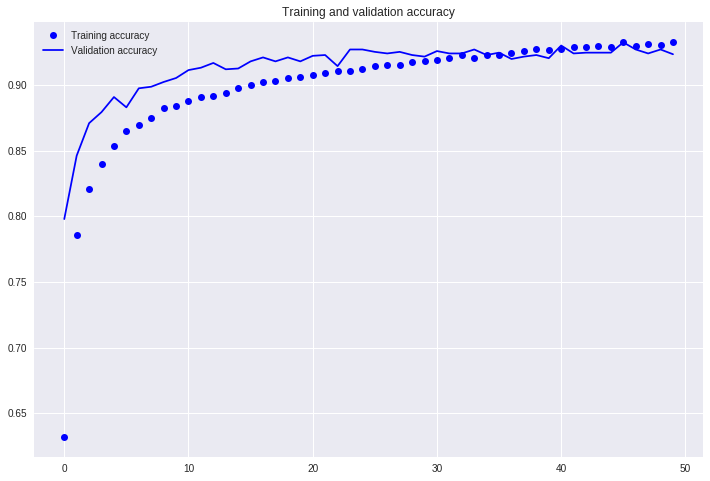

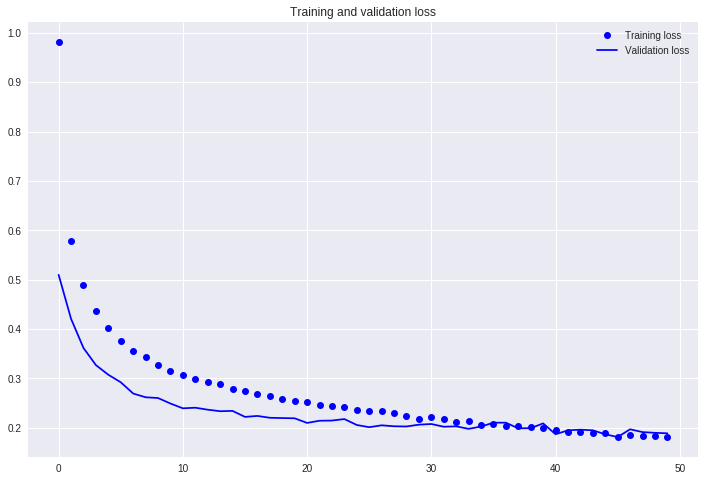

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(12, 8))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()